## Analyse Benchmark Testbed

In [40]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

import os
import json
import glob
import pickle
import copy


JOBCENTRIC = False

base_path = '/rdata/ong/trafpy/management/flowcentric'

# versions = ['', '_v2']
versions = ['', '_v2', '_v3', '_v4', '_v5']
sims = ['rack_dist_sensitivity_{}'.format(param) for param in [0.2, 0.4, 0.6, 0.8]]
# sims = ['skewed_nodes_sensitivity_{}'.format(param) for param in [0, 0.05, 0.1, 0.2, 0.4]]
# sims = ['university', 'private_enterprise', 'commercial_cloud', 'social_media_cloud']



envs = {sim: {version: [] for version in versions} for sim in sims}
paths = {sim: {version: None for version in versions} for sim in sims}
for sim in sims:
    for version in versions:
        print('\n\n\n >>>>> Sim {} Version {} <<<<<'.format(sim, version))
        
        sim_name = '{}_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data'.format(sim)
        # DATA_NAME = 'social_media_cloud_k_4_L_2_n_4_chancap500_numchans1_mldat2e6_bidirectional'
#         DATA_NAME = 'university_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional'
        # DATA_NAME = 'jobcentric_prototyping_k_4_L_2_n_16_chancap1_numchans1_mldat3e3_bidirectional'

        # path_to_testbed_data = '/scratch/datasets/trafpy/management/flowcentric/{}_slotsize_1000.0_testbed_data{}'.format(DATA_NAME, version)
#         folder = '{}/{}{}'.format(base_path, sim_name, version)
        path_to_testbed_data = '{}/{}{}'.format(base_path, sim_name, version)
        paths[sim][version] = path_to_testbed_data
        # path_to_testbed_data = '/rdata/ong/trafpy/management/jobcentric/{}_slotsize_10.0_testbed_data{}'.format(DATA_NAME, version)


        if os.path.isdir(path_to_testbed_data):
            # data split into separate files in a directory
            separate_files = True
            # load paths to testbed data dirs
            testbed_data_list = sorted(glob.glob(path_to_testbed_data + '/*'))
            print(testbed_data_list)
            for testbed_path in testbed_data_list:
                if 'envs_plotter' in testbed_path:
                    # plotter env doesn't contain simulation.obj object, no need to load
                    pass
                else:
                    # try load simulation.obj for this simulation
                    try:
                        filehandler = open(testbed_path+'/simulation.obj', 'rb')
                        envs[sim][version].append(pickle.load(filehandler))
                    except FileNotFoundError:
                        print('No simulation.obj in {}'.format(testbed_path))

        else:
            # all data stored in single file
            separate_files = False
            # load raw testbed data
            filehandler = open(path_to_testbed_data, 'rb')
            testbed_data = pickle.load(filehandler)
            print(testbed_data.keys())
            # unpack env dicts into list of env objects
            envs[sim][version] = testbed_data['envs']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



 >>>>> Sim rack_dist_sensitivity_0.2 Version  <<<<<
['/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/fl




 >>>>> Sim rack_dist_sensitivity_0.2 Version _v3 <<<<<
['/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v3/benchmark_rack_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v3/benchmark_rack_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v3/benchmark_rack_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v3/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_ml




 >>>>> Sim rack_dist_sensitivity_0.2 Version _v5 <<<<<
['/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v5/benchmark_rack_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v5/benchmark_rack_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v5/benchmark_rack_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v5/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_ml




 >>>>> Sim rack_dist_sensitivity_0.4 Version _v2 <<<<<
['/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v2/benchmark_rack_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v2/benchmark_rack_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v2/benchmark_rack_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v2/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_ml




 >>>>> Sim rack_dist_sensitivity_0.4 Version _v4 <<<<<
['/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v4/benchmark_rack_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v4/benchmark_rack_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v4/benchmark_rack_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v4/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_ml




 >>>>> Sim rack_dist_sensitivity_0.6 Version  <<<<<
['/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidire




 >>>>> Sim rack_dist_sensitivity_0.6 Version _v3 <<<<<
['/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v3/benchmark_rack_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v3/benchmark_rack_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v3/benchmark_rack_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v3/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_ml




 >>>>> Sim rack_dist_sensitivity_0.6 Version _v5 <<<<<
['/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v5/benchmark_rack_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v5/benchmark_rack_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v5/benchmark_rack_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v5/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_ml




 >>>>> Sim rack_dist_sensitivity_0.8 Version _v2 <<<<<
['/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v2/benchmark_rack_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v2/benchmark_rack_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v2/benchmark_rack_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v2/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_ml




 >>>>> Sim rack_dist_sensitivity_0.8 Version _v4 <<<<<
['/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v4/benchmark_rack_load_0.1_repeat_0_scheduler_FF', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v4/benchmark_rack_load_0.1_repeat_0_scheduler_FS', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v4/benchmark_rack_load_0.1_repeat_0_scheduler_Rand', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v4/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT', '/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_ml

In [41]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

import os

# analyse
analysers_dict = {sim: {version: [] for version in versions} for sim in sims}
for sim in envs.keys():
    for version in envs[sim].keys():
        print('\n\n\n >>>>> Sim {} Version {} <<<<<'.format(sim, version))
        path_to_testbed_data = paths[sim][version]
        analysers = [EnvAnalyser(env, time_units='\u03BCs', info_units='B', subject_class_name=env.scheduler.scheduler_name) for env in envs[sim][version]]
        for analyser in analysers:
            env_analyser_database_path = path_to_testbed_data+'/'+analyser.env.sim_name
            analyser.compute_metrics(measurement_start_time='auto', # 'auto' None
                                     measurement_end_time='auto', # 'auto' None
                                     env_analyser_database_path=env_analyser_database_path,
                                     overwrite=False,
                                     print_summary=True)
        analysers_dict[sim][version] = analysers




 >>>>> Sim rack_dist_sensitivity_0.2 Version  <<<<<

Computing metrics for env benchmark_rack_load_0.1_repeat_0_scheduler_FF...
/rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_FF/env_analyser_database exists and overwrite is False. Loading previously completed analysis...
Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.1_repeat_0_scheduler_FF/env_analyser_database in 0.3976895809173584 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_FF'
Measurement duration: 706705.1403752079 μs (Start time : 78522.7933750231 μs | End time: 785227.9337502309 μs)
Total number of generated demands 

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.2_repeat_0_scheduler_FF/env_analyser_database in 0.31438708305358887 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_FF'
Measurement duration: 319547.45306224277 μs (Start time : 35505.272562471415 μs | End time: 355052.72562471416 μs)
Total number of generated demands (jobs or flows) passed to env: 124941
Total info arrived: 2557027221.0 B
Total info transported: 2481016295.0 B
Load (abs): 8002.026605112486 B/μs
Load (frac): 0.20005066512781217 fraction of network capacity requested.
Throughput (abs): 7764.156062657577 B/μs
Throughput (frac): 0.970273712623883 fraction of arrived info successfully transported.
T-Score: -461.09430604389286

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.3_repeat_0_scheduler_FS/env_analyser_database in 0.8396809101104736 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_FS'
Measurement duration: 463293.39959941345 μs (Start time : 51477.04439993483 μs | End time: 514770.44399934827 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5589910159.0 B
Total info transported: 5519838817.0 B
Load (abs): 12065.594208407274 B/μs
Load (frac): 0.30163985521018183 fraction of network capacity requested.
Throughput (abs): 11914.348060586935 B/μs
Throughput (frac): 0.9874646747430847 fraction of arrived info successfully transported.
T-Score: -542.3920789993049

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.4_repeat_0_scheduler_Rand/env_analyser_database in 0.7434463500976562 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_Rand'
Measurement duration: 356109.2783999717 μs (Start time : 39567.69759999686 μs | End time: 395676.9759999686 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5674267258.0 B
Total info transported: 5329283715.0 B
Load (abs): 15934.061823648486 B/μs
Load (frac): 0.39835154559121216 fraction of network capacity requested.
Throughput (abs): 14965.304299132305 B/μs
Throughput (frac): 0.9392020982949619 fraction of arrived info successfully transported.
T-Score: -1294.957498458571

 ~* Flow Information *~
Total number of g

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.5_repeat_0_scheduler_SRPT/env_analyser_database in 1.3569436073303223 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_SRPT'
Measurement duration: 556452.8854199742 μs (Start time : 61828.098379997144 μs | End time: 618280.9837999714 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11143109964.0 B
Total info transported: 10949710231.0 B
Load (abs): 20025.25327115504 B/μs
Load (frac): 0.500631331778876 fraction of network capacity requested.
Throughput (abs): 19677.69512550173 B/μs
Throughput (frac): 0.9826440074965772 fraction of arrived info successfully transported.
T-Score: -671.193797762596

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.7_repeat_0_scheduler_FF/env_analyser_database in 1.4005699157714844 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_FF'
Measurement duration: 391057.73151527013 μs (Start time : 43450.85905725224 μs | End time: 434508.5905725224 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10986255303.0 B
Total info transported: 10422841592.0 B
Load (abs): 28093.691589808153 B/μs
Load (frac): 0.7023422897452039 fraction of network capacity requested.
Throughput (abs): 26652.948534257546 B/μs
Throughput (frac): 0.9487164920656678 fraction of arrived info successfully transported.
T-Score: -1901.2897404256767

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.8_repeat_0_scheduler_FS/env_analyser_database in 1.5311057567596436 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_FS'
Measurement duration: 367778.8600882747 μs (Start time : 40864.31778758608 μs | End time: 408643.17787586077 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11722913111.0 B
Total info transported: 10145811311.0 B
Load (abs): 31874.89652936075 B/μs
Load (frac): 0.7968724132340188 fraction of network capacity requested.
Throughput (abs): 27586.716943341416 B/μs
Throughput (frac): 0.8654684390247546 fraction of arrived info successfully transported.
T-Score: -1093.565626266163

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.9_repeat_0_scheduler_Rand/env_analyser_database in 2.9198319911956787 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_Rand'
Measurement duration: 562635.678800145 μs (Start time : 62515.07542223834 μs | End time: 625150.7542223834 μs)
Total number of generated demands (jobs or flows) passed to env: 999528
Total info arrived: 20234635616.0 B
Total info transported: 13221756874.0 B
Load (abs): 35964.01077718995 B/μs
Load (frac): 0.8991002694297487 fraction of network capacity requested.
Throughput (abs): 23499.677272860128 B/μs
Throughput (frac): 0.6534220395619701 fraction of arrived info successfully transported.
T-Score: -7182.249283550401

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT/env_analyser_database in 0.3706943988800049 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_SRPT'
Measurement duration: 721186.4468751005 μs (Start time : 79813.55312489945 μs | End time: 801000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2873695305.0 B
Total info transported: 2871369005.0 B
Load (abs): 3984.677356946621 B/μs
Load (frac): 0.09961693392366552 fraction of network capacity requested.
Throughput (abs): 3981.451700100073 B/μs
Throughput (frac): 0.9991904848102885 fraction of arrived info successfully transported.
T-Score: -0.1447212461285023

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.3_repeat_0_scheduler_FF/env_analyser_database in 0.8039615154266357 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_FF'
Measurement duration: 488023.1576166808 μs (Start time : 53976.8423833192 μs | End time: 542000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5801083588.0 B
Total info transported: 5707200454.0 B
Load (abs): 11886.902286215849 B/μs
Load (frac): 0.2971725571553962 fraction of network capacity requested.
Throughput (abs): 11694.527943861913 B/μs
Throughput (frac): 0.9838162762911735 fraction of arrived info successfully transported.
T-Score: -124.0795797167556

 ~* Flow Information *~
Total number of generated fl

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.4_repeat_0_scheduler_FS/env_analyser_database in 0.4864327907562256 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_FS'
Measurement duration: 361149.8652625954 μs (Start time : 39850.13473740461 μs | End time: 401000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5761142657.0 B
Total info transported: 5619669382.0 B
Load (abs): 15952.221532219097 B/μs
Load (frac): 0.39880553830547744 fraction of network capacity requested.
Throughput (abs): 15560.491426222425 B/μs
Throughput (frac): 0.9754435389951497 fraction of arrived info successfully transported.
T-Score: -19.671683918717136

 ~* Flow Information *~
Total number of generated

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.5_repeat_0_scheduler_Rand/env_analyser_database in 0.8488900661468506 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_Rand'
Measurement duration: 298105.0340999874 μs (Start time : 32894.96590001258 μs | End time: 331000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5862534787.0 B
Total info transported: 5056205119.0 B
Load (abs): 19666.00397977059 B/μs
Load (frac): 0.49165009949426475 fraction of network capacity requested.
Throughput (abs): 16961.153085741244 B/μs
Throughput (frac): 0.8624605742573993 fraction of arrived info successfully transported.
T-Score: -627.1467484772123

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.6_repeat_0_scheduler_SRPT/env_analyser_database in 1.240227222442627 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_SRPT'
Measurement duration: 470921.2393666485 μs (Start time : 52078.76063335149 μs | End time: 523000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11332718146.0 B
Total info transported: 10829185820.0 B
Load (abs): 24064.99685858638 B/μs
Load (frac): 0.6016249214646595 fraction of network capacity requested.
Throughput (abs): 22995.74730280671 B/μs
Throughput (frac): 0.9555682653082017 fraction of arrived info successfully transported.
T-Score: -42.22812063654754

 ~* Flow Information *~
Total number of generate

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.8_repeat_0_scheduler_FF/env_analyser_database in 1.4602575302124023 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_FF'
Measurement duration: 366507.1249625477 μs (Start time : 40492.87503745229 μs | End time: 407000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11656045194.0 B
Total info transported: 10424880809.0 B
Load (abs): 31803.052110354194 B/μs
Load (frac): 0.7950763027588549 fraction of network capacity requested.
Throughput (abs): 28443.86943382148 B/μs
Throughput (frac): 0.8943754623022784 fraction of arrived info successfully transported.
T-Score: -1942.0743243692848

 ~* Flow Information *~
Total number of generated

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.9_repeat_0_scheduler_FS/env_analyser_database in 1.688476800918579 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_FS'
Measurement duration: 327833.4752333108 μs (Start time : 36166.52476668924 μs | End time: 364000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11676904111.0 B
Total info transported: 9537588686.0 B
Load (abs): 35618.40078317153 B/μs
Load (frac): 0.8904600195792882 fraction of network capacity requested.
Throughput (abs): 29092.784619424052 B/μs
Throughput (frac): 0.8167908715646042 fraction of arrived info successfully transported.
T-Score: -331.9052493663213

 ~* Flow Information *~
Total number of generated fl

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.1_repeat_0_scheduler_Rand/env_analyser_database in 0.3236250877380371 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_Rand'
Measurement duration: 695956.6319498777 μs (Start time : 77043.36805012227 μs | End time: 773000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2764340024.0 B
Total info transported: 2750272274.0 B
Load (abs): 3972.0004050469133 B/μs
Load (frac): 0.09930001012617283 fraction of network capacity requested.
Throughput (abs): 3951.7868610498026 B/μs
Throughput (frac): 0.9949109914562377 fraction of arrived info successfully transported.
T-Score: -8.406512200847198

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.2_repeat_0_scheduler_SRPT/env_analyser_database in 0.36788320541381836 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_SRPT'
Measurement duration: 353904.8194499834 μs (Start time : 39095.18055001655 μs | End time: 393000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2754884698.0 B
Total info transported: 2723013548.0 B
Load (abs): 7784.253128514803 B/μs
Load (frac): 0.19460632821287008 fraction of network capacity requested.
Throughput (abs): 7694.197417915744 B/μs
Throughput (frac): 0.9884310403178986 fraction of arrived info successfully transported.
T-Score: -9.966448394210587

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.4_repeat_0_scheduler_FF/env_analyser_database in 0.9017448425292969 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_FF'
Measurement duration: 370126.72774992575 μs (Start time : 40873.272250074246 μs | End time: 411000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5818407812.0 B
Total info transported: 5643270532.0 B
Load (abs): 15720.042287600418 B/μs
Load (frac): 0.39300105719001044 fraction of network capacity requested.
Throughput (abs): 15246.860355928813 B/μs
Throughput (frac): 0.9698994491862888 fraction of arrived info successfully transported.
T-Score: -256.10792440921676

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.5_repeat_0_scheduler_FS/env_analyser_database in 1.4916846752166748 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_FS'
Measurement duration: 573515.858680002 μs (Start time : 63484.141319997994 μs | End time: 637000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11415764588.0 B
Total info transported: 11151778038.0 B
Load (abs): 19904.880423488903 B/μs
Load (frac): 0.49762201058722255 fraction of network capacity requested.
Throughput (abs): 19444.585305220353 B/μs
Throughput (frac): 0.976875263328617 fraction of arrived info successfully transported.
T-Score: -19.089798830177994

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.6_repeat_0_scheduler_Rand/env_analyser_database in 1.5872952938079834 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_Rand'
Measurement duration: 494371.86685000325 μs (Start time : 54628.133149996764 μs | End time: 549000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11844275583.0 B
Total info transported: 9526959962.0 B
Load (abs): 23958.231398700642 B/μs
Load (frac): 0.598955784967516 fraction of network capacity requested.
Throughput (abs): 19270.837603893353 B/μs
Throughput (frac): 0.8043514265806154 fraction of arrived info successfully transported.
T-Score: -976.7913451636205

 ~* Flow Information *~
Total number of g

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.7_repeat_0_scheduler_SRPT/env_analyser_database in 1.4571993350982666 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_SRPT'
Measurement duration: 399849.9792999446 μs (Start time : 44150.02070005538 μs | End time: 444000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11098990815.0 B
Total info transported: 10295823665.0 B
Load (abs): 27757.887681855227 B/μs
Load (frac): 0.6939471920463807 fraction of network capacity requested.
Throughput (abs): 25749.216451194716 B/μs
Throughput (frac): 0.9276360199420527 fraction of arrived info successfully transported.
T-Score: -62.08319174684953

 ~* Flow Information *~
Total number of g

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.9_repeat_0_scheduler_FF/env_analyser_database in 1.6676867008209229 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_FF'
Measurement duration: 304465.0544444274 μs (Start time : 33534.94555557258 μs | End time: 338000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10815724004.0 B
Total info transported: 9478086631.0 B
Load (abs): 35523.69589257457 B/μs
Load (frac): 0.8880923973143643 fraction of network capacity requested.
Throughput (abs): 31130.29391269595 B/μs
Throughput (frac): 0.8763247497342481 fraction of arrived info successfully transported.
T-Score: -4109.921043480746

 ~* Flow Information *~
Total number of generate

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.1_repeat_0_scheduler_FS/env_analyser_database in 18.866272449493408 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_FS'
Measurement duration: 659012.462174922 μs (Start time : 72987.53782507795 μs | End time: 732000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2611124284.0 B
Total info transported: 2589664284.0 B
Load (abs): 3962.177400079163 B/μs
Load (frac): 0.09905443500197907 fraction of network capacity requested.
Throughput (abs): 3929.6135242319956 B/μs
Throughput (frac): 0.9917813180584705 fraction of arrived info successfully transported.
T-Score: -11.741736975435048

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.2_repeat_0_scheduler_Rand/env_analyser_database in 0.42354464530944824 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_Rand'
Measurement duration: 350316.7406499709 μs (Start time : 38683.25935002912 μs | End time: 389000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2780471146.0 B
Total info transported: 2741491871.0 B
Load (abs): 7937.02048278129 B/μs
Load (frac): 0.19842551206953227 fraction of network capacity requested.
Throughput (abs): 7825.75182080505 B/μs
Throughput (frac): 0.9859810539461717 fraction of arrived info successfully transported.
T-Score: -14.914592392187002

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.3_repeat_0_scheduler_SRPT/env_analyser_database in 0.7354099750518799 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_SRPT'
Measurement duration: 445747.4439666846 μs (Start time : 49252.55603331542 μs | End time: 495000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5332561373.0 B
Total info transported: 5297742098.0 B
Load (abs): 11963.190019769489 B/μs
Load (frac): 0.29907975049423724 fraction of network capacity requested.
Throughput (abs): 11885.07566270185 B/μs
Throughput (frac): 0.9934704408323741 fraction of arrived info successfully transported.
T-Score: -4.974737628816969

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.5_repeat_0_scheduler_FF/env_analyser_database in 1.3101482391357422 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_FF'
Measurement duration: 490773.6266799701 μs (Start time : 54226.37332002987 μs | End time: 545000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 499764
Total info arrived: 9784622556.0 B
Total info transported: 9615339933.0 B
Load (abs): 19937.140107124134 B/μs
Load (frac): 0.49842850267810335 fraction of network capacity requested.
Throughput (abs): 19592.20995236994 B/μs
Throughput (frac): 0.9826991156755255 fraction of arrived info successfully transported.
T-Score: -245.45183699729418

 ~* Flow Information *~
Total number of genera

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.6_repeat_0_scheduler_FS/env_analyser_database in 1.5096368789672852 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_FS'
Measurement duration: 458308.40404994704 μs (Start time : 50691.59595005293 μs | End time: 509000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10928655046.0 B
Total info transported: 10627423521.0 B
Load (abs): 23845.635274034776 B/μs
Load (frac): 0.5961408818508694 fraction of network capacity requested.
Throughput (abs): 23188.367106272417 B/μs
Throughput (frac): 0.9724365419411555 fraction of arrived info successfully transported.
T-Score: -46.8100103842589

 ~* Flow Information *~
Total number of gener

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.7_repeat_0_scheduler_Rand/env_analyser_database in 1.158407211303711 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_Rand'
Measurement duration: 352106.9405713835 μs (Start time : 38893.05942861649 μs | End time: 391000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 499764
Total info arrived: 9740398740.0 B
Total info transported: 7410968513.0 B
Load (abs): 27663.18302102683 B/μs
Load (frac): 0.6915795755256707 fraction of network capacity requested.
Throughput (abs): 21047.493414852343 B/μs
Throughput (frac): 0.7608485762052078 fraction of arrived info successfully transported.
T-Score: -2974.5620423704627

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.8_repeat_0_scheduler_SRPT/env_analyser_database in 1.5588252544403076 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_SRPT'
Measurement duration: 345894.4410124924 μs (Start time : 38105.55898750759 μs | End time: 384000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11056299391.0 B
Total info transported: 9491294040.0 B
Load (abs): 31964.374329452403 B/μs
Load (frac): 0.79910935823631 fraction of network capacity requested.
Throughput (abs): 27439.857120043194 B/μs
Throughput (frac): 0.8584512506712745 fraction of arrived info successfully transported.
T-Score: -128.69443944048095

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.1_repeat_0_scheduler_FF/env_analyser_database in 0.3437821865081787 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_FF'
Measurement duration: 703176.2953499187 μs (Start time : 77823.70465008139 μs | End time: 781000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2758065317.0 B
Total info transported: 2738728016.0 B
Load (abs): 3922.2956394278276 B/μs
Load (frac): 0.09805739098569569 fraction of network capacity requested.
Throughput (abs): 3894.795706441069 B/μs
Throughput (frac): 0.9929888168779725 fraction of arrived info successfully transported.
T-Score: -47.52876235633468

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.2_repeat_0_scheduler_FS/env_analyser_database in 0.37998270988464355 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_FS'
Measurement duration: 335906.63558755186 μs (Start time : 37093.36441244816 μs | End time: 373000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2661245669.0 B
Total info transported: 2652069919.0 B
Load (abs): 7922.575463104728 B/μs
Load (frac): 0.1980643865776182 fraction of network capacity requested.
Throughput (abs): 7895.259092935529 B/μs
Throughput (frac): 0.9965520845719411 fraction of arrived info successfully transported.
T-Score: -10.021897084977322

 ~* Flow Information *~
Total number of genera

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.3_repeat_0_scheduler_Rand/env_analyser_database in 0.8547937870025635 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_Rand'
Measurement duration: 466442.2141167236 μs (Start time : 51557.78588327637 μs | End time: 518000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5570097745.0 B
Total info transported: 5454104820.0 B
Load (abs): 11941.667320029756 B/μs
Load (frac): 0.2985416830007439 fraction of network capacity requested.
Throughput (abs): 11692.991446599968 B/μs
Throughput (frac): 0.9791757828479544 fraction of arrived info successfully transported.
T-Score: -43.554949177763774

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.4_repeat_0_scheduler_SRPT/env_analyser_database in 0.6928799152374268 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_SRPT'
Measurement duration: 345865.45057498914 μs (Start time : 38134.54942501085 μs | End time: 384000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5454541697.0 B
Total info transported: 5385657922.0 B
Load (abs): 15770.70415079626 B/μs
Load (frac): 0.3942676037699065 fraction of network capacity requested.
Throughput (abs): 15571.540646938089 B/μs
Throughput (frac): 0.9873712992169652 fraction of arrived info successfully transported.
T-Score: -10.688918741500906

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.6_repeat_0_scheduler_FF/env_analyser_database in 1.294118881225586 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_FF'
Measurement duration: 456565.2333999776 μs (Start time : 50434.76660002238 μs | End time: 507000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10847787188.0 B
Total info transported: 10632294228.0 B
Load (abs): 23759.555906651152 B/μs
Load (frac): 0.5939888976662788 fraction of network capacity requested.
Throughput (abs): 23287.56867627171 B/μs
Throughput (frac): 0.9801348462810571 fraction of arrived info successfully transported.
T-Score: -245.243114633227

 ~* Flow Information *~
Total number of generate

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.7_repeat_0_scheduler_FS/env_analyser_database in 1.2792763710021973 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_FS'
Measurement duration: 392623.09964280867 μs (Start time : 43376.900357191334 μs | End time: 436000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10928366878.0 B
Total info transported: 10524350553.0 B
Load (abs): 27834.243293229945 B/μs
Load (frac): 0.6958560823307486 fraction of network capacity requested.
Throughput (abs): 26805.225068455202 B/μs
Throughput (frac): 0.963030493987777 fraction of arrived info successfully transported.
T-Score: -83.42178699716294

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.8_repeat_0_scheduler_Rand/env_analyser_database in 1.784048080444336 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_Rand'
Measurement duration: 333231.4464000316 μs (Start time : 36768.55359996839 μs | End time: 370000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10581628130.0 B
Total info transported: 7642882083.0 B
Load (abs): 31754.590523540086 B/μs
Load (frac): 0.7938647630885022 fraction of network capacity requested.
Throughput (abs): 22935.656780197784 B/μs
Throughput (frac): 0.7222784612257963 fraction of arrived info successfully transported.
T-Score: -4914.92052809311

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.2_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.9_repeat_0_scheduler_SRPT/env_analyser_database in 1.3823025226593018 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_SRPT'
Measurement duration: 304442.5666778132 μs (Start time : 33557.433322186844 μs | End time: 338000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10762983375.0 B
Total info transported: 8464148558.0 B
Load (abs): 35353.08315275865 B/μs
Load (frac): 0.8838270788189663 fraction of network capacity requested.
Throughput (abs): 27802.11929745513 B/μs
Throughput (frac): 0.7864128618520699 fraction of arrived info successfully transported.
T-Score: -473.9007120872677

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.2_repeat_0_scheduler_FF/env_analyser_database in 0.34909820556640625 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_FF'
Measurement duration: 372857.70543730893 μs (Start time : 41428.63393747877 μs | End time: 414286.3393747877 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 3002675721.0 B
Total info transported: 2971987282.0 B
Load (abs): 8053.141123845863 B/μs
Load (frac): 0.20132852809614657 fraction of network capacity requested.
Throughput (abs): 7970.8350897945975 B/μs
Throughput (frac): 0.9897796359475742 fraction of arrived info successfully transported.
T-Score: -571.5658661174937

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.3_repeat_0_scheduler_FS/env_analyser_database in 0.8476805686950684 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_FS'
Measurement duration: 450100.03094919666 μs (Start time : 50011.11454991074 μs | End time: 500111.14549910737 μs)
Total number of generated demands (jobs or flows) passed to env: 249882
Total info arrived: 5401736128.0 B
Total info transported: 5320529673.0 B
Load (abs): 12001.190305649414 B/μs
Load (frac): 0.30002975764123535 fraction of network capacity requested.
Throughput (abs): 11820.771622209762 B/μs
Throughput (frac): 0.9849666009083515 fraction of arrived info successfully transported.
T-Score: -207.2222692439307

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.4_repeat_0_scheduler_Rand/env_analyser_database in 0.5688920021057129 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_Rand'
Measurement duration: 378681.50238745974 μs (Start time : 42075.72248749553 μs | End time: 420757.22487495525 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 6031958460.0 B
Total info transported: 5191289213.0 B
Load (abs): 15928.84369046422 B/μs
Load (frac): 0.3982210922616055 fraction of network capacity requested.
Throughput (abs): 13708.853430311923 B/μs
Throughput (frac): 0.860630796353329 fraction of arrived info successfully transported.
T-Score: -1219.7242873400387

 ~* Flow Information *~
Total number of g

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.5_repeat_0_scheduler_SRPT/env_analyser_database in 1.3782691955566406 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_SRPT'
Measurement duration: 574813.8253793359 μs (Start time : 63868.20281992621 μs | End time: 638682.0281992621 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11496141728.0 B
Total info transported: 11258439770.0 B
Load (abs): 19999.765524799914 B/μs
Load (frac): 0.4999941381199978 fraction of network capacity requested.
Throughput (abs): 19586.236922137767 B/μs
Throughput (frac): 0.9793233274585461 fraction of arrived info successfully transported.
T-Score: -615.6659447040936

 ~* Flow Information *~
Total number of 

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.7_repeat_0_scheduler_FF/env_analyser_database in 1.39631986618042 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_FF'
Measurement duration: 416027.56577068934 μs (Start time : 46225.28508563215 μs | End time: 462252.8508563215 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11645428492.0 B
Total info transported: 10944183110.0 B
Load (abs): 27991.963634493528 B/μs
Load (frac): 0.6997990908623382 fraction of network capacity requested.
Throughput (abs): 26306.3893127513 B/μs
Throughput (frac): 0.9397836341975968 fraction of arrived info successfully transported.
T-Score: -1675.958692328828

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.8_repeat_0_scheduler_FS/env_analyser_database in 1.2348377704620361 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_FS'
Measurement duration: 370012.8588751515 μs (Start time : 41112.53987501684 μs | End time: 411125.39875016833 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11910820932.0 B
Total info transported: 10654977038.0 B
Load (abs): 32190.289192135642 B/μs
Load (frac): 0.804757229803391 fraction of network capacity requested.
Throughput (abs): 28796.23446166547 B/μs
Throughput (frac): 0.8945627760529915 fraction of arrived info successfully transported.
T-Score: -745.3886846887701

 ~* Flow Information *~
Total number of gener

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.9_repeat_0_scheduler_Rand/env_analyser_database in 1.919668436050415 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_Rand'
Measurement duration: 332825.6884004235 μs (Start time : 36980.6320444915 μs | End time: 369806.32044491504 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11956035980.0 B
Total info transported: 6964333044.0 B
Load (abs): 35922.81604662576 B/μs
Load (frac): 0.8980704011656441 fraction of network capacity requested.
Throughput (abs): 20924.86633910659 B/μs
Throughput (frac): 0.5824951560575682 fraction of arrived info successfully transported.
T-Score: -3622.05310967354

 ~* Flow Information *~
Total number of gener

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT/env_analyser_database in 0.3410177230834961 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_SRPT'
Measurement duration: 725624.1028999853 μs (Start time : 80375.8971000147 μs | End time: 806000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2813444924.0 B
Total info transported: 2810781499.0 B
Load (abs): 3877.2760066209994 B/μs
Load (frac): 0.09693190016552498 fraction of network capacity requested.
Throughput (abs): 3873.6054766739435 B/μs
Throughput (frac): 0.9990533225025022 fraction of arrived info successfully transported.
T-Score: -0.16506714102493034

 ~* Flow Information *~
Total number of gener

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.3_repeat_0_scheduler_FF/env_analyser_database in 0.7126646041870117 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_FF'
Measurement duration: 429543.66921674134 μs (Start time : 47456.33078325865 μs | End time: 477000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 249882
Total info arrived: 5168078905.0 B
Total info transported: 5127999155.0 B
Load (abs): 12031.556452511151 B/μs
Load (frac): 0.3007889113127788 fraction of network capacity requested.
Throughput (abs): 11938.248710196885 B/μs
Throughput (frac): 0.9922447488250956 fraction of arrived info successfully transported.
T-Score: -31.894063628256514

 ~* Flow Information *~
Total number of generated

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.4_repeat_0_scheduler_FS/env_analyser_database in 0.6874346733093262 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_FS'
Measurement duration: 352175.5163624951 μs (Start time : 38824.483637504934 μs | End time: 391000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5588568778.0 B
Total info transported: 5474016803.0 B
Load (abs): 15868.703298067072 B/μs
Load (frac): 0.3967175824516768 fraction of network capacity requested.
Throughput (abs): 15543.43373877695 B/μs
Throughput (frac): 0.9795024487394794 fraction of arrived info successfully transported.
T-Score: -22.05577479069573

 ~* Flow Information *~
Total number of generated f

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.5_repeat_0_scheduler_Rand/env_analyser_database in 0.763683557510376 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_Rand'
Measurement duration: 300836.199080007 μs (Start time : 33163.80091999302 μs | End time: 334000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5932578420.0 B
Total info transported: 4781124524.0 B
Load (abs): 19720.294426477045 B/μs
Load (frac): 0.49300736066192613 fraction of network capacity requested.
Throughput (abs): 15892.783310722745 B/μs
Throughput (frac): 0.8059100420622842 fraction of arrived info successfully transported.
T-Score: -709.6112570490801

 ~* Flow Information *~
Total number of generate

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.6_repeat_0_scheduler_SRPT/env_analyser_database in 1.1194026470184326 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_SRPT'
Measurement duration: 450267.30923332425 μs (Start time : 49732.69076667572 μs | End time: 500000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 499764
Total info arrived: 10845461873.0 B
Total info transported: 10350251023.0 B
Load (abs): 24086.718379503727 B/μs
Load (frac): 0.6021679594875932 fraction of network capacity requested.
Throughput (abs): 22986.903136768913 B/μs
Throughput (frac): 0.9543393489554522 fraction of arrived info successfully transported.
T-Score: -29.06218761661086

 ~* Flow Information *~
Total number 

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.8_repeat_0_scheduler_FF/env_analyser_database in 1.253305435180664 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_FF'
Measurement duration: 325197.09097493364 μs (Start time : 35802.90902506634 μs | End time: 361000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 499764
Total info arrived: 10275968387.0 B
Total info transported: 9445685489.0 B
Load (abs): 31599.20144486187 B/μs
Load (frac): 0.7899800361215467 fraction of network capacity requested.
Throughput (abs): 29046.03316309517 B/μs
Throughput (frac): 0.9192014935497096 fraction of arrived info successfully transported.
T-Score: -1708.6331526008055

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.9_repeat_0_scheduler_FS/env_analyser_database in 1.5372695922851562 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_FS'
Measurement duration: 332363.27483334404 μs (Start time : 36636.725166655946 μs | End time: 369000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11840720556.0 B
Total info transported: 9688264631.0 B
Load (abs): 35625.83911214997 B/μs
Load (frac): 0.8906459778037493 fraction of network capacity requested.
Throughput (abs): 29149.62441580815 B/μs
Throughput (frac): 0.8182157990453297 fraction of arrived info successfully transported.
T-Score: -332.5947512197658

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.1_repeat_0_scheduler_Rand/env_analyser_database in 0.30467820167541504 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_Rand'
Measurement duration: 705882.6833499684 μs (Start time : 78117.31665003166 μs | End time: 784000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2802590464.0 B
Total info transported: 2796287589.0 B
Load (abs): 3970.3346322359184 B/μs
Load (frac): 0.09925836580589796 fraction of network capacity requested.
Throughput (abs): 3961.405563498762 B/μs
Throughput (frac): 0.9977510538621457 fraction of arrived info successfully transported.
T-Score: -1.8906506322163168

 ~* Flow Information *~
Total number o

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.2_repeat_0_scheduler_SRPT/env_analyser_database in 0.476029634475708 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_SRPT'
Measurement duration: 362964.1007624297 μs (Start time : 40035.899237570295 μs | End time: 403000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2850356561.0 B
Total info transported: 2824625636.0 B
Load (abs): 7852.998561049538 B/μs
Load (frac): 0.19632496402623845 fraction of network capacity requested.
Throughput (abs): 7782.107459296085 B/μs
Throughput (frac): 0.9909727346564063 fraction of arrived info successfully transported.
T-Score: -5.0546139349233234

 ~* Flow Information *~
Total number of 

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.4_repeat_0_scheduler_FF/env_analyser_database in 0.7347092628479004 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_FF'
Measurement duration: 364786.8103500382 μs (Start time : 40213.189649961765 μs | End time: 405000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5778204382.0 B
Total info transported: 5562200746.0 B
Load (abs): 15839.948753781455 B/μs
Load (frac): 0.39599871884453636 fraction of network capacity requested.
Throughput (abs): 15247.812114321467 B/μs
Throughput (frac): 0.9626175154563786 fraction of arrived info successfully transported.
T-Score: -314.9319475813999

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.5_repeat_0_scheduler_FS/env_analyser_database in 1.2688608169555664 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_FS'
Measurement duration: 561800.0796800423 μs (Start time : 62199.92031995766 μs | End time: 624000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11268271780.0 B
Total info transported: 11079720230.0 B
Load (abs): 20057.440693880875 B/μs
Load (frac): 0.5014360173470219 fraction of network capacity requested.
Throughput (abs): 19721.820324963548 B/μs
Throughput (frac): 0.9832670391980908 fraction of arrived info successfully transported.
T-Score: -31.14113152461775

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.6_repeat_0_scheduler_Rand/env_analyser_database in 1.5506675243377686 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_Rand'
Measurement duration: 466459.69858339964 μs (Start time : 51540.301416600334 μs | End time: 518000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11107032606.0 B
Total info transported: 8822132276.0 B
Load (abs): 23811.344559307396 B/μs
Load (frac): 0.5952836139826849 fraction of network capacity requested.
Throughput (abs): 18912.95711675007 B/μs
Throughput (frac): 0.7942834588631981 fraction of arrived info successfully transported.
T-Score: -877.83959691703

 ~* Flow Information *~
Total number of 

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.7_repeat_0_scheduler_SRPT/env_analyser_database in 1.3319048881530762 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_SRPT'
Measurement duration: 395372.5547999372 μs (Start time : 43627.445200062815 μs | End time: 439000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10971553960.0 B
Total info transported: 10009491635.0 B
Load (abs): 27749.91290316478 B/μs
Load (frac): 0.6937478225791195 fraction of network capacity requested.
Throughput (abs): 25316.607117721946 B/μs
Throughput (frac): 0.9123130298125973 fraction of arrived info successfully transported.
T-Score: -46.05647974207152

 ~* Flow Information *~
Total number o

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.9_repeat_0_scheduler_FF/env_analyser_database in 1.4612843990325928 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_FF'
Measurement duration: 326067.38891111594 μs (Start time : 35932.61108888405 μs | End time: 362000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11694024757.0 B
Total info transported: 9981236649.0 B
Load (abs): 35863.82801436093 B/μs
Load (frac): 0.8965957003590233 fraction of network capacity requested.
Throughput (abs): 30610.9626060177 B/μs
Throughput (frac): 0.8535330526836168 fraction of arrived info successfully transported.
T-Score: -3328.664039650299

 ~* Flow Information *~
Total number of gener

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.1_repeat_0_scheduler_FS/env_analyser_database in 0.3593783378601074 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_FS'
Measurement duration: 722084.157924931 μs (Start time : 79915.84207506895 μs | End time: 802000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2856471623.0 B
Total info transported: 2856471623.0 B
Load (abs): 3955.8707827197104 B/μs
Load (frac): 0.09889676956799276 fraction of network capacity requested.
Throughput (abs): 3955.8707827197104 B/μs
Throughput (frac): 1.0 fraction of arrived info successfully transported.
T-Score: 1.4613655811484363

 ~* Flow Information *~
Total number of generated flows passed

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.2_repeat_0_scheduler_Rand/env_analyser_database in 0.330751895904541 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_Rand'
Measurement duration: 374690.8099249749 μs (Start time : 41309.190075025064 μs | End time: 416000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2967037574.0 B
Total info transported: 2880823049.0 B
Load (abs): 7918.629161452067 B/μs
Load (frac): 0.19796572903630166 fraction of network capacity requested.
Throughput (abs): 7688.534046449746 B/μs
Throughput (frac): 0.9709425570624742 fraction of arrived info successfully transported.
T-Score: -50.69436700526283

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.3_repeat_0_scheduler_SRPT/env_analyser_database in 0.7485315799713135 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_SRPT'
Measurement duration: 503392.9424000181 μs (Start time : 55607.0575999819 μs | End time: 559000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5994407895.0 B
Total info transported: 5964888320.0 B
Load (abs): 11908.009409946357 B/μs
Load (frac): 0.2977002352486589 fraction of network capacity requested.
Throughput (abs): 11849.368192492533 B/μs
Throughput (frac): 0.9950754810955353 fraction of arrived info successfully transported.
T-Score: -13.117910771936012

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.5_repeat_0_scheduler_FF/env_analyser_database in 0.715933084487915 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_FF'
Measurement duration: 291801.49406997545 μs (Start time : 32198.505930024534 μs | End time: 324000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5777113540.0 B
Total info transported: 5519045878.0 B
Load (abs): 19798.094449148433 B/μs
Load (frac): 0.49495236122871084 fraction of network capacity requested.
Throughput (abs): 18913.69986157955 B/μs
Throughput (frac): 0.955329307583593 fraction of arrived info successfully transported.
T-Score: -957.7908968223984

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.6_repeat_0_scheduler_FS/env_analyser_database in 1.2949354648590088 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_FS'
Measurement duration: 454785.59890000976 μs (Start time : 50214.40109999026 μs | End time: 505000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10759788316.0 B
Total info transported: 10516443066.0 B
Load (abs): 23659.03481118291 B/μs
Load (frac): 0.5914758702795728 fraction of network capacity requested.
Throughput (abs): 23123.957951694443 B/μs
Throughput (frac): 0.9773838255127992 fraction of arrived info successfully transported.
T-Score: -20.395974460970177

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.7_repeat_0_scheduler_Rand/env_analyser_database in 1.216655969619751 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_Rand'
Measurement duration: 422386.24174285954 μs (Start time : 46613.75825714046 μs | End time: 469000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11825173739.0 B
Total info transported: 8241454382.0 B
Load (abs): 27996.114859723424 B/μs
Load (frac): 0.6999028714930856 fraction of network capacity requested.
Throughput (abs): 19511.654423197895 B/μs
Throughput (frac): 0.6969415049539003 fraction of arrived info successfully transported.
T-Score: -1307.4367605004202

 ~* Flow Information *~
Total number of g

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.8_repeat_0_scheduler_SRPT/env_analyser_database in 1.2804577350616455 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_SRPT'
Measurement duration: 345810.9378374414 μs (Start time : 38189.06216255859 μs | End time: 384000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10920893511.0 B
Total info transported: 9532131309.0 B
Load (abs): 31580.532354744915 B/μs
Load (frac): 0.7895133088686229 fraction of network capacity requested.
Throughput (abs): 27564.574355600223 B/μs
Throughput (frac): 0.8728343792931249 fraction of arrived info successfully transported.
T-Score: -127.4590255254796

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.1_repeat_0_scheduler_FF/env_analyser_database in 0.26038193702697754 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_FF'
Measurement duration: 662612.1519749389 μs (Start time : 73387.8480250611 μs | End time: 736000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 124941
Total info arrived: 2613091336.0 B
Total info transported: 2606102536.0 B
Load (abs): 3943.6212091969473 B/μs
Load (frac): 0.09859053022992369 fraction of network capacity requested.
Throughput (abs): 3933.0738626395837 B/μs
Throughput (frac): 0.9973254666211943 fraction of arrived info successfully transported.
T-Score: -11.245321464681558

 ~* Flow Information *~
Total number of gener

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.2_repeat_0_scheduler_FS/env_analyser_database in 0.3926880359649658 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_FS'
Measurement duration: 370137.1875750206 μs (Start time : 40862.812424979384 μs | End time: 411000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2940457444.0 B
Total info transported: 2900257269.0 B
Load (abs): 7944.236738990239 B/μs
Load (frac): 0.19860591847475598 fraction of network capacity requested.
Throughput (abs): 7835.627887057867 B/μs
Throughput (frac): 0.9863285982655425 fraction of arrived info successfully transported.
T-Score: -14.76574853331225

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.3_repeat_0_scheduler_Rand/env_analyser_database in 0.7450621128082275 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_Rand'
Measurement duration: 473678.0164499979 μs (Start time : 52321.98355000212 μs | End time: 526000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5647808508.0 B
Total info transported: 5377990206.0 B
Load (abs): 11923.307208402377 B/μs
Load (frac): 0.2980826802100594 fraction of network capacity requested.
Throughput (abs): 11353.68334444904 B/μs
Throughput (frac): 0.9522260180001131 fraction of arrived info successfully transported.
T-Score: -64.88506751352558

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.4_repeat_0_scheduler_SRPT/env_analyser_database in 0.6801939010620117 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_SRPT'
Measurement duration: 366574.40601253515 μs (Start time : 40425.59398746483 μs | End time: 407000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5821794646.0 B
Total info transported: 5647873846.0 B
Load (abs): 15881.61789396972 B/μs
Load (frac): 0.397040447349243 fraction of network capacity requested.
Throughput (abs): 15407.169058624537 B/μs
Throughput (frac): 0.9701259129571848 fraction of arrived info successfully transported.
T-Score: -13.872385187537974

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.6_repeat_0_scheduler_FF/env_analyser_database in 1.2322447299957275 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_FF'
Measurement duration: 474523.8332833457 μs (Start time : 52476.16671665429 μs | End time: 527000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11352706001.0 B
Total info transported: 11029032618.0 B
Load (abs): 23924.416867426593 B/μs
Load (frac): 0.5981104216856649 fraction of network capacity requested.
Throughput (abs): 23242.315442171668 B/μs
Throughput (frac): 0.971489318672439 fraction of arrived info successfully transported.
T-Score: -610.1906645276813

 ~* Flow Information *~
Total number of genera

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.7_repeat_0_scheduler_FS/env_analyser_database in 1.4751205444335938 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_FS'
Measurement duration: 409782.79771430884 μs (Start time : 45217.202285691135 μs | End time: 455000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11309690380.0 B
Total info transported: 10665710530.0 B
Load (abs): 27599.231698068634 B/μs
Load (frac): 0.6899807924517158 fraction of network capacity requested.
Throughput (abs): 26027.716608631017 B/μs
Throughput (frac): 0.943059462428891 fraction of arrived info successfully transported.
T-Score: -53.234764950826595

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.8_repeat_0_scheduler_Rand/env_analyser_database in 1.4673967361450195 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_Rand'
Measurement duration: 343173.43647503667 μs (Start time : 37826.563524963356 μs | End time: 381000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10846062069.0 B
Total info transported: 7518900335.0 B
Load (abs): 31605.19118381405 B/μs
Load (frac): 0.7901297795953512 fraction of network capacity requested.
Throughput (abs): 21909.913576737297 B/μs
Throughput (frac): 0.6932378117667584 fraction of arrived info successfully transported.
T-Score: -1732.8520637911572

 ~* Flow Information *~
Total number of 

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.9_repeat_0_scheduler_SRPT/env_analyser_database in 1.1268653869628906 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_SRPT'
Measurement duration: 338673.00837776257 μs (Start time : 37326.991622237416 μs | End time: 376000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 12030315161.0 B
Total info transported: 9310910786.0 B
Load (abs): 35521.91897023322 B/μs
Load (frac): 0.8880479742558306 fraction of network capacity requested.
Throughput (abs): 27492.332000707967 B/μs
Throughput (frac): 0.7739540204386505 fraction of arrived info successfully transported.
T-Score: -204.11365403607766

 ~* Flow Information *~
Total number of 

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.2_repeat_0_scheduler_FF/env_analyser_database in 0.4038262367248535 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_FF'
Measurement duration: 348951.0454876555 μs (Start time : 38772.33838751728 μs | End time: 387723.38387517276 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2777254063.0 B
Total info transported: 2768333623.0 B
Load (abs): 7958.864427870723 B/μs
Load (frac): 0.19897161069676808 fraction of network capacity requested.
Throughput (abs): 7933.300842045858 B/μs
Throughput (frac): 0.9967880360249202 fraction of arrived info successfully transported.
T-Score: -571.7514197749977

 ~* Flow Information *~
Total number of genera

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.3_repeat_0_scheduler_FS/env_analyser_database in 0.6537234783172607 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_FS'
Measurement duration: 454075.23105055216 μs (Start time : 50452.80345006136 μs | End time: 504528.0345006135 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5419108640.0 B
Total info transported: 5330416565.0 B
Load (abs): 11934.385030124427 B/μs
Load (frac): 0.2983596257531107 fraction of network capacity requested.
Throughput (abs): 11739.060403421487 B/μs
Throughput (frac): 0.9836334569221702 fraction of arrived info successfully transported.
T-Score: -599.5525573141301

 ~* Flow Information *~
Total number of gener

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.4_repeat_0_scheduler_Rand/env_analyser_database in 0.693148136138916 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_Rand'
Measurement duration: 338121.780637444 μs (Start time : 37569.08673749378 μs | End time: 375690.8673749378 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5413467400.0 B
Total info transported: 4923279037.0 B
Load (abs): 16010.407226042233 B/μs
Load (frac): 0.40026018065105584 fraction of network capacity requested.
Throughput (abs): 14560.668134772002 B/μs
Throughput (frac): 0.9094502050571137 fraction of arrived info successfully transported.
T-Score: -1326.5023307612057

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.5_repeat_0_scheduler_SRPT/env_analyser_database in 1.3280894756317139 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_SRPT'
Measurement duration: 554248.6417798362 μs (Start time : 61583.1824199818 μs | End time: 615831.824199818 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11137174453.0 B
Total info transported: 10894983943.0 B
Load (abs): 20094.184475104248 B/μs
Load (frac): 0.5023546118776062 fraction of network capacity requested.
Throughput (abs): 19657.213607260055 B/μs
Throughput (frac): 0.9782538640278943 fraction of arrived info successfully transported.
T-Score: -671.3676403039277

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.7_repeat_0_scheduler_FF/env_analyser_database in 1.505002498626709 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_FF'
Measurement duration: 387296.2299862457 μs (Start time : 43032.91444291619 μs | End time: 430329.14442916185 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10866018886.0 B
Total info transported: 10401444145.0 B
Load (abs): 28056.09258418522 B/μs
Load (frac): 0.7014023146046304 fraction of network capacity requested.
Throughput (abs): 26856.559242441872 B/μs
Throughput (frac): 0.9572451745322689 fraction of arrived info successfully transported.
T-Score: -1953.7366530559204

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.8_repeat_0_scheduler_FS/env_analyser_database in 0.8829374313354492 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_FS'
Measurement duration: 340117.76092482655 μs (Start time : 37790.86232498073 μs | End time: 377908.6232498073 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10944797908.0 B
Total info transported: 9880116466.0 B
Load (abs): 32179.43655232706 B/μs
Load (frac): 0.8044859138081765 fraction of network capacity requested.
Throughput (abs): 29049.10475458446 B/μs
Throughput (frac): 0.902722603838872 fraction of arrived info successfully transported.
T-Score: -1361.977728385525

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.9_repeat_0_scheduler_Rand/env_analyser_database in 1.410484790802002 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_Rand'
Measurement duration: 311836.6355003149 μs (Start time : 34648.51505559054 μs | End time: 346485.1505559054 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11254709587.0 B
Total info transported: 6551421596.0 B
Load (abs): 36091.684894376805 B/μs
Load (frac): 0.9022921223594201 fraction of network capacity requested.
Throughput (abs): 21009.146617711584 B/μs
Throughput (frac): 0.5821048997627948 fraction of arrived info successfully transported.
T-Score: -4425.917427268751

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT/env_analyser_database in 0.27939581871032715 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_SRPT'
Measurement duration: 713070.7112248732 μs (Start time : 78929.28877512677 μs | End time: 792000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2830187011.0 B
Total info transported: 2826927611.0 B
Load (abs): 3969.013123731393 B/μs
Load (frac): 0.09922532809328483 fraction of network capacity requested.
Throughput (abs): 3964.4421885510637 B/μs
Throughput (frac): 0.9988483446544939 fraction of arrived info successfully transported.
T-Score: -0.1919879061895368

 ~* Flow Information *~
Total number of g

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.3_repeat_0_scheduler_FF/env_analyser_database in 0.6800382137298584 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_FF'
Measurement duration: 478199.31999992696 μs (Start time : 52800.68000007302 μs | End time: 531000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5657380441.0 B
Total info transported: 5603225990.0 B
Load (abs): 11830.5907273161 B/μs
Load (frac): 0.2957647681829025 fraction of network capacity requested.
Throughput (abs): 11717.344119186233 B/μs
Throughput (frac): 0.9904276455216741 fraction of arrived info successfully transported.
T-Score: -106.41983102828777

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.4_repeat_0_scheduler_FS/env_analyser_database in 0.5953490734100342 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_FS'
Measurement duration: 354819.93012499233 μs (Start time : 39180.06987500769 μs | End time: 394000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5705377257.0 B
Total info transported: 5543577357.0 B
Load (abs): 16079.641453596387 B/μs
Load (frac): 0.4019910363399097 fraction of network capacity requested.
Throughput (abs): 15623.635783500564 B/μs
Throughput (frac): 0.9716408060831585 fraction of arrived info successfully transported.
T-Score: -29.275075440369957

 ~* Flow Information *~
Total number of gener

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.5_repeat_0_scheduler_Rand/env_analyser_database in 1.1080598831176758 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_Rand'
Measurement duration: 544785.5643599699 μs (Start time : 60214.435640030104 μs | End time: 605000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10867924226.0 B
Total info transported: 8967786917.0 B
Load (abs): 19948.994497987398 B/μs
Load (frac): 0.49872486244968495 fraction of network capacity requested.
Throughput (abs): 16461.131688640868 B/μs
Throughput (frac): 0.8251609719127241 fraction of arrived info successfully transported.
T-Score: -683.1845147069383

 ~* Flow Information *~
Total number of 

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.6_repeat_0_scheduler_SRPT/env_analyser_database in 1.2495152950286865 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_SRPT'
Measurement duration: 483530.739266653 μs (Start time : 53469.26073334699 μs | End time: 537000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11552119606.0 B
Total info transported: 11119467180.0 B
Load (abs): 23891.179335403835 B/μs
Load (frac): 0.5972794833850958 fraction of network capacity requested.
Throughput (abs): 22996.40183551586 B/μs
Throughput (frac): 0.9625477885655471 fraction of arrived info successfully transported.
T-Score: -29.182524897339547

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.8_repeat_0_scheduler_FF/env_analyser_database in 1.1722886562347412 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_FF'
Measurement duration: 374698.07550005615 μs (Start time : 41301.92449994385 μs | End time: 416000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11869670252.0 B
Total info transported: 10778577495.0 B
Load (abs): 31677.958943768906 B/μs
Load (frac): 0.7919489735942227 fraction of network capacity requested.
Throughput (abs): 28766.033774300464 B/μs
Throughput (frac): 0.908077247822773 fraction of arrived info successfully transported.
T-Score: -1826.6229657320237

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.9_repeat_0_scheduler_FS/env_analyser_database in 1.4852566719055176 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_FS'
Measurement duration: 315263.79475556314 μs (Start time : 34736.20524443686 μs | End time: 350000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11194606662.0 B
Total info transported: 9487520912.0 B
Load (abs): 35508.697313878474 B/μs
Load (frac): 0.8877174328469618 fraction of network capacity requested.
Throughput (abs): 30093.912050243707 B/μs
Throughput (frac): 0.8475081973362505 fraction of arrived info successfully transported.
T-Score: -314.98462211466165

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.1_repeat_0_scheduler_Rand/env_analyser_database in 0.2962925434112549 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_Rand'
Measurement duration: 729270.9400500602 μs (Start time : 80729.05994993984 μs | End time: 810000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2965494162.0 B
Total info transported: 2952730187.0 B
Load (abs): 4066.3819153364816 B/μs
Load (frac): 0.10165954788341204 fraction of network capacity requested.
Throughput (abs): 4048.8795382376165 B/μs
Throughput (frac): 0.9956958353978375 fraction of arrived info successfully transported.
T-Score: -5.120982858851644

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.2_repeat_0_scheduler_SRPT/env_analyser_database in 0.37218213081359863 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_SRPT'
Measurement duration: 357572.5096874342 μs (Start time : 39427.490312565824 μs | End time: 397000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2815683985.0 B
Total info transported: 2772969335.0 B
Load (abs): 7874.4419906924095 B/μs
Load (frac): 0.19686104976731023 fraction of network capacity requested.
Throughput (abs): 7754.984681076135 B/μs
Throughput (frac): 0.9848297428874995 fraction of arrived info successfully transported.
T-Score: -10.006849814933013

 ~* Flow Information *~
Total number of 

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.4_repeat_0_scheduler_FF/env_analyser_database in 0.7298109531402588 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_FF'
Measurement duration: 354847.24900002324 μs (Start time : 39152.750999976786 μs | End time: 394000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5647844765.0 B
Total info transported: 5564676393.0 B
Load (abs): 15916.270397800463 B/μs
Load (frac): 0.39790675994501157 fraction of network capacity requested.
Throughput (abs): 15681.892444372976 B/μs
Throughput (frac): 0.9852743169367192 fraction of arrived info successfully transported.
T-Score: -402.62822593165

 ~* Flow Information *~
Total number of genera

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.5_repeat_0_scheduler_FS/env_analyser_database in 0.7648322582244873 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_FS'
Measurement duration: 290993.22301998193 μs (Start time : 32006.776980018054 μs | End time: 323000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5748325681.0 B
Total info transported: 5605884406.0 B
Load (abs): 19754.156544756624 B/μs
Load (frac): 0.4938539136189156 fraction of network capacity requested.
Throughput (abs): 19264.656227458105 B/μs
Throughput (frac): 0.9752203888741355 fraction of arrived info successfully transported.
T-Score: -30.886986029514134

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.6_repeat_0_scheduler_Rand/env_analyser_database in 1.434523105621338 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_Rand'
Measurement duration: 469145.6350666109 μs (Start time : 51854.36493338912 μs | End time: 521000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11154966912.0 B
Total info transported: 8605577534.0 B
Load (abs): 23777.19428299952 B/μs
Load (frac): 0.594429857074988 fraction of network capacity requested.
Throughput (abs): 18343.083449509555 B/μs
Throughput (frac): 0.7714570201676274 fraction of arrived info successfully transported.
T-Score: -1042.4725020372898

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.7_repeat_0_scheduler_SRPT/env_analyser_database in 1.3340258598327637 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_SRPT'
Measurement duration: 397149.32422859094 μs (Start time : 43850.675771409056 μs | End time: 441000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11074376682.0 B
Total info transported: 10310226682.0 B
Load (abs): 27884.667067004295 B/μs
Load (frac): 0.6971166766751073 fraction of network capacity requested.
Throughput (abs): 25960.57969386257 B/μs
Throughput (frac): 0.9309983738189049 fraction of arrived info successfully transported.
T-Score: -61.987417165042466

 ~* Flow Information *~
Total number of

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.9_repeat_0_scheduler_FF/env_analyser_database in 1.2898366451263428 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_FF'
Measurement duration: 317948.63894443447 μs (Start time : 35051.361055565525 μs | End time: 353000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11367138804.0 B
Total info transported: 9894033988.0 B
Load (abs): 35751.49383163911 B/μs
Load (frac): 0.8937873457909778 fraction of network capacity requested.
Throughput (abs): 31118.340436516562 B/μs
Throughput (frac): 0.8704067187530404 fraction of arrived info successfully transported.
T-Score: -4205.73753720697

 ~* Flow Information *~
Total number of genera

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.1_repeat_0_scheduler_FS/env_analyser_database in 0.33557891845703125 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_FS'
Measurement duration: 724776.3470249099 μs (Start time : 80223.65297509011 μs | End time: 805000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2934780888.0 B
Total info transported: 2916222838.0 B
Load (abs): 4049.2227706475283 B/μs
Load (frac): 0.1012305692661882 fraction of network capacity requested.
Throughput (abs): 4023.6175614320537 B/μs
Throughput (frac): 0.9936765125887653 fraction of arrived info successfully transported.
T-Score: -1.7659414670686941

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.2_repeat_0_scheduler_Rand/env_analyser_database in 0.21247267723083496 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_Rand'
Measurement duration: 369297.01527497545 μs (Start time : 40702.98472502458 μs | End time: 410000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2904189349.0 B
Total info transported: 2842822974.0 B
Load (abs): 7864.101871599382 B/μs
Load (frac): 0.19660254678998457 fraction of network capacity requested.
Throughput (abs): 7697.931086400084 B/μs
Throughput (frac): 0.9788697059228834 fraction of arrived info successfully transported.
T-Score: -23.22547811321413

 ~* Flow Information *~
Total number of

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.3_repeat_0_scheduler_SRPT/env_analyser_database in 0.5401570796966553 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_SRPT'
Measurement duration: 479081.7182498846 μs (Start time : 52918.281750115406 μs | End time: 532000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5742343929.0 B
Total info transported: 5666426954.0 B
Load (abs): 11986.14706062494 B/μs
Load (frac): 0.2996536765156235 fraction of network capacity requested.
Throughput (abs): 11827.683541546547 B/μs
Throughput (frac): 0.9867794447809711 fraction of arrived info successfully transported.
T-Score: -8.20572175434738

 ~* Flow Information *~
Total number of g

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.5_repeat_0_scheduler_FF/env_analyser_database in 1.2040882110595703 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_FF'
Measurement duration: 573564.2185599335 μs (Start time : 63435.78144006655 μs | End time: 637000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11387385340.0 B
Total info transported: 11153400243.0 B
Load (abs): 19853.723387052774 B/μs
Load (frac): 0.4963430846763194 fraction of network capacity requested.
Throughput (abs): 19445.774129709847 B/μs
Throughput (frac): 0.9794522544013602 fraction of arrived info successfully transported.
T-Score: -277.54695681843737

 ~* Flow Information *~
Total number of g

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.6_repeat_0_scheduler_FS/env_analyser_database in 1.1462912559509277 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_FS'
Measurement duration: 485369.66223325144 μs (Start time : 53630.337766748555 μs | End time: 539000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11494918815.0 B
Total info transported: 11258571165.0 B
Load (abs): 23682.812728983357 B/μs
Load (frac): 0.5920703182245839 fraction of network capacity requested.
Throughput (abs): 23195.86913034035 B/μs
Throughput (frac): 0.97943894569385 fraction of arrived info successfully transported.
T-Score: -26.86148863572998

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.7_repeat_0_scheduler_Rand/env_analyser_database in 1.3118302822113037 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_Rand'
Measurement duration: 398918.541414325 μs (Start time : 44081.45858567499 μs | End time: 443000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11072106110.0 B
Total info transported: 7721313531.0 B
Load (abs): 27755.305809414065 B/μs
Load (frac): 0.6938826452353516 fraction of network capacity requested.
Throughput (abs): 19355.614566384582 B/μs
Throughput (frac): 0.6973662873431403 fraction of arrived info successfully transported.
T-Score: -1673.073045360208

 ~* Flow Information *~
Total number of 

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.8_repeat_0_scheduler_SRPT/env_analyser_database in 1.189530372619629 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_SRPT'
Measurement duration: 357538.51564997155 μs (Start time : 39461.48435002843 μs | End time: 397000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11400123540.0 B
Total info transported: 9821979631.0 B
Load (abs): 31885.022287111202 B/μs
Load (frac): 0.79712555717778 fraction of network capacity requested.
Throughput (abs): 27471.1092681709 B/μs
Throughput (frac): 0.8615678239395641 fraction of arrived info successfully transported.
T-Score: -161.6083626253385

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.1_repeat_0_scheduler_FF/env_analyser_database in 0.34717631340026855 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_FF'
Measurement duration: 674310.7024500961 μs (Start time : 74689.2975499039 μs | End time: 749000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2720897958.0 B
Total info transported: 2707102408.0 B
Load (abs): 4035.0804875462672 B/μs
Load (frac): 0.10087701218865668 fraction of network capacity requested.
Throughput (abs): 4014.621743602453 B/μs
Throughput (frac): 0.9949297804574265 fraction of arrived info successfully transported.
T-Score: -19.828352499677944

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.2_repeat_0_scheduler_FS/env_analyser_database in 0.4086623191833496 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_FS'
Measurement duration: 346708.521624943 μs (Start time : 38291.47837505699 μs | End time: 385000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2790328649.0 B
Total info transported: 2733584499.0 B
Load (abs): 8048.053263653204 B/μs
Load (frac): 0.2012013315913301 fraction of network capacity requested.
Throughput (abs): 7884.387975779537 B/μs
Throughput (frac): 0.979663990469246 fraction of arrived info successfully transported.
T-Score: -21.078708340663873

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.3_repeat_0_scheduler_Rand/env_analyser_database in 0.5416648387908936 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_Rand'
Measurement duration: 409752.854083273 μs (Start time : 45247.14591672704 μs | End time: 455000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 249882
Total info arrived: 4891142284.0 B
Total info transported: 4655771784.0 B
Load (abs): 11936.810775712098 B/μs
Load (frac): 0.2984202693928025 fraction of network capacity requested.
Throughput (abs): 11362.390127620245 B/μs
Throughput (frac): 0.9518782144674163 fraction of arrived info successfully transported.
T-Score: -68.47835408690727

 ~* Flow Information *~
Total number of g

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.4_repeat_0_scheduler_SRPT/env_analyser_database in 0.7009503841400146 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_SRPT'
Measurement duration: 324222.297062448 μs (Start time : 35777.702937552036 μs | End time: 360000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5150185730.0 B
Total info transported: 5044419880.0 B
Load (abs): 15884.736419000912 B/μs
Load (frac): 0.3971184104750228 fraction of network capacity requested.
Throughput (abs): 15558.522426446203 B/μs
Throughput (frac): 0.9794636823709268 fraction of arrived info successfully transported.
T-Score: -31.091417323599956

 ~* Flow Information *~
Total number of

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.6_repeat_0_scheduler_FF/env_analyser_database in 1.7384395599365234 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_FF'
Measurement duration: 443927.2155834014 μs (Start time : 49072.7844165986 μs | End time: 493000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10529457763.0 B
Total info transported: 10289332240.0 B
Load (abs): 23718.88317133783 B/μs
Load (frac): 0.5929720792834458 fraction of network capacity requested.
Throughput (abs): 23177.971250259885 B/μs
Throughput (frac): 0.9771948823572103 fraction of arrived info successfully transported.
T-Score: -569.4519720861116

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.7_repeat_0_scheduler_FS/env_analyser_database in 1.612668752670288 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_FS'
Measurement duration: 394485.9419000615 μs (Start time : 43514.0580999385 μs | End time: 438000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10987586351.0 B
Total info transported: 10485945526.0 B
Load (abs): 27852.922459233236 B/μs
Load (frac): 0.6963230614808309 fraction of network capacity requested.
Throughput (abs): 26581.290769181564 B/μs
Throughput (frac): 0.9543447660864713 fraction of arrived info successfully transported.
T-Score: -50.06193232282385

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.8_repeat_0_scheduler_Rand/env_analyser_database in 1.6644971370697021 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_Rand'
Measurement duration: 304416.965849989 μs (Start time : 33583.03415001105 μs | End time: 338000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 499764
Total info arrived: 9657510664.0 B
Total info transported: 6391017282.0 B
Load (abs): 31724.613761373083 B/μs
Load (frac): 0.793115344034327 fraction of network capacity requested.
Throughput (abs): 20994.287437807834 B/μs
Throughput (frac): 0.6617665260079489 fraction of arrived info successfully transported.
T-Score: -2456.051118858693

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /scratch/datasets/trafpy/management/flowcentric/rack_dist_sensitivity_0.6_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.9_repeat_0_scheduler_SRPT/env_analyser_database in 1.508509635925293 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_SRPT'
Measurement duration: 299015.0415333611 μs (Start time : 32984.958466638906 μs | End time: 332000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10655417790.0 B
Total info transported: 8505842546.0 B
Load (abs): 35635.056134161656 B/μs
Load (frac): 0.8908764033540414 fraction of network capacity requested.
Throughput (abs): 28446.202914681817 B/μs
Throughput (frac): 0.7982645742884569 fraction of arrived info successfully transported.
T-Score: -445.9543197096256

 ~* Flow Information *~
Total number of

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.2_repeat_0_scheduler_FF/env_analyser_database in 0.349729061126709 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_FF'
Measurement duration: 349038.09157569753 μs (Start time : 38782.01017507751 μs | End time: 387820.10175077507 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2790652609.0 B
Total info transported: 2743552285.0 B
Load (abs): 7995.26663809637 B/μs
Load (frac): 0.19988166595240925 fraction of network capacity requested.
Throughput (abs): 7860.323418038724 B/μs
Throughput (frac): 0.9831221113483997 fraction of arrived info successfully transported.
T-Score: -1366.7969881657118

 ~* Flow Information *~
Total number of genera

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.3_repeat_0_scheduler_FS/env_analyser_database in 0.8515777587890625 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_FS'
Measurement duration: 487482.6622504483 μs (Start time : 54164.740250049814 μs | End time: 541647.4025004981 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5768369250.0 B
Total info transported: 5692404399.0 B
Load (abs): 11832.973142820107 B/μs
Load (frac): 0.29582432857050267 fraction of network capacity requested.
Throughput (abs): 11677.142265370414 B/μs
Throughput (frac): 0.9868307926022593 fraction of arrived info successfully transported.
T-Score: -696.2167396325406

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.4_repeat_0_scheduler_Rand/env_analyser_database in 0.8013992309570312 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_Rand'
Measurement duration: 379858.67583751166 μs (Start time : 42206.5195375013 μs | End time: 422065.19537501293 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 6070071684.0 B
Total info transported: 5664092153.0 B
Load (abs): 15979.815837078666 B/μs
Load (frac): 0.39949539592696665 fraction of network capacity requested.
Throughput (abs): 14911.051170575007 B/μs
Throughput (frac): 0.9331178358123653 fraction of arrived info successfully transported.
T-Score: -790.421504475385

 ~* Flow Information *~
Total number of g

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.5_repeat_0_scheduler_SRPT/env_analyser_database in 0.7714526653289795 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_SRPT'
Measurement duration: 288427.86584972654 μs (Start time : 32047.540649969615 μs | End time: 320475.40649969614 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5778027396.0 B
Total info transported: 5581586755.0 B
Load (abs): 20032.833439922906 B/μs
Load (frac): 0.5008208359980727 fraction of network capacity requested.
Throughput (abs): 19351.75971488156 B/μs
Throughput (frac): 0.9660021271037947 fraction of arrived info successfully transported.
T-Score: -1142.0055729543283

 ~* Flow Information *~
Total number of

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.7_repeat_0_scheduler_FF/env_analyser_database in 1.367816686630249 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_FF'
Measurement duration: 412761.0131992564 μs (Start time : 45862.33479991738 μs | End time: 458623.34799917374 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11483381014.0 B
Total info transported: 11003390027.0 B
Load (abs): 27820.895498326798 B/μs
Load (frac): 0.69552238745817 fraction of network capacity requested.
Throughput (abs): 26658.01680666052 B/μs
Throughput (frac): 0.9582012487076047 fraction of arrived info successfully transported.
T-Score: -2335.013208257047

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.8_repeat_0_scheduler_FS/env_analyser_database in 1.3282899856567383 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_FS'
Measurement duration: 363398.0794872877 μs (Start time : 40377.564387476414 μs | End time: 403775.6438747641 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11582811850.0 B
Total info transported: 10587485047.0 B
Load (abs): 31873.618777352916 B/μs
Load (frac): 0.7968404694338229 fraction of network capacity requested.
Throughput (abs): 29134.675290352956 B/μs
Throughput (frac): 0.9140686375735266 fraction of arrived info successfully transported.
T-Score: -1117.4821105335259

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data/benchmark_rack_load_0.9_repeat_0_scheduler_Rand/env_analyser_database in 1.8841919898986816 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_Rand'
Measurement duration: 567417.1048003858 μs (Start time : 63046.34497782064 μs | End time: 630463.4497782064 μs)
Total number of generated demands (jobs or flows) passed to env: 999528
Total info arrived: 20382436336.0 B
Total info transported: 10973003783.0 B
Load (abs): 35921.43445018357 B/μs
Load (frac): 0.8980358612545893 fraction of network capacity requested.
Throughput (abs): 19338.51427841648 B/μs
Throughput (frac): 0.5383558472653825 fraction of arrived info successfully transported.
T-Score: -6593.426539221373

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.1_repeat_0_scheduler_SRPT/env_analyser_database in 0.27103304862976074 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_SRPT'
Measurement duration: 728354.1076001266 μs (Start time : 80645.89239987335 μs | End time: 809000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2891366765.0 B
Total info transported: 2877825490.0 B
Load (abs): 3969.7267233473035 B/μs
Load (frac): 0.09924316808368258 fraction of network capacity requested.
Throughput (abs): 3951.135114048061 B/μs
Throughput (frac): 0.9953166526073699 fraction of arrived info successfully transported.
T-Score: -8.328830377117278

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.3_repeat_0_scheduler_FF/env_analyser_database in 0.5394625663757324 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_FF'
Measurement duration: 472709.29055001336 μs (Start time : 52290.70944998665 μs | End time: 525000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5696739191.0 B
Total info transported: 5601985207.0 B
Load (abs): 12051.252862772488 B/μs
Load (frac): 0.3012813215693122 fraction of network capacity requested.
Throughput (abs): 11850.804117858355 B/μs
Throughput (frac): 0.9833669787534425 fraction of arrived info successfully transported.
T-Score: -269.5886862563586

 ~* Flow Information *~
Total number of genera

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.4_repeat_0_scheduler_FS/env_analyser_database in 0.5183675289154053 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_FS'
Measurement duration: 381868.64715005335 μs (Start time : 42131.352849946656 μs | End time: 424000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 6079370886.0 B
Total info transported: 5998392711.0 B
Load (abs): 15920.05767263512 B/μs
Load (frac): 0.398001441815878 fraction of network capacity requested.
Throughput (abs): 15708.000004103405 B/μs
Throughput (frac): 0.9866798429445254 fraction of arrived info successfully transported.
T-Score: -8.153509061037326

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.5_repeat_0_scheduler_Rand/env_analyser_database in 0.44695401191711426 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_Rand'
Measurement duration: 296320.8513000347 μs (Start time : 32679.148699965324 μs | End time: 329000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5860375686.0 B
Total info transported: 4832886656.0 B
Load (abs): 19777.12894752106 B/μs
Load (frac): 0.4944282236880265 fraction of network capacity requested.
Throughput (abs): 16309.640832890771 B/μs
Throughput (frac): 0.8246718154171251 fraction of arrived info successfully transported.
T-Score: -552.3996264557628

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.6_repeat_0_scheduler_SRPT/env_analyser_database in 1.2135751247406006 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_SRPT'
Measurement duration: 491641.9013333436 μs (Start time : 54358.09866665639 μs | End time: 546000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11698845920.0 B
Total info transported: 11388767745.0 B
Load (abs): 23795.461469562448 B/μs
Load (frac): 0.5948865367390612 fraction of network capacity requested.
Throughput (abs): 23164.76222655842 B/μs
Throughput (frac): 0.9734949774430399 fraction of arrived info successfully transported.
T-Score: -25.15070359319315

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.8_repeat_0_scheduler_FF/env_analyser_database in 26.949358701705933 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_FF'
Measurement duration: 371065.1181000383 μs (Start time : 40934.88189996166 μs | End time: 412000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11772471384.0 B
Total info transported: 10476007253.0 B
Load (abs): 31726.160206808145 B/μs
Load (frac): 0.7931540051702036 fraction of network capacity requested.
Throughput (abs): 28232.260975217003 B/μs
Throughput (frac): 0.8898732399755902 fraction of arrived info successfully transported.
T-Score: -3181.0174355620306

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v2/benchmark_rack_load_0.9_repeat_0_scheduler_FS/env_analyser_database in 1.0858473777770996 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_FS'
Measurement duration: 321587.163933356 μs (Start time : 35412.83606664399 μs | End time: 357000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11494075189.0 B
Total info transported: 9830372189.0 B
Load (abs): 35741.710111856235 B/μs
Load (frac): 0.8935427527964058 fraction of network capacity requested.
Throughput (abs): 30568.29777894118 B/μs
Throughput (frac): 0.8552556014604648 fraction of arrived info successfully transported.
T-Score: -256.4863036658287

 ~* Flow Information *~
Total number of generate

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.1_repeat_0_scheduler_Rand/env_analyser_database in 0.29929304122924805 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_Rand'
Measurement duration: 717531.3163499532 μs (Start time : 79468.68365004679 μs | End time: 797000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2872853823.0 B
Total info transported: 2869186723.0 B
Load (abs): 4003.8027017609033 B/μs
Load (frac): 0.10009506754402259 fraction of network capacity requested.
Throughput (abs): 3998.691984059195 B/μs
Throughput (frac): 0.9987235340793739 fraction of arrived info successfully transported.
T-Score: -1.8845707110030654

 ~* Flow Information *~
Total number of g

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.2_repeat_0_scheduler_SRPT/env_analyser_database in 0.25703883171081543 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_SRPT'
Measurement duration: 363812.0213875097 μs (Start time : 40187.978612490304 μs | End time: 404000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2870629282.0 B
Total info transported: 2846050232.0 B
Load (abs): 7890.418989048155 B/μs
Load (frac): 0.19726047472620387 fraction of network capacity requested.
Throughput (abs): 7822.859236882022 B/μs
Throughput (frac): 0.9914377484567163 fraction of arrived info successfully transported.
T-Score: -6.646541496752253

 ~* Flow Information *~
Total number of ge

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.4_repeat_0_scheduler_FF/env_analyser_database in 0.5214927196502686 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_FF'
Measurement duration: 326952.5481999745 μs (Start time : 36047.45180002548 μs | End time: 363000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 249882
Total info arrived: 5245924818.0 B
Total info transported: 5145964366.0 B
Load (abs): 16044.911859171156 B/μs
Load (frac): 0.4011227964792789 fraction of network capacity requested.
Throughput (abs): 15739.178037702784 B/μs
Throughput (frac): 0.9809451230301639 fraction of arrived info successfully transported.
T-Score: -271.711739802799

 ~* Flow Information *~
Total number of generate

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.5_repeat_0_scheduler_FS/env_analyser_database in 1.094308853149414 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_FS'
Measurement duration: 554651.6766200402 μs (Start time : 61348.323379959766 μs | End time: 616000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11095076100.0 B
Total info transported: 10968030150.0 B
Load (abs): 20003.68261322429 B/μs
Load (frac): 0.5000920653306072 fraction of network capacity requested.
Throughput (abs): 19774.627234226435 B/μs
Throughput (frac): 0.9885493394678023 fraction of arrived info successfully transported.
T-Score: -15.016989367739097

 ~* Flow Information *~
Total number of gener

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.6_repeat_0_scheduler_Rand/env_analyser_database in 1.2402243614196777 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_Rand'
Measurement duration: 452996.2631334173 μs (Start time : 50003.7368665827 μs | End time: 503000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10797888340.0 B
Total info transported: 8517904289.0 B
Load (abs): 23836.59473327661 B/μs
Load (frac): 0.5959148683319153 fraction of network capacity requested.
Throughput (abs): 18803.475839029805 B/μs
Throughput (frac): 0.7888490805601348 fraction of arrived info successfully transported.
T-Score: -1068.7565714650132

 ~* Flow Information *~
Total number of gen

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.7_repeat_0_scheduler_SRPT/env_analyser_database in 1.0115110874176025 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_SRPT'
Measurement duration: 396295.22947139444 μs (Start time : 43704.77052860556 μs | End time: 440000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 10925226007.0 B
Total info transported: 10248640432.0 B
Load (abs): 27568.401521191183 B/μs
Load (frac): 0.6892100380297795 fraction of network capacity requested.
Throughput (abs): 25861.12491354068 B/μs
Throughput (frac): 0.9380712513803835 fraction of arrived info successfully transported.
T-Score: -48.97427270323313

 ~* Flow Information *~
Total number of g

Loaded previously saved analyser object from /space/zciccwf/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v3/benchmark_rack_load_0.9_repeat_0_scheduler_FF/env_analyser_database in 1.2326703071594238 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_FF'
Measurement duration: 316192.6550111401 μs (Start time : 34807.34498885991 μs | End time: 351000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11262139008.0 B
Total info transported: 9692138668.0 B
Load (abs): 35617.96528007019 B/μs
Load (frac): 0.8904491320017547 fraction of network capacity requested.
Throughput (abs): 30652.636974310888 B/μs
Throughput (frac): 0.860594835591644 fraction of arrived info successfully transported.
T-Score: -4698.932212908546

 ~* Flow Information *~
Total number of generate

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.1_repeat_0_scheduler_FS/env_analyser_database in 0.3519136905670166 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_FS'
Measurement duration: 705836.7287999864 μs (Start time : 78163.27120001355 μs | End time: 784000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2785293586.0 B
Total info transported: 2781211761.0 B
Load (abs): 3946.0876323839916 B/μs
Load (frac): 0.09865219080959979 fraction of network capacity requested.
Throughput (abs): 3940.3046731903837 B/μs
Throughput (frac): 0.9985345081680018 fraction of arrived info successfully transported.
T-Score: -1.8122475637394613

 ~* Flow Information *~
Total number of generated

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.2_repeat_0_scheduler_Rand/env_analyser_database in 0.20724844932556152 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_Rand'
Measurement duration: 359360.56271250977 μs (Start time : 39639.43728749023 μs | End time: 399000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2900978132.0 B
Total info transported: 2838635907.0 B
Load (abs): 8072.6112796099915 B/μs
Load (frac): 0.20181528199024978 fraction of network capacity requested.
Throughput (abs): 7899.130292911197 B/μs
Throughput (frac): 0.9785099293537177 fraction of arrived info successfully transported.
T-Score: -23.027765635125668

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.3_repeat_0_scheduler_SRPT/env_analyser_database in 0.545720100402832 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_SRPT'
Measurement duration: 491644.7975832821 μs (Start time : 54355.20241671792 μs | End time: 546000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5901882782.0 B
Total info transported: 5850673882.0 B
Load (abs): 12004.363335097127 B/μs
Load (frac): 0.30010908337742814 fraction of network capacity requested.
Throughput (abs): 11900.205007272401 B/μs
Throughput (frac): 0.9913232942958168 fraction of arrived info successfully transported.
T-Score: -6.556567634418788

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.5_repeat_0_scheduler_FF/env_analyser_database in 0.6258358955383301 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.5_repeat_0_scheduler_FF'
Measurement duration: 293668.7047700142 μs (Start time : 32331.295229985786 μs | End time: 326000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5876966887.0 B
Total info transported: 5590873840.0 B
Load (abs): 20012.23416571585 B/μs
Load (frac): 0.5003058541428963 fraction of network capacity requested.
Throughput (abs): 19038.030778180728 B/μs
Throughput (frac): 0.951319608821883 fraction of arrived info successfully transported.
T-Score: -1414.8701564481555

 ~* Flow Information *~
Total number of generated f

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.6_repeat_0_scheduler_FS/env_analyser_database in 0.9503161907196045 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_FS'
Measurement duration: 488970.3281999529 μs (Start time : 54029.671800047094 μs | End time: 543000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11711482391.0 B
Total info transported: 11421275516.0 B
Load (abs): 23951.31507082136 B/μs
Load (frac): 0.598782876770534 fraction of network capacity requested.
Throughput (abs): 23357.80896572018 B/μs
Throughput (frac): 0.9752203123984529 fraction of arrived info successfully transported.
T-Score: -30.47538737649349

 ~* Flow Information *~
Total number of generated f

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.7_repeat_0_scheduler_Rand/env_analyser_database in 1.2875325679779053 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_Rand'
Measurement duration: 402551.85510006745 μs (Start time : 44448.14489993253 μs | End time: 447000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11278043008.0 B
Total info transported: 7827182532.0 B
Load (abs): 28016.37320786032 B/μs
Load (frac): 0.700409330196508 fraction of network capacity requested.
Throughput (abs): 19443.911219970152 B/μs
Throughput (frac): 0.6940195676189427 fraction of arrived info successfully transported.
T-Score: -2245.2381378132136

 ~* Flow Information *~
Total number of genera

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v4/benchmark_rack_load_0.8_repeat_0_scheduler_SRPT/env_analyser_database in 1.292109727859497 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_SRPT'
Measurement duration: 358489.705575033 μs (Start time : 39510.29442496704 μs | End time: 398000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11398793547.0 B
Total info transported: 9955405547.0 B
Load (abs): 31796.710950781257 B/μs
Load (frac): 0.7949177737695314 fraction of network capacity requested.
Throughput (abs): 27770.408444591456 B/μs
Throughput (frac): 0.873373616773691 fraction of arrived info successfully transported.
T-Score: -100.32039368823334

 ~* Flow Information *~
Total number of generate

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.1_repeat_0_scheduler_FF/env_analyser_database in 0.41876864433288574 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.1_repeat_0_scheduler_FF'
Measurement duration: 712181.555774905 μs (Start time : 78818.44422509492 μs | End time: 791000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2869327864.0 B
Total info transported: 2861962939.0 B
Load (abs): 4028.9275125609843 B/μs
Load (frac): 0.1007231878140246 fraction of network capacity requested.
Throughput (abs): 4018.5861537595947 B/μs
Throughput (frac): 0.9974332229187176 fraction of arrived info successfully transported.
T-Score: -3.4999285462882908

 ~* Flow Information *~
Total number of generated 

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.2_repeat_0_scheduler_FS/env_analyser_database in 0.24149274826049805 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.2_repeat_0_scheduler_FS'
Measurement duration: 360271.50136250677 μs (Start time : 39728.498637493234 μs | End time: 400000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 137435
Total info arrived: 2824305128.0 B
Total info transported: 2801035828.0 B
Load (abs): 7839.379793624508 B/μs
Load (frac): 0.1959844948406127 fraction of network capacity requested.
Throughput (abs): 7774.791559717585 B/μs
Throughput (frac): 0.9917610530925609 fraction of arrived info successfully transported.
T-Score: -6.664239643122783

 ~* Flow Information *~
Total number of generated 

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.3_repeat_0_scheduler_Rand/env_analyser_database in 0.40331292152404785 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.3_repeat_0_scheduler_Rand'
Measurement duration: 459227.1123833226 μs (Start time : 50772.88761667737 μs | End time: 510000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5442280782.0 B
Total info transported: 5240713207.0 B
Load (abs): 11850.957043357797 B/μs
Load (frac): 0.2962739260839449 fraction of network capacity requested.
Throughput (abs): 11412.029180510386 B/μs
Throughput (frac): 0.9629626652732303 fraction of arrived info successfully transported.
T-Score: -73.00536884047607

 ~* Flow Information *~
Total number of genera

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.4_repeat_0_scheduler_SRPT/env_analyser_database in 0.4793879985809326 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.4_repeat_0_scheduler_SRPT'
Measurement duration: 359317.3246249269 μs (Start time : 39682.67537507313 μs | End time: 399000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 274870
Total info arrived: 5785366927.0 B
Total info transported: 5662895127.0 B
Load (abs): 16100.996335311833 B/μs
Load (frac): 0.4025249083827958 fraction of network capacity requested.
Throughput (abs): 15760.15053799927 B/μs
Throughput (frac): 0.9788307636239232 fraction of arrived info successfully transported.
T-Score: -29.120211943537353

 ~* Flow Information *~
Total number of generat

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.6_repeat_0_scheduler_FF/env_analyser_database in 1.359407901763916 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.6_repeat_0_scheduler_FF'
Measurement duration: 476337.40798339865 μs (Start time : 52662.59201660138 μs | End time: 529000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11332281158.0 B
Total info transported: 11082920863.0 B
Load (abs): 23790.449727590898 B/μs
Load (frac): 0.5947612431897724 fraction of network capacity requested.
Throughput (abs): 23266.95463604291 B/μs
Throughput (frac): 0.9779955781608927 fraction of arrived info successfully transported.
T-Score: -536.91117164559

 ~* Flow Information *~
Total number of generated fl

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.7_repeat_0_scheduler_FS/env_analyser_database in 1.0702128410339355 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.7_repeat_0_scheduler_FS'
Measurement duration: 418751.9010285607 μs (Start time : 46248.09897143926 μs | End time: 465000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11662504285.0 B
Total info transported: 11163261810.0 B
Load (abs): 27850.630066046117 B/μs
Load (frac): 0.6962657516511529 fraction of network capacity requested.
Throughput (abs): 26658.41464260867 B/μs
Throughput (frac): 0.9571925151922892 fraction of arrived info successfully transported.
T-Score: -56.17752199556733

 ~* Flow Information *~
Total number of generated 

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.8_repeat_0_scheduler_Rand/env_analyser_database in 1.1512463092803955 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.8_repeat_0_scheduler_Rand'
Measurement duration: 373733.59486249235 μs (Start time : 41266.40513750766 μs | End time: 415000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11745188872.0 B
Total info transported: 6862843617.0 B
Load (abs): 31426.633927092913 B/μs
Load (frac): 0.7856658481773229 fraction of network capacity requested.
Throughput (abs): 18362.929400352794 B/μs
Throughput (frac): 0.5843110478504701 fraction of arrived info successfully transported.
T-Score: -4013.6669498541128

 ~* Flow Information *~
Total number of gene

Loaded previously saved analyser object from /space/ONG/trafpy/management/flowcentric/rack_dist_sensitivity_0.8_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize__1000.0_testbed_data_v5/benchmark_rack_load_0.9_repeat_0_scheduler_SRPT/env_analyser_database in 1.0921566486358643 s.

-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_rack_load_0.9_repeat_0_scheduler_SRPT'
Measurement duration: 317948.5461111562 μs (Start time : 35051.45388884382 μs | End time: 353000.0 μs)
Total number of generated demands (jobs or flows) passed to env: 549740
Total info arrived: 11350433124.0 B
Total info transported: 8967049418.0 B
Load (abs): 35698.96218374856 B/μs
Load (frac): 0.892474054593714 fraction of network capacity requested.
Throughput (abs): 28202.83196031688 B/μs
Throughput (frac): 0.7900182592186339 fraction of arrived info successfully transported.
T-Score: -238.92969093336163

 ~* Flow Information *~
Total number of generate

In [42]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

import time

FONT_SIZE = 20



for sim in envs.keys():
    for version in envs[sim].keys():
        print('\n\n\n >>>>> Sim {} Version {} <<<<<'.format(sim, version))
        start = time.time()
        
        analysers = analysers_dict[sim][version]

        # plot
        plotter = EnvsPlotter(time_units='\u03BCs', info_units='B', path_to_save=paths[sim][version])

        _ = plotter.construct_tables(*analysers, 
                                      display_tables=True, 
                                      print_latex_tables=True,
                                      plot_radar=False)
        # _ = plotter.plot_t_score_scatter(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)

        # COMMENT IF HAVEN'T TRACKED QUEUE EVOLUTION AND SCHEDULER DECISION COLOUR GRID
        # _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_num_flows', *analysers)
        # _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_info_units', *analysers)
        # _ = plotter.plot_demand_slot_colour_grid_for_different_schedulers(*analysers)

        # COMMENT IF WANT TO SAVE TIME
        # _ = plotter.plot_link_utilisation_vs_time_for_different_loads(*analysers, mean_period=75, figsize=(6, 2), legend_ncol=2, plot_legend=False) # mean_period=2500
        # _ = plotter.plot_link_concurrent_demands_vs_time_for_different_loads(*analysers, mean_period=500)



        # COMMENT IF ONLY WANT TO CONSTRUCT TABLES ABOVE
#         _ = plotter.plot_demand_completion_time_vs_size_for_different_loads(*analysers, use_scientific_notation_yaxis=True, font_size=FONT_SIZE, gridlines=True, figsize=(4, 3), legend_ncol=2)
#         _ = plotter.plot_throughput_rate_vs_load(*analysers, plot_bar_charts=False, use_scientific_notation=True, font_size=FONT_SIZE, gridlines=True, scatter_figsize=(4,3), cdf_figsize=(6, 2), legend_ncol=2)
#         _ = plotter.plot_throughput_frac_vs_load(*analysers, plot_bar_charts=False, font_size=FONT_SIZE, gridlines=True, scatter_figsize=(4,3), cdf_figsize=(6, 2), legend_ncol=2)
#         _ = plotter.plot_fcts_cdf_for_different_loads(*analysers, font_size=FONT_SIZE, gridlines=True, figsize=(6, 2), legend_ncol=2)
#         _ = plotter.plot_mean_fct_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
#         _ = plotter.plot_99th_percentile_fct_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
#         _ = plotter.plot_max_fct_vs_load(*analysers, font_size=FONT_SIZE, gridlines=True, logscale=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
#         _ = plotter.plot_fraction_of_arrived_flows_dropped_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
#         _ = plotter.plot_fraction_of_arrived_info_dropped_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)

#         if JOBCENTRIC:
#             _ = plotter.plot_jcts_cdf_for_different_loads(*analysers, font_size=FONT_SIZE, gridlines=True, figsize=(6, 2), legend_ncol=2)
#             _ = plotter.plot_mean_jct_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
#             _ = plotter.plot_99th_percentile_jct_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
#             _ = plotter.plot_max_jct_vs_load(*analysers, font_size=FONT_SIZE, gridlines=True, logscale=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
#             _ = plotter.plot_fraction_of_arrived_jobs_dropped_vs_load(*analysers, logscale=True, font_size=FONT_SIZE, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)



        end = time.time()
        print('Time to plot: {}'.format(end-start))




 >>>>> Sim rack_dist_sensitivity_0.2 Version  <<<<<


Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
  0.1 &      FF &             1559.6 &            2966.7 &           42059.6 &            3876.85 &               0.996925 &              0.983439 \\
  0.1 &      FS &             1517.3 &            1997.1 &           36205.4 &            3878.54 &               0.997062 &              0.983867 \\
  0.1 &    Rand &             1541.6 &            2721.3 &           46191.6 &            3877.71 &               0.997038 &              0.983656 \\
  0.1 &    SRPT &             1516.5 &            1997.2 &           36205.4 &            3879.69 &               0.997070 &              0.984159 \\
  0.2 &      FF &             1624.5 &            4424.2 &           41469.4 &            7764.16 &               0.997706 &    

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.1,FF,-618.661111,1559.6,2966.7,42059.6,0.983439,3876.85,0.996925,0.983439
1,0.1,FS,-590.798094,1517.3,1997.1,36205.4,0.983867,3878.54,0.997062,0.983867
2,0.1,Rand,-595.784559,1541.6,2721.3,46191.6,0.983656,3877.71,0.997038,0.983656
3,0.1,SRPT,-589.159940,1516.5,1997.2,36205.4,0.984159,3879.69,0.997070,0.984159
4,0.2,FF,-461.094306,1624.5,4424.2,41469.4,0.970274,7764.16,0.997706,0.970274
5,0.2,FS,-383.301726,1531.6,1998.7,38934.4,0.969891,7761.09,0.998091,0.969891
6,0.2,Rand,-410.521661,1585.3,2986.3,68469.4,0.968353,7748.79,0.997957,0.968353
7,0.2,SRPT,-374.264880,1532.7,2238.7,41469.4,0.973681,7791.43,0.998136,0.973681
8,0.3,FF,-617.553179,1736.4,6415.7,56566.2,0.987734,11917.60,0.996930,0.987734
9,0.3,FS,-542.392079,1535.9,2206.2,61566.2,0.987465,11914.30,0.997302,0.987465


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.1,SRPT,FS,FS+SRPT,SRPT,SRPT,SRPT
1,0.2,FS,FS,FS,SRPT,SRPT,SRPT
2,0.3,FS,FS,FF,SRPT,SRPT,SRPT
3,0.4,FS,FS,FS,FS,FS,FS
4,0.5,FS,FS,FS,FS,FS,FS
5,0.6,FS,SRPT,FS,FS,FS,FS
6,0.7,FS,SRPT,FS,FF,FS,FF
7,0.8,SRPT,SRPT,FS,FF,FS,FF
8,0.9,SRPT,SRPT,FF,FF,FS,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.1,SRPT(-2.764%) | FS(-2.712%) | Rand(-1.154%) | FF,FS(-32.68%) | SRPT(-32.68%) | Rand(-8.272%) | FF,FS(-21.62%) | SRPT(-21.62%) | FF(-8.945%) | Rand,SRPT(0.07321%) | FS(0.04352%) | Rand(0.02207%)...,SRPT(0.01454%) | FS(0.01374%) | Rand(0.01133%)...,SRPT(0.07321%) | FS(0.04352%) | Rand(0.02207%)...
1,0.2,FS(-5.719%) | SRPT(-5.651%) | Rand(-2.413%) | FF,FS(-54.82%) | SRPT(-49.4%) | Rand(-32.5%) | FF,FS(-43.14%) | FF(-39.43%) | SRPT(-39.43%) | Rand,SRPT(0.5502%) | FF(0.1984%) | FS(0.1588%) | Rand,SRPT(0.0431%) | FS(0.03859%) | Rand(0.02516%) ...,SRPT(0.5502%) | FF(0.1984%) | FS(0.1588%) | Rand
2,0.3,FS(-11.55%) | SRPT(-11.22%) | Rand(-5.108%) | FF,FS(-65.61%) | SRPT(-59.11%) | Rand(-39.55%) | FF,FF(-51.05%) | FS(-46.73%) | SRPT(-40.67%) | Rand,SRPT(0.696%) | FF(0.6369%) | FS(0.6095%) | Rand,SRPT(0.03932%) | FS(0.03731%) | Rand(0.02307%)...,SRPT(0.696%) | FF(0.6369%) | FS(0.6095%) | Rand
3,0.4,FS(-21.02%) | SRPT(-20.53%) | Rand(-7.656%) | FF,FS(-76.21%) | SRPT(-73.86%) | Rand(-49.62%) | FF,FS(-68.94%) | SRPT(-63.37%) | FF(-48.9%) | Rand,FS(4.753%) | SRPT(4.646%) | FF(4.318%) | Rand,FS(0.1147%) | SRPT(0.1143%) | Rand(0.02245%) | FF,FS(4.753%) | SRPT(4.646%) | FF(4.318%) | Rand
4,0.5,FS(-36.2%) | SRPT(-35.63%) | FF(-7.778%) | Rand,FS(-81.08%) | SRPT(-80.79%) | Rand(-28.92%) | FF,FS(-82.65%) | FF(-75.31%) | SRPT(-70.99%) | Rand,FS(10.07%) | SRPT(9.932%) | FF(9.803%) | Rand,FS(0.2196%) | SRPT(0.2174%) | FF(0.1189%) | Rand,FS(10.07%) | SRPT(9.932%) | FF(9.803%) | Rand
5,0.6,FS(-51.22%) | SRPT(-50.85%) | FF(-12.88%) | Rand,SRPT(-85.69%) | FS(-83.65%) | Rand(-23.24%) | FF,FS(-67.6%) | SRPT(-30.91%) | FF(-13.37%) | Rand,FS(19.44%) | FF(18.92%) | SRPT(17.49%) | Rand,FS(0.6094%) | SRPT(0.6037%) | FF(0.2799%) | Rand,FS(19.44%) | FF(18.92%) | SRPT(17.49%) | Rand
6,0.7,FS(-62.97%) | SRPT(-62.35%) | FF(-21.01%) | Rand,SRPT(-85.92%) | FS(-82.83%) | Rand(-13.14%) | FF,FS(-41.73%) | SRPT(-9.496%) | FF(-8.391%) | Rand,FF(24.59%) | FS(24.44%) | SRPT(21.01%) | Rand,FS(1.218%) | SRPT(1.215%) | FF(0.7045%) | Rand,FF(24.59%) | FS(24.44%) | SRPT(21.01%) | Rand
7,0.8,SRPT(-71.19%) | FS(-70.36%) | FF(-17.71%) | Rand,SRPT(-89.22%) | FS(-82.84%) | Rand(-19.55%) | FF,FS(-13.48%) | FF(-9.224%) | SRPT(-1.566%) | Rand,FF(32.76%) | FS(29.63%) | SRPT(25.69%) | Rand,FS(2.251%) | SRPT(2.248%) | FF(1.023%) | Rand,FF(32.76%) | FS(29.63%) | SRPT(25.69%) | Rand
8,0.9,SRPT(-82.41%) | FS(-81.59%) | FF(-37.63%) | Rand,SRPT(-88.27%) | FS(-80.37%) | FF(-6.876%) | Rand,FF(-13.17%) | FS(-10.58%) | SRPT(-4.958%) | Rand,FF(35.18%) | FS(33.02%) | SRPT(20.33%) | Rand,FS(3.277%) | SRPT(3.25%) | FF(1.846%) | Rand,FF(35.18%) | FS(33.02%) | SRPT(20.33%) | Rand


Time to plot: 0.18409156799316406



 >>>>> Sim rack_dist_sensitivity_0.2 Version _v2 <<<<<


/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))




Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1536.3 &            2925.6 &           31190.1 &            3981.45 &               0.999992 &              0.999190 \\
 0.10 &      FS &             1504.1 &            1997.3 &           31133.8 &            3981.45 &               0.999992 &              0.999190 \\
 0.10 &    Rand &             1528.5 &            2691.0 &           51550.1 &            3974.04 &               0.999984 &              0.997330 \\
 0.10 &    SRPT &             1503.8 &            1997.8 &           31133.8 &            3981.45 &               0.999992 &              0.999190 \\
 0.20 &      FF &             1612.2 &            4150.5 &           47381.3 &            7885.98 &               0.999094 &              0.981821 \\
 0.20 &      FS &             152

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-0.215591,1536.3,2925.6,31190.1,0.999190,3981.45,0.999992,0.999190
1,0.10,FS,-0.147523,1504.1,1997.3,31133.8,0.999190,3981.45,0.999992,0.999190
2,0.10,Rand,-1.860905,1528.5,2691.0,51550.1,0.997330,3974.04,0.999984,0.997330
3,0.10,SRPT,-0.144721,1503.8,1997.8,31133.8,0.999190,3981.45,0.999992,0.999190
4,0.20,FF,-181.149710,1612.2,4150.5,47381.3,0.981821,7885.98,0.999094,0.981821
5,0.20,FS,-14.624812,1526.2,1999.4,37100.8,0.981463,7883.10,0.999920,0.981463
6,0.20,Rand,-51.928041,1585.2,3125.2,73245.8,0.970688,7796.56,0.999736,0.970688
7,0.20,SRPT,-11.393777,1527.6,2296.7,40100.8,0.984170,7904.84,0.999936,0.984170
8,0.30,FF,-124.079580,1735.7,6584.7,63250.8,0.983816,11694.50,0.999377,0.983816
9,0.30,FS,-13.207474,1543.9,2280.2,60870.1,0.987237,11735.20,0.999927,0.987237


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT,FS,FS+SRPT,FF+FS+SRPT,FF+FS+SRPT,FF+FS+SRPT
1,0.20,FS,FS,FS,SRPT,SRPT,SRPT
2,0.30,FS,FS,FS,FS,SRPT,FS
3,0.40,FS,FS,FF,SRPT,SRPT,SRPT
4,0.49,FS,SRPT,FS,FS,SRPT,FS
5,0.60,FS,SRPT,FS,FS,FS,FS
6,0.69,FS,SRPT,FS,FS,SRPT,FS
7,0.80,SRPT,SRPT,FS,FF,SRPT,FF
8,0.89,SRPT,SRPT,FS,FF,SRPT,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT(-2.115%) | FS(-2.096%) | Rand(-0.5077%) | FF,FS(-31.73%) | SRPT(-31.71%) | Rand(-8.019%) | FF,FS(-39.6%) | SRPT(-39.6%) | FF(-39.5%) | Rand,SRPT(0.1865%) | FS(0.1865%) | FF(0.1865%) | Rand,SRPT(0.0008%) | FS(0.0008%) | FF(0.0008%) | Rand,SRPT(0.1865%) | FS(0.1865%) | FF(0.1865%) | Rand
1,0.20,FS(-5.334%) | SRPT(-5.247%) | Rand(-1.675%) | FF,FS(-51.83%) | SRPT(-44.66%) | Rand(-24.7%) | FF,FS(-49.35%) | SRPT(-45.25%) | FF(-35.31%) | Rand,SRPT(1.389%) | FF(1.147%) | FS(1.11%) | Rand,SRPT(0.08428%) | FS(0.08267%) | Rand(0.06426%)...,SRPT(1.389%) | FF(1.147%) | FS(1.11%) | Rand
2,0.30,FS(-11.05%) | SRPT(-10.86%) | Rand(-3.998%) | FF,FS(-65.37%) | SRPT(-59.9%) | Rand(-39.89%) | FF,FS(-60.79%) | FF(-59.26%) | SRPT(-54.92%) | Rand,FS(1.588%) | FF(1.236%) | SRPT(1.043%) | Rand,SRPT(0.05543%) | FS(0.05503%) | Rand(0.03632%)...,FS(1.588%) | FF(1.236%) | SRPT(1.043%) | Rand
3,0.40,FS(-24.7%) | SRPT(-24.28%) | Rand(-11.85%) | FF,FS(-79.8%) | SRPT(-78.05%) | Rand(-57.1%) | FF,FF(-61.63%) | FS(-60.85%) | SRPT(-54.13%) | Rand,SRPT(4.849%) | FF(4.809%) | FS(4.767%) | Rand,SRPT(0.245%) | FS(0.2425%) | Rand(0.1693%) | FF,SRPT(4.849%) | FF(4.809%) | FS(4.767%) | Rand
4,0.49,FS(-29.91%) | SRPT(-29.48%) | Rand(-3.225%) | FF,SRPT(-79.87%) | FS(-79.78%) | Rand(-43.4%) | FF,FS(-54.35%) | FF(-50.28%) | SRPT(-40.3%) | Rand,FS(12.69%) | FF(12.12%) | SRPT(11.83%) | Rand,SRPT(0.2961%) | FS(0.2953%) | FF(0.1208%) | Rand,FS(12.69%) | FF(12.12%) | SRPT(11.83%) | Rand
5,0.60,FS(-50.03%) | SRPT(-49.19%) | FF(-13.37%) | Rand,SRPT(-84.15%) | FS(-83.2%) | Rand(-23.95%) | FF,FS(-62.88%) | FF(-42.68%) | SRPT(-2.591%) | Rand,FS(18.57%) | FF(17.77%) | SRPT(16.98%) | Rand,FS(0.5426%) | SRPT(0.5396%) | FF(0.2526%) | Rand,FS(18.57%) | FF(17.77%) | SRPT(16.98%) | Rand
6,0.69,FS(-66.2%) | SRPT(-66.02%) | FF(-28.58%) | Rand,SRPT(-86.32%) | FS(-82.44%) | FF(-1.839%) | Rand,FS(-41.24%) | FF(-21.56%) | SRPT(-7.48%) | Rand,FS(30.71%) | FF(29.76%) | SRPT(26.5%) | Rand,SRPT(1.31%) | FS(1.309%) | FF(0.8191%) | Rand,FS(30.71%) | FF(29.76%) | SRPT(26.5%) | Rand
7,0.80,SRPT(-71.26%) | FS(-71.02%) | FF(-27.03%) | Rand,SRPT(-86.91%) | FS(-80.08%) | Rand(-5.229%) | FF,FS(-27.49%) | FF(-17.66%) | SRPT(-1.033%) | Rand,FF(34.61%) | FS(32.86%) | SRPT(27.82%) | Rand,SRPT(2.228%) | FS(2.225%) | FF(1.323%) | Rand,FF(34.61%) | FS(32.86%) | SRPT(27.82%) | Rand
8,0.89,SRPT(-75.04%) | FS(-74.64%) | FF(-15.6%) | Rand,SRPT(-88.26%) | FS(-80.49%) | Rand(-20.65%) | FF,FS(-11.46%) | SRPT(-1.764%) | Rand(-1.418%) | FF,FF(33.99%) | FS(30.17%) | SRPT(23.68%) | Rand,SRPT(3.292%) | FS(3.248%) | FF(1.372%) | Rand,FF(33.99%) | FS(30.17%) | SRPT(23.68%) | Rand


Time to plot: 0.17913293838500977



 >>>>> Sim rack_dist_sensitivity_0.2 Version _v3 <<<<<


/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))




Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1550.5 &            2906.7 &           36618.5 &            3970.28 &               0.999984 &              0.999567 \\
 0.10 &      FS &             1520.4 &            1997.5 &           35618.5 &            3970.28 &               0.999992 &              0.999567 \\
 0.10 &    Rand &             1545.7 &            2716.4 &           56618.5 &            3951.79 &               0.999952 &              0.994911 \\
 0.10 &    SRPT &             1520.2 &            1997.9 &           36618.5 &            3970.28 &               0.999992 &              0.999567 \\
 0.19 &      FF &             1614.8 &            4177.2 &           47713.0 &            7692.03 &               0.999870 &              0.988152 \\
 0.19 &      FS &             151

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-1.852543,1550.5,2906.7,36618.5,0.999567,3970.28,0.999984,0.999567
1,0.10,FS,-0.167736,1520.4,1997.5,35618.5,0.999567,3970.28,0.999992,0.999567
2,0.10,Rand,-8.406512,1545.7,2716.4,56618.5,0.994911,3951.79,0.999952,0.994911
3,0.10,SRPT,-0.165841,1520.2,1997.9,36618.5,0.999567,3970.28,0.999992,0.999567
4,0.19,FF,-24.853080,1614.8,4177.2,47713.0,0.988152,7692.03,0.999870,0.988152
5,0.19,FS,-11.610027,1519.8,1997.9,41975.7,0.988473,7694.53,0.999935,0.988473
6,0.19,Rand,-49.452164,1569.0,2956.4,70315.9,0.968490,7538.97,0.999748,0.968490
7,0.19,SRPT,-9.966448,1521.2,2142.1,43975.7,0.988431,7694.20,0.999943,0.988431
8,0.30,FF,-122.776457,1822.2,8050.1,99529.6,0.986411,11815.10,0.999384,0.986411
9,0.30,FS,-16.437432,1532.5,2223.5,80869.1,0.984364,11790.60,0.999911,0.984364


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT,FS,FS,FF+FS+SRPT,FS+SRPT,FF+FS+SRPT
1,0.19,FS,FS,FS,FS,SRPT,FS
2,0.30,FS,FS,FS,SRPT,SRPT,SRPT
3,0.39,FS,FS,FS,FS,FS,FS
4,0.50,FS,SRPT,FS,FS,SRPT,FS
5,0.60,FS,SRPT,FS,FS,SRPT,FS
6,0.69,FS,SRPT,FS,FF,SRPT,FF
7,0.79,FS,SRPT,SRPT,FF,SRPT,FF
8,0.89,FS,SRPT,FS,FF,SRPT,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT(-1.954%) | FS(-1.941%) | Rand(-0.3096%) | FF,FS(-31.28%) | SRPT(-31.27%) | Rand(-6.547%) | FF,FS(-37.09%) | FF(-35.32%) | SRPT(-35.32%) | Rand,SRPT(0.468%) | FS(0.468%) | FF(0.468%) | Rand,SRPT(0.004%) | FS(0.004%) | FF(0.0032%) | Rand,SRPT(0.468%) | FS(0.468%) | FF(0.468%) | Rand
1,0.19,FS(-5.883%) | SRPT(-5.796%) | Rand(-2.836%) | FF,FS(-52.17%) | SRPT(-48.72%) | Rand(-29.23%) | FF,FS(-40.3%) | SRPT(-37.46%) | FF(-32.14%) | Rand,FS(2.063%) | SRPT(2.059%) | FF(2.03%) | Rand,SRPT(0.0195%) | FS(0.0187%) | FF(0.0122%) | Rand,FS(2.063%) | SRPT(2.059%) | FF(2.03%) | Rand
2,0.30,FS(-15.9%) | SRPT(-15.74%) | Rand(-8.94%) | FF,FS(-72.38%) | SRPT(-68.15%) | Rand(-50.68%) | FF,FS(-60.07%) | FF(-50.86%) | SRPT(-39.83%) | Rand,SRPT(1.697%) | FF(1.627%) | FS(1.416%) | Rand,SRPT(0.05473%) | FS(0.05273%) | Rand(0.03732%)...,SRPT(1.697%) | FF(1.627%) | FS(1.416%) | Rand
3,0.39,FS(-18.81%) | SRPT(-18.43%) | Rand(-4.149%) | FF,FS(-72.29%) | SRPT(-69.58%) | Rand(-39.19%) | FF,FS(-64.89%) | FF(-53.31%) | SRPT(-37.53%) | Rand,FS(4.913%) | SRPT(4.75%) | FF(4.25%) | Rand,FS(0.1133%) | SRPT(0.1032%) | Rand(0.03454%) | FF,FS(4.913%) | SRPT(4.75%) | FF(4.25%) | Rand
4,0.50,FS(-35.58%) | SRPT(-35.01%) | Rand(-1.464%) | FF,SRPT(-84.71%) | FS(-84.61%) | Rand(-45.74%) | FF,FS(-75.53%) | FF(-72.61%) | SRPT(-56.03%) | Rand,FS(12.42%) | FF(12.31%) | SRPT(12.18%) | Rand,SRPT(0.2073%) | FS(0.2071%) | FF(0.1004%) | Rand,FS(12.42%) | FF(12.31%) | SRPT(12.18%) | Rand
5,0.60,FS(-51.65%) | SRPT(-51.18%) | FF(-5.822%) | Rand,SRPT(-89.12%) | FS(-87.76%) | Rand(-45.01%) | FF,FS(-65.98%) | FF(-33.56%) | SRPT(-28.13%) | Rand,FS(19.89%) | FF(19.43%) | SRPT(18.3%) | Rand,SRPT(0.4742%) | FS(0.4698%) | FF(0.1622%) | Rand,FS(19.89%) | FF(19.43%) | SRPT(18.3%) | Rand
6,0.69,FS(-64.11%) | SRPT(-63.65%) | FF(-25.07%) | Rand,SRPT(-86.14%) | FS(-83.06%) | Rand(-10.48%) | FF,FS(-37.52%) | SRPT(-23.28%) | FF(-19.42%) | Rand,FF(25.5%) | FS(25.11%) | SRPT(23.06%) | Rand,SRPT(1.279%) | FS(1.27%) | FF(0.8053%) | Rand,FF(25.5%) | FS(25.11%) | SRPT(23.06%) | Rand
7,0.79,FS(-69.29%) | SRPT(-69.09%) | FF(-17.63%) | Rand,SRPT(-87.39%) | FS(-82.3%) | Rand(-21.12%) | FF,SRPT(-19.87%) | FF(-9.825%) | FS(-1.279%) | Rand,FF(28.86%) | FS(25.6%) | SRPT(20.25%) | Rand,SRPT(1.897%) | FS(1.88%) | FF(0.937%) | Rand,FF(28.86%) | FS(25.6%) | SRPT(20.25%) | Rand
8,0.89,FS(-75.17%) | SRPT(-74.95%) | FF(-19.38%) | Rand,SRPT(-84.76%) | FS(-77.29%) | Rand(-12.27%) | FF,FS(-7.311%) | FF(-3.127%) | Rand(-1.062%) | SRPT,FF(34.88%) | FS(29.52%) | SRPT(22.34%) | Rand,SRPT(3.696%) | FS(3.662%) | FF(1.734%) | Rand,FF(34.88%) | FS(29.52%) | SRPT(22.34%) | Rand


Time to plot: 0.16307473182678223



 >>>>> Sim rack_dist_sensitivity_0.2 Version _v4 <<<<<


/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))




Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1543.1 &            2856.1 &           36951.6 &            3929.48 &               0.999845 &              0.991749 \\
 0.10 &      FS &             1515.1 &            1996.6 &           37951.6 &            3929.61 &               0.999935 &              0.991781 \\
 0.10 &    Rand &             1536.4 &            2671.7 &           54951.6 &            3906.40 &               0.999877 &              0.985922 \\
 0.10 &    SRPT &             1514.9 &            1997.1 &           37951.6 &            3929.53 &               0.999926 &              0.991759 \\
 0.20 &      FF &             1605.3 &            4093.9 &           42804.5 &            7848.69 &               0.999717 &              0.988871 \\
 0.20 &      FS &             151

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-29.922867,1543.1,2856.1,36951.6,0.991749,3929.48,0.999845,0.991749
1,0.10,FS,-11.741737,1515.1,1996.6,37951.6,0.991781,3929.61,0.999935,0.991781
2,0.10,Rand,-23.358022,1536.4,2671.7,54951.6,0.985922,3906.40,0.999877,0.985922
3,0.10,SRPT,-13.383461,1514.9,1997.1,37951.6,0.991759,3929.53,0.999926,0.991759
4,0.20,FF,-55.672447,1605.3,4093.9,42804.5,0.988871,7848.69,0.999717,0.988871
5,0.20,FS,-5.007286,1515.2,1999.4,38804.5,0.991901,7872.74,0.999968,0.991901
6,0.20,Rand,-14.914592,1567.4,2993.1,76184.9,0.985981,7825.75,0.999919,0.985981
7,0.20,SRPT,-5.001479,1517.1,2274.3,40804.5,0.992122,7874.49,0.999968,0.992122
8,0.30,FF,-83.989753,1730.6,6356.3,54818.6,0.992391,11872.20,0.999576,0.992391
9,0.30,FS,-6.598468,1528.5,2239.8,68818.6,0.992860,11877.80,0.999960,0.992860


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT,FS,FF,FS,FS,FS
1,0.20,FS,FS,FS,SRPT,FS+SRPT,SRPT
2,0.30,FS,FS,FF,SRPT,SRPT,SRPT
3,0.40,FS,FS,FS,FS,SRPT,FS
4,0.50,FS,FS,FS,SRPT,SRPT,SRPT
5,0.60,FS,SRPT,FS,FS,FS,FS
6,0.69,FS,SRPT,FS,FF,FS,FF
7,0.80,FS,SRPT,FS,FF,SRPT,FF
8,0.89,FS,SRPT,SRPT,FF,FS,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT(-1.827%) | FS(-1.815%) | Rand(-0.4342%) | FF,FS(-30.09%) | SRPT(-30.08%) | Rand(-6.456%) | FF,FF(-32.76%) | FS(-30.94%) | SRPT(-30.94%) | Rand,FS(0.5943%) | SRPT(0.592%) | FF(0.591%) | Rand,FS(0.009001%) | SRPT(0.008101%) | Rand(0.0032%...,FS(0.5943%) | SRPT(0.592%) | FF(0.591%) | Rand
1,0.20,FS(-5.613%) | SRPT(-5.494%) | Rand(-2.361%) | FF,FS(-51.16%) | SRPT(-44.45%) | Rand(-26.89%) | FF,FS(-49.07%) | SRPT(-46.44%) | FF(-43.81%) | Rand,SRPT(0.6228%) | FS(0.6004%) | FF(0.2931%) | Rand,SRPT(0.02511%) | FS(0.02511%) | Rand(0.02021%)...,SRPT(0.6228%) | FS(0.6004%) | FF(0.2931%) | Rand
2,0.30,FS(-11.68%) | SRPT(-11.32%) | Rand(-6.131%) | FF,FS(-64.76%) | SRPT(-58.3%) | Rand(-40.89%) | FF,FF(-51.79%) | FS(-39.48%) | SRPT(-27.16%) | Rand,SRPT(1.183%) | FS(1.121%) | FF(1.073%) | Rand,SRPT(0.03922%) | FS(0.03842%) | Rand(0.01421%)...,SRPT(1.183%) | FS(1.121%) | FF(1.073%) | Rand
3,0.40,FS(-16.99%) | SRPT(-16.25%) | Rand(-4.878%) | FF,FS(-68.8%) | SRPT(-64.9%) | Rand(-37.75%) | FF,FS(-63.48%) | FF(-63.47%) | SRPT(-57.85%) | Rand,FS(3.114%) | SRPT(3.008%) | FF(2.695%) | Rand,SRPT(0.1325%) | FS(0.1289%) | Rand(0.05248%) | FF,FS(3.114%) | SRPT(3.008%) | FF(2.695%) | Rand
4,0.50,FS(-31.33%) | SRPT(-30.25%) | FF(-6.412%) | Rand,FS(-74.81%) | SRPT(-73.91%) | Rand(-20.52%) | FF,FS(-80.32%) | FF(-77.13%) | SRPT(-73.5%) | Rand,SRPT(6.22%) | FF(6.163%) | FS(5.988%) | Rand,SRPT(0.142%) | FS(0.1398%) | FF(0.02664%) | Rand,SRPT(6.22%) | FF(6.163%) | FS(5.988%) | Rand
5,0.60,FS(-50.18%) | SRPT(-49.32%) | FF(-9.678%) | Rand,SRPT(-85.15%) | FS(-84.37%) | Rand(-32.45%) | FF,FS(-66.28%) | SRPT(-7.885%) | Rand(-4.759%) | FF,FS(15.08%) | FF(14.67%) | SRPT(14.54%) | Rand,FS(0.5772%) | SRPT(0.5745%) | FF(0.2299%) | Rand,FS(15.08%) | FF(14.67%) | SRPT(14.54%) | Rand
6,0.69,FS(-62.07%) | SRPT(-61.06%) | FF(-21.24%) | Rand,SRPT(-84.5%) | FS(-82.12%) | Rand(-11.05%) | FF,FS(-31.78%) | FF(-29.74%) | SRPT(-2.849%) | Rand,FF(25.36%) | FS(24.84%) | SRPT(22.51%) | Rand,FS(1.458%) | SRPT(1.457%) | FF(0.869%) | Rand,FF(25.36%) | FS(24.84%) | SRPT(22.51%) | Rand
7,0.80,FS(-70.23%) | SRPT(-69.89%) | FF(-22.31%) | Rand,SRPT(-86.01%) | FS(-80.23%) | Rand(-13.9%) | FF,FS(-14.65%) | FF(-6.087%) | SRPT(-1.098%) | Rand,FF(28.85%) | FS(26.43%) | SRPT(22.1%) | Rand,SRPT(2.231%) | FS(2.2%) | FF(1.101%) | Rand,FF(28.85%) | FS(26.43%) | SRPT(22.1%) | Rand
8,0.89,FS(-74.13%) | SRPT(-72.31%) | FF(-19.0%) | Rand,SRPT(-81.67%) | FS(-78.17%) | Rand(-18.97%) | FF,SRPT(-23.88%) | FS(-4.809%) | Rand(-3.242%) | FF,FF(31.25%) | FS(26.63%) | SRPT(17.61%) | Rand,FS(3.634%) | SRPT(3.563%) | FF(1.681%) | Rand,FF(31.25%) | FS(26.63%) | SRPT(17.61%) | Rand


/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


Time to plot: 0.21116256713867188



 >>>>> Sim rack_dist_sensitivity_0.2 Version _v5 <<<<<


Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1546.2 &            2872.9 &           35281.0 &            3894.80 &               0.999757 &              0.992989 \\
 0.10 &      FS &             1517.2 &            1997.2 &           34222.9 &            3897.68 &               0.999984 &              0.993723 \\
 0.10 &    Rand &             1542.3 &            2740.5 &           56281.0 &            3893.41 &               0.999927 &              0.992636 \\
 0.10 &    SRPT &             1516.9 &            1998.0 &           35222.9 &            3897.68 &               0.999984 &              0.993723 \\
 0.20 &      FF &             1609.8 &            4208.2 &           38088.1 &            7

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-47.528762,1546.2,2872.9,35281.0,0.992989,3894.80,0.999757,0.992989
1,0.10,FS,-1.815061,1517.2,1997.2,34222.9,0.993723,3897.68,0.999984,0.993723
2,0.10,Rand,-13.324966,1542.3,2740.5,56281.0,0.992636,3893.41,0.999927,0.992636
3,0.10,SRPT,-1.810107,1516.9,1998.0,35222.9,0.993723,3897.68,0.999984,0.993723
4,0.20,FF,-28.221100,1609.8,4208.2,38088.1,0.996075,7891.48,0.999853,0.996075
5,0.20,FS,-10.021897,1521.9,1999.2,38127.6,0.996552,7895.26,0.999943,0.996552
6,0.20,Rand,-29.869058,1570.9,2984.0,62696.2,0.995960,7890.57,0.999845,0.995960
7,0.20,SRPT,-13.307791,1524.0,2309.3,39127.6,0.996691,7896.36,0.999927,0.996691
8,0.30,FF,-35.371749,1732.2,6317.6,63235.0,0.995730,11890.70,0.999818,0.995730
9,0.30,FS,-2.542298,1532.7,2289.5,44997.2,0.996354,11898.10,0.999980,0.996354


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT,FS,FS,FS+SRPT,FS+SRPT,FS+SRPT
1,0.20,FS,FS,FF,SRPT,FS,SRPT
2,0.30,FS,FS,FS,FS,FS,FS
3,0.39,FS,FS,FS,SRPT,SRPT,SRPT
4,0.50,FS,FS,FS,FF,FS,FF
5,0.59,FS,SRPT,FS,FS,FS,FS
6,0.70,FS,SRPT,FS,FS,FS,FS
7,0.79,FS,SRPT,FF,FF,FS,FF
8,0.88,FS,SRPT,FF,FF,FS,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT(-1.895%) | FS(-1.876%) | Rand(-0.2522%) | FF,FS(-30.48%) | SRPT(-30.45%) | Rand(-4.609%) | FF,FS(-39.19%) | SRPT(-37.42%) | FF(-37.31%) | Rand,SRPT(0.1095%) | FS(0.1095%) | FF(0.03556%) | Rand,SRPT(0.02271%) | FS(0.02271%) | Rand(0.017%) | FF,SRPT(0.1095%) | FS(0.1095%) | FF(0.03556%) | Rand
1,0.20,FS(-5.46%) | SRPT(-5.33%) | Rand(-2.416%) | FF,FS(-52.49%) | SRPT(-45.12%) | Rand(-29.09%) | FF,FF(-39.25%) | FS(-39.19%) | SRPT(-37.59%) | Rand,SRPT(0.0734%) | FS(0.05944%) | FF(0.01155%) | ...,FS(0.009802%) | SRPT(0.008201%) | FF(0.0008001...,SRPT(0.0734%) | FS(0.05944%) | FF(0.01155%) | ...
2,0.30,FS(-11.52%) | SRPT(-11.19%) | Rand(-4.844%) | FF,FS(-63.76%) | SRPT(-58.0%) | Rand(-38.34%) | FF,FS(-70.99%) | FF(-59.23%) | SRPT(-52.92%) | Rand,FS(1.754%) | SRPT(1.722%) | FF(1.691%) | Rand,FS(0.0203%) | SRPT(0.0158%) | FF(0.004101%) | ...,FS(1.754%) | SRPT(1.722%) | FF(1.691%) | Rand
3,0.39,FS(-17.34%) | SRPT(-16.58%) | Rand(-4.477%) | FF,FS(-68.66%) | SRPT(-65.4%) | Rand(-35.2%) | FF,FS(-71.39%) | FF(-68.43%) | SRPT(-63.36%) | Rand,SRPT(2.865%) | FS(2.779%) | FF(2.713%) | Rand,SRPT(0.04763%) | FS(0.04602%) | Rand(0.003302%...,SRPT(2.865%) | FS(2.779%) | FF(2.713%) | Rand
4,0.50,FS(-33.99%) | SRPT(-33.06%) | FF(-9.503%) | Rand,FS(-75.29%) | SRPT(-75.16%) | Rand(-14.01%) | FF,FS(-76.96%) | FF(-65.46%) | SRPT(-60.93%) | Rand,FF(8.713%) | FS(8.707%) | SRPT(8.458%) | Rand,FS(0.2015%) | SRPT(0.1991%) | FF(0.1025%) | Rand,FF(8.713%) | FS(8.707%) | SRPT(8.458%) | Rand
5,0.59,FS(-52.5%) | SRPT(-51.44%) | FF(-22.85%) | Rand,SRPT(-79.55%) | FS(-79.04%) | Rand(-2.08%) | FF,FS(-75.17%) | FF(-41.87%) | SRPT(-30.83%) | Rand,FS(16.54%) | FF(16.01%) | SRPT(15.38%) | Rand,FS(0.4667%) | SRPT(0.4649%) | FF(0.3522%) | Rand,FS(16.54%) | FF(16.01%) | SRPT(15.38%) | Rand
6,0.70,FS(-67.16%) | SRPT(-66.25%) | FF(-31.07%) | Rand,SRPT(-86.19%) | FS(-83.12%) | Rand(-4.66%) | FF,FS(-41.36%) | SRPT(-11.18%) | FF(-6.974%) | Rand,FS(24.47%) | FF(24.29%) | SRPT(21.06%) | Rand,FS(1.573%) | SRPT(1.549%) | FF(1.088%) | Rand,FS(24.47%) | FF(24.29%) | SRPT(21.06%) | Rand
7,0.79,FS(-69.74%) | SRPT(-69.3%) | FF(-24.27%) | Rand,SRPT(-84.86%) | FS(-78.51%) | Rand(-8.749%) | FF,FF(-13.12%) | FS(-10.89%) | SRPT(-2.719%) | Rand,FF(26.84%) | FS(24.27%) | SRPT(19.58%) | Rand,FS(2.389%) | SRPT(2.378%) | FF(1.362%) | Rand,FF(26.84%) | FS(24.27%) | SRPT(19.58%) | Rand
8,0.88,FS(-75.72%) | SRPT(-75.66%) | FF(-21.86%) | Rand,SRPT(-85.57%) | FS(-78.24%) | Rand(-15.42%) | FF,FF(-6.55%) | FS(-2.454%) | Rand(-0.1118%) | SRPT,FF(34.43%) | FS(30.85%) | SRPT(20.9%) | Rand,FS(3.875%) | SRPT(3.837%) | FF(2.001%) | Rand,FF(34.43%) | FS(30.85%) | SRPT(20.9%) | Rand


Time to plot: 0.24471473693847656



 >>>>> Sim rack_dist_sensitivity_0.4 Version  <<<<<


Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
  0.1 &      FF &             1556.0 &            3137.6 &           32893.3 &            3883.62 &               0.998150 &              0.989583 \\
  0.1 &      FS &             1514.2 &            1997.4 &           31893.3 &            3884.79 &               0.998329 &              0.989881 \\
  0.1 &    Rand &             1539.8 &            2714.8 &           54893.3 &            3876.14 &               0.998313 &              0.987677 \\
  0.1 &    SRPT &             1513.6 &            1997.8 &           31657.2 &            3884.77 &               0.998304 &              0.989878 \\
  0.2 &      FF &             1639.6 &            5135.5 &           48886.6 &            7970

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.1,FF,-371.669995,1556.0,3137.6,32893.3,0.989583,3883.62,0.998150,0.989583
1,0.1,FS,-335.434243,1514.2,1997.4,31893.3,0.989881,3884.79,0.998329,0.989881
2,0.1,Rand,-338.818678,1539.8,2714.8,54893.3,0.987677,3876.14,0.998313,0.987677
3,0.1,SRPT,-340.359863,1513.6,1997.8,31657.2,0.989878,3884.77,0.998304,0.989878
4,0.2,FF,-571.565866,1639.6,5135.5,48886.6,0.989780,7970.84,0.997158,0.989780
5,0.2,FS,-566.599367,1518.9,1999.1,42886.6,0.990932,7980.12,0.997182,0.990932
6,0.2,Rand,-597.399737,1577.5,2999.7,91886.6,0.976328,7862.51,0.997030,0.976328
7,0.2,SRPT,-566.594167,1518.6,2127.6,46967.6,0.990932,7980.12,0.997182,0.990932
8,0.3,FF,-265.629571,1769.0,7115.6,57518.4,0.985028,11821.50,0.998675,0.985028
9,0.3,FS,-207.222269,1525.1,2176.0,46299.8,0.984967,11820.80,0.998964,0.984967


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.1,SRPT,FS,SRPT,FS,FS,FS
1,0.2,SRPT,FS,FS,FS+SRPT,FS+SRPT,FS+SRPT
2,0.3,FS,FS,FS,SRPT,FS,SRPT
3,0.4,FS,FS,FS,SRPT,FS,SRPT
4,0.5,FS,FS,FS,FS,FS,FS
5,0.6,FS,SRPT,FS,FS,FS,FS
6,0.7,FS,SRPT,FS,FS,FS,FS
7,0.8,SRPT,SRPT,FS,FF,FS,FF
8,0.9,SRPT,SRPT,FF,FF,SRPT,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.1,SRPT(-2.725%) | FS(-2.686%) | Rand(-1.041%) | FF,FS(-36.34%) | SRPT(-36.33%) | Rand(-13.48%) | FF,SRPT(-42.33%) | FS(-41.9%) | FF(-40.08%) | Rand,FS(0.2231%) | SRPT(0.2228%) | FF(0.193%) | Rand,FS(0.01793%) | Rand(0.01633%) | SRPT(0.01543%)...,FS(0.2231%) | SRPT(0.2228%) | FF(0.193%) | Rand
1,0.2,SRPT(-7.38%) | FS(-7.362%) | Rand(-3.788%) | FF,FS(-61.07%) | SRPT(-58.57%) | Rand(-41.59%) | FF,FS(-53.33%) | SRPT(-48.89%) | FF(-46.8%) | Rand,SRPT(1.496%) | FS(1.496%) | FF(1.378%) | Rand,SRPT(0.01525%) | FS(0.01525%) | FF(0.01284%) |...,SRPT(1.496%) | FS(1.496%) | FF(1.378%) | Rand
2,0.3,FS(-13.79%) | SRPT(-13.67%) | Rand(-6.201%) | FF,FS(-69.42%) | SRPT(-64.14%) | Rand(-44.15%) | FF,FS(-80.78%) | SRPT(-78.71%) | FF(-76.13%) | Rand,SRPT(2.248%) | FF(2.227%) | FS(2.221%) | Rand,FS(0.02894%) | SRPT(0.02543%) | Rand(0.003104%...,SRPT(2.248%) | FF(2.227%) | FS(2.221%) | Rand
3,0.4,FS(-22.54%) | SRPT(-22.19%) | Rand(-7.429%) | FF,FS(-78.0%) | SRPT(-76.38%) | Rand(-36.98%) | FF,FS(-76.87%) | FF(-73.86%) | SRPT(-71.09%) | Rand,SRPT(14.11%) | FS(14.1%) | FF(13.71%) | Rand,FS(0.1835%) | SRPT(0.1798%) | FF(0.1479%) | Rand,SRPT(14.11%) | FS(14.1%) | FF(13.71%) | Rand
4,0.5,FS(-37.4%) | SRPT(-36.81%) | Rand(-12.62%) | FF,FS(-85.76%) | SRPT(-85.42%) | Rand(-34.53%) | FF,FS(-84.51%) | FF(-80.94%) | SRPT(-75.77%) | Rand,FS(19.37%) | SRPT(19.16%) | FF(19.09%) | Rand,FS(0.2627%) | SRPT(0.2623%) | FF(0.1279%) | Rand,FS(19.37%) | SRPT(19.16%) | FF(19.09%) | Rand
5,0.6,FS(-43.03%) | SRPT(-42.36%) | Rand(-11.83%) | FF,SRPT(-85.25%) | FS(-83.75%) | Rand(-10.35%) | FF,FS(-68.16%) | SRPT(-47.02%) | FF(-39.43%) | Rand,FS(28.82%) | FF(28.22%) | SRPT(28.08%) | Rand,FS(0.485%) | SRPT(0.4736%) | FF(0.1575%) | Rand,FS(28.82%) | FF(28.22%) | SRPT(28.08%) | Rand
6,0.7,FS(-53.6%) | SRPT(-53.24%) | Rand(-24.07%) | FF,SRPT(-87.56%) | FS(-84.8%) | Rand(-25.02%) | FF,FS(-46.73%) | FF(-18.22%) | SRPT(-16.32%) | Rand,FS(35.2%) | FF(34.67%) | SRPT(31.23%) | Rand,FS(0.6574%) | SRPT(0.6504%) | FF(0.2147%) | Rand,FS(35.2%) | FF(34.67%) | SRPT(31.23%) | Rand
7,0.8,SRPT(-58.94%) | FS(-58.44%) | Rand(-30.75%) | FF,SRPT(-88.13%) | FS(-81.55%) | Rand(-30.34%) | FF,FS(-31.08%) | FF(-11.13%) | Rand(-7.337%) | SRPT,FF(40.93%) | FS(40.67%) | SRPT(34.86%) | Rand,FS(0.8838%) | SRPT(0.8752%) | FF(0.1006%) | Rand,FF(40.93%) | FS(40.67%) | SRPT(34.86%) | Rand
8,0.9,SRPT(-66.3%) | FS(-65.05%) | Rand(-38.83%) | FF,SRPT(-88.62%) | FS(-79.18%) | Rand(-32.3%) | FF,FF(-15.56%) | SRPT(-7.95%) | FS(-0.4239%) | Rand,FF(46.12%) | FS(42.45%) | SRPT(34.89%) | Rand,SRPT(1.188%) | FS(1.168%) | Rand(0.1041%) | FF,FF(46.12%) | FS(42.45%) | SRPT(34.89%) | Rand


Time to plot: 0.25241851806640625



 >>>>> Sim rack_dist_sensitivity_0.4 Version _v2 <<<<<


Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1557.9 &            2999.0 &           34413.4 &            3873.59 &               0.999968 &              0.999050 \\
 0.10 &      FS &             1517.3 &            1997.7 &           33413.4 &            3873.61 &               0.999992 &              0.999053 \\
 0.10 &    Rand &             1542.0 &            2730.2 &           47879.8 &            3873.61 &               0.999992 &              0.999053 \\
 0.10 &    SRPT &             1516.6 &            1997.7 &           33413.4 &            3873.61 &               0.999992 &              0.999053 \\
 0.20 &      FF &             1637.7 &            4613.7 &           54903.0 &            7

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


Saved tables and dataframes to /rdata/ong/trafpy/management/flowcentric/rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v2/envs_plotter_rack_dist_sensitivity_0.4_k_4_L_2_n_16_chancap1250_numchans1_mldat3.2e5_bidirectional_slotsize_1000.0_testbed_data_v2


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-5.173298,1557.9,2999.0,34413.4,0.999050,3873.59,0.999968,0.999050
1,0.10,FS,-0.168728,1517.3,1997.7,33413.4,0.999053,3873.61,0.999992,0.999053
2,0.10,Rand,-0.267285,1542.0,2730.2,47879.8,0.999053,3873.61,0.999992,0.999053
3,0.10,SRPT,-0.165067,1516.6,1997.7,33413.4,0.999053,3873.61,0.999992,0.999053
4,0.20,FF,-34.449617,1637.7,4613.7,54903.0,0.989749,7849.59,0.999822,0.989749
5,0.20,FS,-9.867336,1530.0,1999.1,53232.0,0.989437,7847.11,0.999943,0.989437
6,0.20,Rand,-37.741245,1594.3,3057.4,105754.1,0.972988,7716.66,0.999806,0.972988
7,0.20,SRPT,-9.863212,1530.4,2225.7,55232.0,0.991773,7865.64,0.999943,0.991773
8,0.30,FF,-31.894064,1823.4,9112.2,83398.7,0.992245,11938.20,0.999835,0.992245
9,0.30,FS,-5.646160,1528.9,2190.2,69841.7,0.996870,11993.90,0.999964,0.996870


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT,FS+SRPT,FS+SRPT,FS+Rand+SRPT,FS+Rand+SRPT,FS+Rand+SRPT
1,0.20,FS,FS,FS,SRPT,FS+SRPT,SRPT
2,0.30,FS,FS,FS,FS,SRPT,FS
3,0.40,FS,FS,FS,FF,SRPT,FF
4,0.49,FS,FS,FS,FS,FS,FS
5,0.60,FS,SRPT,FS,FS,SRPT,FS
6,0.69,FS,SRPT,FS,FS,SRPT,FS
7,0.79,FS,SRPT,FS,FF,SRPT,FF
8,0.89,SRPT,SRPT,FS,FF,SRPT,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT(-2.651%) | FS(-2.606%) | Rand(-1.021%) | FF,FS(-33.39%) | SRPT(-33.39%) | Rand(-8.963%) | FF,FS(-30.21%) | SRPT(-30.21%) | FF(-28.13%) | Rand,SRPT(0.0003003%) | Rand(0.0003003%) | FS(0.000...,SRPT(0.0024%) | Rand(0.0024%) | FS(0.0024%) | FF,SRPT(0.0003003%) | Rand(0.0003003%) | FS(0.000...
1,0.20,FS(-6.576%) | SRPT(-6.552%) | Rand(-2.65%) | FF,FS(-56.67%) | SRPT(-51.76%) | Rand(-33.73%) | FF,FS(-49.66%) | FF(-48.08%) | SRPT(-47.77%) | Rand,SRPT(1.931%) | FF(1.723%) | FS(1.691%) | Rand,SRPT(0.0137%) | FS(0.0137%) | FF(0.0016%) | Rand,SRPT(1.931%) | FF(1.723%) | FS(1.691%) | Rand
2,0.30,FS(-16.15%) | SRPT(-15.96%) | Rand(-8.78%) | FF,FS(-75.96%) | SRPT(-71.31%) | Rand(-55.95%) | FF,FS(-70.79%) | FF(-65.12%) | SRPT(-64.93%) | Rand,FS(4.912%) | FF(4.425%) | SRPT(4.327%) | Rand,SRPT(0.04242%) | FS(0.04192%) | FF(0.02901%) |...,FS(4.912%) | FF(4.425%) | SRPT(4.327%) | Rand
3,0.40,FS(-23.32%) | SRPT(-22.68%) | Rand(-9.769%) | FF,FS(-78.2%) | SRPT(-75.86%) | Rand(-43.42%) | FF,FS(-77.15%) | FF(-77.12%) | SRPT(-71.14%) | Rand,FF(9.8%) | SRPT(9.716%) | FS(9.705%) | Rand,SRPT(0.1716%) | FS(0.1692%) | Rand(0.02434%) | FF,FF(9.8%) | SRPT(9.716%) | FS(9.705%) | Rand
4,0.49,FS(-38.1%) | SRPT(-37.68%) | Rand(-20.0%) | FF,FS(-86.53%) | SRPT(-86.52%) | Rand(-54.52%) | FF,FS(-60.99%) | SRPT(-59.5%) | FF(-58.87%) | Rand,FS(21.63%) | SRPT(20.89%) | FF(20.83%) | Rand,FS(0.3426%) | SRPT(0.3308%) | FF(0.1235%) | Rand,FS(21.63%) | SRPT(20.89%) | FF(20.83%) | Rand
5,0.60,FS(-45.44%) | SRPT(-44.8%) | Rand(-18.24%) | FF,SRPT(-86.61%) | FS(-85.21%) | Rand(-29.05%) | FF,FS(-68.71%) | FF(-37.31%) | SRPT(-34.51%) | Rand,FS(27.4%) | FF(26.95%) | SRPT(26.04%) | Rand,SRPT(0.4336%) | FS(0.4294%) | FF(0.1828%) | Rand,FS(27.4%) | FF(26.95%) | SRPT(26.04%) | Rand
6,0.69,FS(-55.69%) | SRPT(-55.49%) | Rand(-27.3%) | FF,SRPT(-90.21%) | FS(-87.63%) | Rand(-39.39%) | FF,FS(-41.3%) | SRPT(-15.71%) | FF(-11.0%) | Rand,FS(35.57%) | FF(35.45%) | SRPT(33.07%) | Rand,SRPT(0.6394%) | FS(0.629%) | FF(0.05033%) | Rand,FS(35.57%) | FF(35.45%) | SRPT(33.07%) | Rand
7,0.79,FS(-60.28%) | SRPT(-59.95%) | Rand(-30.99%) | FF,SRPT(-88.67%) | FS(-84.11%) | Rand(-32.29%) | FF,FS(-26.03%) | SRPT(-16.05%) | FF(-2.714%) | Rand,FF(43.11%) | FS(40.7%) | SRPT(34.61%) | Rand,SRPT(0.995%) | FS(0.9811%) | FF(0.1917%) | Rand,FF(43.11%) | FS(40.7%) | SRPT(34.61%) | Rand
8,0.89,SRPT(-64.12%) | FS(-63.46%) | Rand(-35.99%) | FF,SRPT(-86.37%) | FS(-77.89%) | Rand(-29.97%) | FF,FS(-18.48%) | SRPT(-15.77%) | Rand(-3.542%) | FF,FF(42.49%) | FS(38.33%) | SRPT(30.85%) | Rand,SRPT(1.372%) | FS(1.323%) | Rand(0.2342%) | FF,FF(42.49%) | FS(38.33%) | SRPT(30.85%) | Rand


Time to plot: 0.33018994331359863



 >>>>> Sim rack_dist_sensitivity_0.4 Version _v3 <<<<<


Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1547.7 &            2931.3 &           34470.2 &            3970.33 &               1.000000 &              1.000000 \\
 0.10 &      FS &             1515.9 &            1997.4 &           33470.2 &            3970.33 &               1.000000 &              1.000000 \\
 0.10 &    Rand &             1539.5 &            2726.9 &           65871.5 &            3961.41 &               0.999984 &              0.997751 \\
 0.10 &    SRPT &             1515.8 &            1998.0 &           33470.2 &            3970.33 &               1.000000 &              1.000000 \\
 0.20 &      FF &             1641.0 &            4759.7 &           45228.8 &            7

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 6 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,1.411399,1547.7,2931.3,34470.2,1.000000,3970.33,1.000000,1.000000
1,0.10,FS,1.462487,1515.9,1997.4,33470.2,1.000000,3970.33,1.000000,1.000000
2,0.10,Rand,-1.890651,1539.5,2726.9,65871.5,0.997751,3961.41,0.999984,0.997751
3,0.10,SRPT,1.467005,1515.8,1998.0,33470.2,1.000000,3970.33,1.000000,1.000000
4,0.20,FF,-18.379728,1641.0,4759.7,45228.8,0.990567,7778.92,0.999902,0.990567
5,0.20,FS,-5.060300,1523.3,1998.9,43702.8,0.990973,7782.11,0.999967,0.990973
6,0.20,Rand,-28.274759,1583.5,3008.1,158163.8,0.976442,7668.00,0.999853,0.976442
7,0.20,SRPT,-5.054614,1523.6,2138.3,43702.8,0.990973,7782.11,0.999967,0.990973
8,0.29,FF,-94.382412,1764.0,7223.1,58866.1,0.985965,11633.20,0.999525,0.985965
9,0.29,FS,-8.364337,1529.2,2221.2,49425.2,0.986632,11641.10,0.999951,0.986632


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT,FS,FS+SRPT,FF+FS+SRPT,FF+FS+SRPT,FF+FS+SRPT
1,0.20,FS,FS,FS+SRPT,FS+SRPT,FS+SRPT,FS+SRPT
2,0.29,FS,FS,FS,SRPT,SRPT,SRPT
3,0.40,FS,FS,FS,SRPT,SRPT,SRPT
4,0.50,FS,FS,FS,SRPT,FS,SRPT
5,0.60,FS,SRPT,FS,FS,SRPT,FS
6,0.69,FS,SRPT,FF,FS,SRPT,FS
7,0.80,SRPT,SRPT,SRPT,FF,SRPT,FF
8,0.90,FS,SRPT,FF,FF,SRPT,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT(-2.061%) | FS(-2.055%) | Rand(-0.5298%) | FF,FS(-31.86%) | SRPT(-31.84%) | Rand(-6.973%) | FF,FS(-49.19%) | SRPT(-49.19%) | FF(-47.67%) | Rand,SRPT(0.2254%) | FS(0.2254%) | FF(0.2254%) | Rand,SRPT(0.0016%) | FS(0.0016%) | FF(0.0016%) | Rand,SRPT(0.2254%) | FS(0.2254%) | FF(0.2254%) | Rand
1,0.20,FS(-7.172%) | SRPT(-7.154%) | Rand(-3.504%) | FF,FS(-58.0%) | SRPT(-55.07%) | Rand(-36.8%) | FF,FS(-72.37%) | SRPT(-72.37%) | FF(-71.4%) | Rand,SRPT(1.488%) | FS(1.488%) | FF(1.447%) | Rand,SRPT(0.0114%) | FS(0.0114%) | FF(0.004901%) | ...,SRPT(1.488%) | FS(1.488%) | FF(1.447%) | Rand
2,0.29,FS(-13.31%) | SRPT(-13.02%) | Rand(-6.429%) | FF,FS(-69.25%) | SRPT(-63.84%) | Rand(-46.22%) | FF,FS(-75.07%) | SRPT(-74.64%) | FF(-70.31%) | Rand,SRPT(2.332%) | FS(2.205%) | FF(2.136%) | Rand,SRPT(0.04352%) | FS(0.04262%) | Rand(0.02371%)...,SRPT(2.332%) | FS(2.205%) | FF(2.136%) | Rand
3,0.40,FS(-22.19%) | SRPT(-21.58%) | Rand(-9.888%) | FF,FS(-76.6%) | SRPT(-74.37%) | Rand(-42.22%) | FF,FS(-75.67%) | FF(-74.03%) | SRPT(-69.11%) | Rand,SRPT(10.21%) | FS(10.17%) | FF(9.399%) | Rand,SRPT(0.147%) | FS(0.1458%) | Rand(0.002003%) | FF,SRPT(10.21%) | FS(10.17%) | FF(9.399%) | Rand
4,0.50,FS(-32.19%) | SRPT(-31.26%) | Rand(-5.333%) | FF,FS(-81.71%) | SRPT(-81.53%) | Rand(-15.18%) | FF,FS(-80.04%) | FF(-78.45%) | SRPT(-75.8%) | Rand,SRPT(16.11%) | FF(16.09%) | FS(15.97%) | Rand,FS(0.2831%) | SRPT(0.2801%) | FF(0.09799%) | Rand,SRPT(16.11%) | FF(16.09%) | FS(15.97%) | Rand
5,0.60,FS(-42.8%) | SRPT(-41.51%) | Rand(-13.04%) | FF,SRPT(-83.87%) | FS(-83.32%) | Rand(-20.3%) | FF,FS(-74.47%) | SRPT(-49.74%) | FF(-43.13%) | Rand,FS(23.19%) | FF(23.08%) | SRPT(22.91%) | Rand,SRPT(0.4228%) | FS(0.4175%) | FF(0.1629%) | Rand,FS(23.19%) | FF(23.08%) | SRPT(22.91%) | Rand
6,0.69,FS(-52.52%) | SRPT(-51.68%) | Rand(-27.26%) | FF,SRPT(-88.66%) | FS(-86.11%) | Rand(-41.98%) | FF,FF(-25.78%) | FS(-23.31%) | Rand(-2.932%) | SRPT,FS(27.22%) | FF(26.65%) | SRPT(24.5%) | Rand,SRPT(0.551%) | FS(0.5374%) | Rand(0.02977%) | FF,FS(27.22%) | FF(26.65%) | SRPT(24.5%) | Rand
7,0.80,SRPT(-61.54%) | FS(-61.49%) | Rand(-35.74%) | FF,SRPT(-89.85%) | FS(-85.2%) | Rand(-42.74%) | FF,SRPT(-29.63%) | FS(-25.8%) | FF(-13.95%) | Rand,FF(36.67%) | FS(35.08%) | SRPT(29.21%) | Rand,SRPT(1.12%) | FS(1.102%) | Rand(0.3449%) | FF,FF(36.67%) | FS(35.08%) | SRPT(29.21%) | Rand
8,0.90,FS(-68.39%) | SRPT(-67.56%) | Rand(-40.63%) | FF,SRPT(-86.37%) | FS(-80.41%) | Rand(-39.52%) | FF,FF(-16.14%) | SRPT(-10.55%) | FS(-2.998%) | Rand,FF(35.98%) | FS(32.31%) | SRPT(24.54%) | Rand,SRPT(1.533%) | FS(1.515%) | Rand(0.3655%) | FF,FF(35.98%) | FS(32.31%) | SRPT(24.54%) | Rand


Time to plot: 0.18362140655517578



 >>>>> Sim rack_dist_sensitivity_0.4 Version _v4 <<<<<


/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 6 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))




Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1561.4 &            3108.8 &           40859.7 &            3955.87 &               1.000000 &              1.000000 \\
 0.10 &      FS &             1518.9 &            1997.2 &           39859.7 &            3955.87 &               1.000000 &              1.000000 \\
 0.10 &    Rand &             1545.4 &            2776.7 &           47859.7 &            3941.82 &               0.999976 &              0.996449 \\
 0.10 &    SRPT &             1518.4 &            1997.9 &           39859.7 &            3955.87 &               1.000000 &              1.000000 \\
 0.20 &      FF &             1629.7 &            4318.0 &           55782.4 &            7736.27 &               0.999323 &              0.976971 \\
 0.20 &      FS &             153

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,1.371392,1561.4,3108.8,40859.7,1.000000,3955.87,1.000000,1.000000
1,0.10,FS,1.461366,1518.9,1997.2,39859.7,1.000000,3955.87,1.000000,1.000000
2,0.10,Rand,-3.536081,1545.4,2776.7,47859.7,0.996449,3941.82,0.999976,0.996449
3,0.10,SRPT,1.467669,1518.4,1997.9,39859.7,1.000000,3955.87,1.000000,1.000000
4,0.20,FF,-135.178840,1629.7,4318.0,55782.4,0.976971,7736.27,0.999323,0.976971
5,0.20,FS,-16.372019,1530.7,1999.6,50159.6,0.978987,7752.24,0.999911,0.978987
6,0.20,Rand,-50.694367,1597.1,3018.9,153159.6,0.970943,7688.53,0.999742,0.970943
7,0.20,SRPT,-11.489190,1531.9,2316.7,52159.6,0.980443,7763.77,0.999935,0.980443
8,0.30,FF,-54.902197,1792.7,7417.1,83794.0,0.993193,11827.00,0.999721,0.993193
9,0.30,FS,-8.219605,1540.6,2282.3,68829.3,0.994881,11847.10,0.999951,0.994881


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT,FS,FS+SRPT,FF+FS+SRPT,FF+FS+SRPT,FF+FS+SRPT
1,0.20,FS,FS,FS,SRPT,SRPT,SRPT
2,0.30,FS,FS,FS,SRPT,FS,SRPT
3,0.40,FS,FS,FS,SRPT,SRPT,SRPT
4,0.49,FS,FS,FS,SRPT,FS,SRPT
5,0.59,FS,SRPT,FS,FF,SRPT,FF
6,0.70,FS,SRPT,FS,FF,SRPT,FF
7,0.79,FS,SRPT,FS,FF,SRPT,FF
8,0.90,FS,SRPT,FF,FF,FS,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT(-2.754%) | FS(-2.722%) | Rand(-1.025%) | FF,FS(-35.76%) | SRPT(-35.73%) | Rand(-10.68%) | FF,FS(-16.72%) | SRPT(-16.72%) | FF(-14.63%) | Rand,SRPT(0.3564%) | FS(0.3564%) | FF(0.3564%) | Rand,SRPT(0.0024%) | FS(0.0024%) | FF(0.0024%) | Rand,SRPT(0.3564%) | FS(0.3564%) | FF(0.3564%) | Rand
1,0.20,FS(-6.075%) | SRPT(-6.001%) | Rand(-2.0%) | FF,FS(-53.69%) | SRPT(-46.35%) | Rand(-30.09%) | FF,FS(-67.25%) | SRPT(-65.94%) | FF(-63.58%) | Rand,SRPT(0.9784%) | FS(0.8285%) | FF(0.6208%) | Rand,SRPT(0.06124%) | FS(0.05884%) | Rand(0.04193%)...,SRPT(0.9784%) | FS(0.8285%) | FF(0.6208%) | Rand
2,0.30,FS(-14.06%) | SRPT(-13.83%) | Rand(-4.1%) | FF,FS(-69.23%) | SRPT(-64.67%) | Rand(-36.53%) | FF,FS(-80.15%) | FF(-75.83%) | SRPT(-74.1%) | Rand,SRPT(5.109%) | FS(5.088%) | FF(4.91%) | Rand,FS(0.04813%) | SRPT(0.04572%) | FF(0.02511%) |...,SRPT(5.109%) | FS(5.088%) | FF(4.91%) | Rand
3,0.40,FS(-24.43%) | SRPT(-23.97%) | Rand(-12.53%) | FF,FS(-79.02%) | SRPT(-77.6%) | Rand(-52.59%) | FF,FS(-79.43%) | FF(-73.36%) | SRPT(-71.83%) | Rand,SRPT(11.18%) | FS(11.13%) | FF(10.51%) | Rand,SRPT(0.1258%) | FS(0.1245%) | FF(0.04796%) | Rand,SRPT(11.18%) | FS(11.13%) | FF(10.51%) | Rand
4,0.49,FS(-36.69%) | SRPT(-36.12%) | Rand(-22.89%) | FF,FS(-86.65%) | SRPT(-86.53%) | Rand(-64.34%) | FF,FS(-56.89%) | SRPT(-48.4%) | FF(-47.25%) | Rand,SRPT(16.13%) | FS(16.09%) | FF(15.57%) | Rand,FS(0.4449%) | SRPT(0.434%) | Rand(0.2014%) | FF,SRPT(16.13%) | FS(16.09%) | FF(15.57%) | Rand
5,0.59,FS(-48.09%) | SRPT(-47.14%) | Rand(-22.77%) | FF,SRPT(-88.56%) | FS(-88.16%) | Rand(-46.03%) | FF,FS(-58.89%) | FF(-47.08%) | SRPT(-42.56%) | Rand,FF(22.15%) | FS(21.7%) | SRPT(21.47%) | Rand,SRPT(0.3753%) | FS(0.3722%) | FF(0.1523%) | Rand,FF(22.15%) | FS(21.7%) | SRPT(21.47%) | Rand
6,0.70,FS(-54.35%) | SRPT(-53.9%) | Rand(-24.03%) | FF,SRPT(-89.67%) | FS(-87.47%) | Rand(-39.38%) | FF,FS(-36.89%) | SRPT(-13.95%) | FF(-13.14%) | Rand,FF(32.98%) | FS(32.83%) | SRPT(29.69%) | Rand,SRPT(0.6305%) | FS(0.6263%) | Rand(0.01017%) | FF,FF(32.98%) | FS(32.83%) | SRPT(29.69%) | Rand
7,0.79,FS(-59.15%) | SRPT(-57.99%) | Rand(-32.17%) | FF,SRPT(-86.71%) | FS(-81.9%) | Rand(-36.29%) | FF,FS(-30.99%) | SRPT(-19.85%) | FF(-8.555%) | Rand,FF(33.23%) | FS(31.72%) | SRPT(26.32%) | Rand,SRPT(0.8362%) | FS(0.8322%) | Rand(0.03441%) | FF,FF(33.23%) | FS(31.72%) | SRPT(26.32%) | Rand
8,0.90,FS(-67.59%) | SRPT(-67.51%) | Rand(-41.91%) | FF,SRPT(-86.94%) | FS(-79.03%) | Rand(-37.64%) | FF,FF(-6.322%) | Rand(-4.309%) | FS(-1.971%) | SRPT,FF(35.8%) | FS(31.64%) | SRPT(23.72%) | Rand,FS(1.919%) | SRPT(1.905%) | Rand(0.8682%) | FF,FF(35.8%) | FS(31.64%) | SRPT(23.72%) | Rand


Time to plot: 0.1960000991821289



 >>>>> Sim rack_dist_sensitivity_0.4 Version _v5 <<<<<


/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))




Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1546.3 &            2942.8 &           47466.2 &            3933.07 &               0.999937 &              0.997325 \\
 0.10 &      FS &             1512.8 &            1997.7 &           46466.2 &            3933.09 &               0.999982 &              0.997330 \\
 0.10 &    Rand &             1539.6 &            2746.8 &           93466.2 &            3932.03 &               0.999973 &              0.997061 \\
 0.10 &    SRPT &             1513.0 &            1998.7 &           48466.2 &            3933.09 &               0.999982 &              0.997330 \\
 0.20 &      FF &             1671.1 &            5051.5 &           59596.7 &            7828.48 &               0.999645 &              0.985429 \\
 0.20 &      FS &             152

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-11.245321,1546.3,2942.8,47466.2,0.997325,3933.07,0.999937,0.997325
1,0.10,FS,-2.149895,1512.8,1997.7,46466.2,0.997330,3933.09,0.999982,0.997330
2,0.10,Rand,-4.064930,1539.6,2746.8,93466.2,0.997061,3932.03,0.999973,0.997061
3,0.10,SRPT,-2.143443,1513.0,1998.7,48466.2,0.997330,3933.09,0.999982,0.997330
4,0.20,FF,-70.293283,1671.1,5051.5,59596.7,0.985429,7828.48,0.999645,0.985429
5,0.20,FS,-14.765749,1525.6,1999.6,54764.9,0.986329,7835.63,0.999919,0.986329
6,0.20,Rand,-42.581786,1586.4,3095.3,123075.8,0.981491,7797.20,0.999782,0.981491
7,0.20,SRPT,-11.501187,1527.3,2318.4,57764.9,0.987653,7846.15,0.999935,0.987653
8,0.30,FF,-100.035688,1785.7,7231.1,50835.8,0.982834,11718.60,0.999497,0.982834
9,0.30,FS,-14.781643,1537.4,2287.4,50624.6,0.983601,11727.80,0.999919,0.983601


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,FS,FS,FS,FS+SRPT,FS+SRPT,FS+SRPT
1,0.20,FS,FS,FS,SRPT,SRPT,SRPT
2,0.30,FS,FS,FS,SRPT,SRPT,SRPT
3,0.40,FS,FS,FS,SRPT,SRPT,SRPT
4,0.49,FS,FS,FF,FS,FS,FS
5,0.60,FS,SRPT,FS,FF,FS,FF
6,0.69,FS,SRPT,FS,FS,SRPT,FS
7,0.79,FS,SRPT,FS,FF,SRPT,FF
8,0.89,SRPT,SRPT,FF,FF,SRPT,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,FS(-2.166%) | SRPT(-2.154%) | Rand(-0.4333%) | FF,FS(-32.12%) | SRPT(-32.08%) | Rand(-6.66%) | FF,FS(-50.29%) | FF(-49.22%) | SRPT(-48.15%) | Rand,SRPT(0.02698%) | FS(0.02698%) | FF(0.02648%) |...,SRPT(0.0045%) | FS(0.0045%) | Rand(0.0036%) | FF,SRPT(0.02698%) | FS(0.02698%) | FF(0.02648%) |...
1,0.20,FS(-8.707%) | SRPT(-8.605%) | Rand(-5.069%) | FF,FS(-60.42%) | SRPT(-54.1%) | Rand(-38.73%) | FF,FS(-55.5%) | SRPT(-53.07%) | FF(-51.58%) | Rand,SRPT(0.6278%) | FS(0.4929%) | FF(0.4012%) | Rand,SRPT(0.02901%) | FS(0.02741%) | Rand(0.0137%) ...,SRPT(0.6278%) | FS(0.4929%) | FF(0.4012%) | Rand
2,0.30,FS(-13.9%) | SRPT(-13.58%) | Rand(-6.832%) | FF,FS(-68.37%) | SRPT(-63.26%) | Rand(-44.87%) | FF,FS(-80.14%) | FF(-80.06%) | SRPT(-79.2%) | Rand,SRPT(3.395%) | FS(3.295%) | FF(3.214%) | Rand,SRPT(0.04382%) | FS(0.04222%) | Rand(0.01741%)...,SRPT(3.395%) | FS(3.295%) | FF(3.214%) | Rand
3,0.40,FS(-21.3%) | SRPT(-20.76%) | Rand(-8.451%) | FF,FS(-75.72%) | SRPT(-73.2%) | Rand(-43.58%) | FF,FS(-75.24%) | SRPT(-67.53%) | FF(-64.96%) | Rand,SRPT(8.86%) | FS(8.8%) | FF(8.683%) | Rand,SRPT(0.1033%) | FS(0.1021%) | FF(0.02393%) | Rand,SRPT(8.86%) | FS(8.8%) | FF(8.683%) | Rand
4,0.49,FS(-39.66%) | SRPT(-39.01%) | Rand(-13.57%) | FF,FS(-88.5%) | SRPT(-88.4%) | Rand(-40.47%) | FF,FF(-75.36%) | FS(-74.92%) | SRPT(-69.58%) | Rand,FS(22.51%) | FF(22.43%) | SRPT(22.21%) | Rand,FS(0.3151%) | SRPT(0.3115%) | FF(0.1773%) | Rand,FS(22.51%) | FF(22.43%) | SRPT(22.21%) | Rand
5,0.60,FS(-43.8%) | SRPT(-42.64%) | Rand(-13.08%) | FF,SRPT(-85.11%) | FS(-84.42%) | Rand(-20.96%) | FF,FS(-72.31%) | SRPT(-44.86%) | FF(-42.93%) | Rand,FF(24.17%) | FS(24.0%) | SRPT(22.83%) | Rand,FS(0.4643%) | SRPT(0.4535%) | FF(0.1801%) | Rand,FF(24.17%) | FS(24.0%) | SRPT(22.83%) | Rand
6,0.69,FS(-51.17%) | SRPT(-50.57%) | Rand(-21.86%) | FF,SRPT(-86.45%) | FS(-83.09%) | Rand(-23.66%) | FF,FS(-24.43%) | FF(-19.2%) | SRPT(-18.34%) | Rand,FS(29.91%) | FF(29.57%) | SRPT(26.33%) | Rand,SRPT(0.5744%) | FS(0.5691%) | FF(0.1647%) | Rand,FS(29.91%) | FF(29.57%) | SRPT(26.33%) | Rand
7,0.79,FS(-59.77%) | SRPT(-58.82%) | Rand(-33.12%) | FF,SRPT(-86.93%) | FS(-82.57%) | Rand(-37.72%) | FF,FS(-19.08%) | FF(-12.01%) | SRPT(-4.777%) | Rand,FF(31.94%) | FS(31.81%) | SRPT(25.78%) | Rand,SRPT(1.119%) | FS(1.116%) | Rand(0.3115%) | FF,FF(31.94%) | FS(31.81%) | SRPT(25.78%) | Rand
8,0.89,SRPT(-64.81%) | FS(-64.64%) | Rand(-37.62%) | FF,SRPT(-87.65%) | FS(-79.49%) | Rand(-35.84%) | FF,FF(-11.75%) | FS(-7.48%) | SRPT(-4.769%) | Rand,FF(40.22%) | FS(36.03%) | SRPT(28.93%) | Rand,SRPT(1.47%) | FS(1.437%) | Rand(0.4223%) | FF,FF(40.22%) | FS(36.03%) | SRPT(28.93%) | Rand


Time to plot: 0.27798891067504883



 >>>>> Sim rack_dist_sensitivity_0.6 Version  <<<<<


Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
  0.1 &      FF &             1546.6 &            2849.3 &           40939.4 &            3955.92 &               0.997097 &              0.991822 \\
  0.1 &      FS &             1516.8 &            1996.3 &           39939.4 &            3956.11 &               0.997178 &              0.991868 \\
  0.1 &    Rand &             1539.8 &            2689.1 &           61939.4 &            3915.79 &               0.997122 &              0.981759 \\
  0.1 &    SRPT &             1516.7 &            1996.9 &           38939.4 &            3956.11 &               0.997178 &              0.991868 \\
  0.2 &      FF &             1668.8 &            5096.5 &           47576.0 &            7933

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.1,FF,-583.785072,1546.6,2849.3,40939.4,0.991822,3955.92,0.997097,0.991822
1,0.1,FS,-567.371848,1516.8,1996.3,39939.4,0.991868,3956.11,0.997178,0.991868
2,0.1,Rand,-578.900099,1539.8,2689.1,61939.4,0.981759,3915.79,0.997122,0.981759
3,0.1,SRPT,-567.367204,1516.7,1996.9,38939.4,0.991868,3956.11,0.997178,0.991868
4,0.2,FF,-571.751420,1668.8,5096.5,47576.0,0.996788,7933.30,0.997157,0.996788
5,0.2,FS,-566.746935,1535.5,1999.1,49576.0,0.996831,7933.64,0.997181,0.996831
6,0.2,Rand,-586.310608,1594.6,3113.5,116732.5,0.979180,7793.16,0.997085,0.979180
7,0.2,SRPT,-566.744569,1538.9,2427.7,51576.0,0.996831,7933.64,0.997181,0.996831
8,0.3,FF,-703.674588,1733.0,6329.6,54302.5,0.984095,11744.60,0.996502,0.984095
9,0.3,FS,-599.552557,1523.9,2217.9,47302.5,0.983633,11739.10,0.997018,0.983633


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.1,SRPT,FS,SRPT,FS+SRPT,FS+SRPT,FS+SRPT
1,0.2,FS,FS,FF,FS+SRPT,FS+SRPT,FS+SRPT
2,0.3,FS,FS,FS,SRPT,SRPT,SRPT
3,0.4,FS,FS,FS,FS,SRPT,FS
4,0.5,FS,FS,FS,SRPT,FS,SRPT
5,0.6,FS,FS,FS,FS,FS,FS
6,0.7,FS,SRPT,FS,FF,FS,FF
7,0.8,FS,SRPT,SRPT,FF,FS,FF
8,0.9,SRPT,SRPT,FF,FF,SRPT,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.1,SRPT(-1.933%) | FS(-1.927%) | Rand(-0.4397%) | FF,FS(-29.94%) | SRPT(-29.92%) | Rand(-5.622%) | FF,SRPT(-37.13%) | FS(-35.52%) | FF(-33.9%) | Rand,SRPT(1.03%) | FS(1.03%) | FF(1.025%) | Rand,SRPT(0.008124%) | FS(0.008124%) | Rand(0.00250...,SRPT(1.03%) | FS(1.03%) | FF(1.025%) | Rand
1,0.2,FS(-7.988%) | SRPT(-7.784%) | Rand(-4.446%) | FF,FS(-60.78%) | SRPT(-52.37%) | Rand(-38.91%) | FF,FF(-59.24%) | FS(-57.53%) | SRPT(-55.82%) | Rand,SRPT(1.803%) | FS(1.803%) | FF(1.798%) | Rand,SRPT(0.009628%) | FS(0.009628%) | FF(0.007221%...,SRPT(1.803%) | FS(1.803%) | FF(1.798%) | Rand
2,0.3,FS(-12.07%) | SRPT(-11.62%) | Rand(-4.611%) | FF,FS(-64.96%) | SRPT(-57.6%) | Rand(-35.84%) | FF,FS(-78.01%) | SRPT(-77.08%) | FF(-74.76%) | Rand,SRPT(1.717%) | FF(1.644%) | FS(1.596%) | Rand,SRPT(0.05299%) | FS(0.05178%) | Rand(0.028%) | FF,SRPT(1.717%) | FF(1.644%) | FS(1.596%) | Rand
3,0.4,FS(-27.28%) | SRPT(-26.58%) | Rand(-14.5%) | FF,FS(-79.44%) | SRPT(-76.86%) | Rand(-49.75%) | FF,FS(-70.46%) | SRPT(-66.94%) | FF(-62.13%) | Rand,FS(7.261%) | SRPT(7.204%) | FF(7.047%) | Rand,SRPT(0.1719%) | FS(0.1715%) | Rand(0.06275%) | FF,FS(7.261%) | SRPT(7.204%) | FF(7.047%) | Rand
4,0.5,FS(-38.1%) | SRPT(-37.18%) | Rand(-9.559%) | FF,FS(-85.07%) | SRPT(-84.83%) | Rand(-24.9%) | FF,FS(-80.2%) | SRPT(-74.69%) | FF(-73.48%) | Rand,SRPT(14.33%) | FF(14.14%) | FS(13.99%) | Rand,FS(0.269%) | SRPT(0.2552%) | Rand(0.001408%) | FF,SRPT(14.33%) | FF(14.14%) | FS(13.99%) | Rand
5,0.6,FS(-44.63%) | SRPT(-43.14%) | Rand(-3.21%) | FF,FS(-84.37%) | SRPT(-84.2%) | FF(-1.671%) | Rand,FS(-72.88%) | FF(-71.64%) | SRPT(-43.68%) | Rand,FS(27.36%) | FF(27.2%) | SRPT(26.37%) | Rand,FS(0.623%) | SRPT(0.6188%) | FF(0.4248%) | Rand,FS(27.36%) | FF(27.2%) | SRPT(26.37%) | Rand
6,0.7,FS(-58.48%) | SRPT(-57.16%) | Rand(-21.89%) | FF,SRPT(-89.66%) | FS(-87.9%) | Rand(-28.19%) | FF,FS(-28.6%) | FF(-24.59%) | SRPT(-12.76%) | Rand,FF(34.34%) | FS(33.63%) | SRPT(31.89%) | Rand,FS(0.8757%) | SRPT(0.8708%) | FF(0.297%) | Rand,FF(34.34%) | FS(33.63%) | SRPT(31.89%) | Rand
7,0.8,FS(-60.42%) | SRPT(-58.8%) | Rand(-22.3%) | FF,SRPT(-86.98%) | FS(-83.98%) | Rand(-18.1%) | FF,SRPT(-30.36%) | FF(-2.247%) | FS(-0.9049%) | Rand,FF(38.02%) | FS(36.76%) | SRPT(32.17%) | Rand,FS(1.343%) | SRPT(1.323%) | Rand(0.178%) | FF,FF(38.02%) | FS(36.76%) | SRPT(32.17%) | Rand
8,0.9,SRPT(-68.06%) | FS(-68.01%) | Rand(-34.49%) | FF,SRPT(-88.23%) | FS(-80.39%) | Rand(-20.18%) | FF,FF(-19.5%) | SRPT(-15.43%) | FS(-3.911%) | Rand,FF(48.64%) | FS(43.86%) | SRPT(35.73%) | Rand,SRPT(2.382%) | FS(2.365%) | Rand(0.736%) | FF,FF(48.64%) | FS(43.86%) | SRPT(35.73%) | Rand


Time to plot: 0.17595410346984863



 >>>>> Sim rack_dist_sensitivity_0.6 Version _v2 <<<<<


/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))




Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1561.0 &            2993.2 &           44613.8 &            3964.44 &               0.999992 &              0.998848 \\
 0.10 &      FS &             1518.9 &            1997.4 &           41613.8 &            3964.44 &               0.999992 &              0.998848 \\
 0.10 &    Rand &             1545.3 &            2769.9 &           49613.8 &            3958.08 &               0.999959 &              0.997245 \\
 0.10 &    SRPT &             1518.6 &            1997.8 &           46613.8 &            3964.44 &               0.999992 &              0.998848 \\
 0.20 &      FF &             1624.8 &            4539.0 &           45769.0 &            7932.17 &               0.999862 &              0.995337 \\
 0.20 &      FS &             152

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-0.290845,1561.0,2993.2,44613.8,0.998848,3964.44,0.999992,0.998848
1,0.10,FS,-0.194332,1518.9,1997.4,41613.8,0.998848,3964.44,0.999992,0.998848
2,0.10,Rand,-6.894482,1545.3,2769.9,49613.8,0.997245,3958.08,0.999959,0.997245
3,0.10,SRPT,-0.191988,1518.6,1997.8,46613.8,0.998848,3964.44,0.999992,0.998848
4,0.20,FF,-26.397764,1624.8,4539.0,45769.0,0.995337,7932.17,0.999862,0.995337
5,0.20,FS,-1.753025,1521.5,1999.1,46378.9,0.995614,7934.38,0.999984,0.995614
6,0.20,Rand,-11.713141,1582.3,3026.2,115263.4,0.993367,7916.47,0.999935,0.993367
7,0.20,SRPT,-1.745548,1523.8,2311.4,37769.0,0.995614,7934.38,0.999984,0.995614
8,0.30,FF,-106.419831,1853.8,8575.2,68083.5,0.990428,11717.30,0.999465,0.990428
9,0.30,FS,-7.417066,1543.5,2346.0,62544.8,0.993987,11759.40,0.999955,0.993987


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT,FS,FS,FF+FS+SRPT,FF+FS+SRPT,FF+FS+SRPT
1,0.20,FS,FS,SRPT,FS+SRPT,FS+SRPT,FS+SRPT
2,0.30,FS,FS,FS,SRPT,SRPT,SRPT
3,0.40,FS,FS,FF,SRPT,FS,SRPT
4,0.50,FS,FS,FS,FF,SRPT,FF
5,0.60,FS,SRPT,FS,FS,FS,FS
6,0.70,FS,SRPT,FS,FS,FS,FS
7,0.79,FS,SRPT,FS,FF,SRPT,FF
8,0.89,SRPT,SRPT,FS,FF,FS,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT(-2.716%) | FS(-2.697%) | Rand(-1.006%) | FF,FS(-33.27%) | SRPT(-33.26%) | Rand(-7.46%) | FF,FS(-16.12%) | FF(-10.08%) | SRPT(-6.047%) | Rand,SRPT(0.1607%) | FS(0.1607%) | FF(0.1607%) | Rand,SRPT(0.0033%) | FS(0.0033%) | FF(0.0033%) | Rand,SRPT(0.1607%) | FS(0.1607%) | FF(0.1607%) | Rand
1,0.20,FS(-6.358%) | SRPT(-6.216%) | Rand(-2.616%) | FF,FS(-55.96%) | SRPT(-49.08%) | Rand(-33.33%) | FF,SRPT(-67.23%) | FF(-60.29%) | FS(-59.76%) | Rand,SRPT(0.2262%) | FS(0.2262%) | FF(0.1983%) | Rand,SRPT(0.0122%) | FS(0.0122%) | Rand(0.007301%) ...,SRPT(0.2262%) | FS(0.2262%) | FF(0.1983%) | Rand
2,0.30,FS(-16.74%) | SRPT(-16.37%) | Rand(-9.089%) | FF,FS(-72.64%) | SRPT(-68.5%) | Rand(-49.86%) | FF,FS(-72.5%) | FF(-70.07%) | SRPT(-68.99%) | Rand,SRPT(2.248%) | FS(2.143%) | FF(1.777%) | Rand,SRPT(0.05033%) | FS(0.04903%) | Rand(0.02882%)...,SRPT(2.248%) | FS(2.143%) | FF(1.777%) | Rand
3,0.40,FS(-24.7%) | SRPT(-24.05%) | Rand(-11.95%) | FF,FS(-77.64%) | SRPT(-75.98%) | Rand(-49.5%) | FF,FF(-48.65%) | FS(-44.99%) | SRPT(-20.85%) | Rand,SRPT(6.976%) | FS(6.726%) | FF(6.696%) | Rand,FS(0.2738%) | SRPT(0.2673%) | Rand(0.1472%) | FF,SRPT(6.976%) | FS(6.726%) | FF(6.696%) | Rand
4,0.50,FS(-34.49%) | SRPT(-33.54%) | FF(-0.3733%) | Rand,FS(-82.79%) | SRPT(-82.25%) | FF(-1.91%) | Rand,FS(-80.52%) | FF(-75.46%) | SRPT(-72.64%) | Rand,FF(19.39%) | FS(19.38%) | SRPT(19.23%) | Rand,SRPT(0.334%) | FS(0.3304%) | FF(0.1313%) | Rand,FF(19.39%) | FS(19.38%) | SRPT(19.23%) | Rand
5,0.60,FS(-47.51%) | SRPT(-46.57%) | Rand(-7.604%) | FF,SRPT(-85.6%) | FS(-85.15%) | Rand(-3.373%) | FF,FS(-62.05%) | SRPT(-38.73%) | FF(-36.43%) | Rand,FS(30.39%) | FF(29.77%) | SRPT(28.78%) | Rand,FS(0.5439%) | SRPT(0.5429%) | FF(0.3161%) | Rand,FS(30.39%) | FF(29.77%) | SRPT(28.78%) | Rand
6,0.70,FS(-55.02%) | SRPT(-53.28%) | Rand(-14.4%) | FF,SRPT(-86.71%) | FS(-85.4%) | Rand(-9.134%) | FF,FS(-44.96%) | FF(-41.34%) | SRPT(-1.287%) | Rand,FS(34.33%) | FF(33.79%) | SRPT(31.08%) | Rand,FS(0.8204%) | SRPT(0.8176%) | FF(0.2448%) | Rand,FS(34.33%) | FF(33.79%) | SRPT(31.08%) | Rand
7,0.79,FS(-62.89%) | SRPT(-62.83%) | Rand(-17.56%) | FF,SRPT(-88.65%) | FS(-83.2%) | Rand(-1.542%) | FF,FS(-27.72%) | FF(-21.05%) | SRPT(-7.267%) | Rand,FF(48.36%) | FS(47.94%) | SRPT(40.71%) | Rand,SRPT(1.316%) | FS(1.311%) | FF(0.4517%) | Rand,FF(48.36%) | FS(47.94%) | SRPT(40.71%) | Rand
8,0.89,SRPT(-67.4%) | FS(-67.36%) | Rand(-30.48%) | FF,SRPT(-87.25%) | FS(-78.89%) | Rand(-14.47%) | FF,FS(-8.14%) | SRPT(-6.079%) | FF(-3.832%) | Rand,FF(45.55%) | FS(43.6%) | SRPT(34.36%) | Rand,FS(1.831%) | SRPT(1.827%) | Rand(0.2%) | FF,FF(45.55%) | FS(43.6%) | SRPT(34.36%) | Rand


Time to plot: 0.18486309051513672



 >>>>> Sim rack_dist_sensitivity_0.6 Version _v3 <<<<<


/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:432: UserWarning: no number provided, assuming zero (0)
  warn('no number provided, assuming zero (0)')
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 1



Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1564.8 &            3159.0 &           35278.3 &            4056.17 &               0.999968 &              0.997488 \\
 0.10 &      FS &             1519.5 &            1997.7 &           38278.3 &            4056.20 &               0.999984 &              0.997495 \\
 0.10 &    Rand &             1546.5 &            2776.9 &           63141.1 &            4048.88 &               0.999968 &              0.995696 \\
 0.10 &    SRPT &             1519.2 &            1998.1 &           38278.3 &            4056.20 &               0.999984 &              0.997495 \\
 0.20 &      FF &             1622.6 &            4430.1 &           48176.7 &            7750.20 &               0.999648 &              0.984222 \\
 0.20 &      FS &             151

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-5.125356,1564.8,3159.0,35278.3,0.997488,4056.17,0.999968,0.997488
1,0.10,FS,-1.769226,1519.5,1997.7,38278.3,0.997495,4056.20,0.999984,0.997495
2,0.10,Rand,-5.120983,1546.5,2776.9,63141.1,0.995696,4048.88,0.999968,0.995696
3,0.10,SRPT,-1.765711,1519.2,1998.1,38278.3,0.997495,4056.20,0.999984,0.997495
4,0.20,FF,-69.513706,1622.6,4430.1,48176.7,0.984222,7750.20,0.999648,0.984222
5,0.20,FS,-13.308245,1516.9,1999.0,43429.4,0.982665,7737.94,0.999926,0.982665
6,0.20,Rand,-39.855950,1576.3,3010.2,131176.7,0.980326,7719.52,0.999796,0.980326
7,0.20,SRPT,-10.006850,1519.0,2298.2,44176.7,0.984830,7754.98,0.999943,0.984830
8,0.30,FF,-45.950540,1780.4,7395.4,87531.4,0.996890,11875.80,0.999765,0.996890
9,0.30,FS,-1.703093,1529.9,2297.1,55749.4,0.996960,11876.60,0.999984,0.996960


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT,FS,FF,FS+SRPT,FS+SRPT,FS+SRPT
1,0.20,FS,FS,FS,SRPT,SRPT,SRPT
2,0.30,FS,FS,FS,FS+SRPT,FS+SRPT,FS+SRPT
3,0.40,FS,FS,FS,FS,SRPT,FS
4,0.49,FS,FS,FS,FS,SRPT,FS
5,0.59,FS,FS,FS,FS,SRPT,FS
6,0.70,FS,SRPT,FS,FF,SRPT,FF
7,0.79,FS,SRPT,FS,FF,FS,FF
8,0.89,FS,SRPT,FF,FF,SRPT,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT(-2.914%) | FS(-2.895%) | Rand(-1.169%) | FF,FS(-36.76%) | SRPT(-36.75%) | Rand(-12.1%) | FF,FF(-44.13%) | FS(-39.38%) | SRPT(-39.38%) | Rand,SRPT(0.1807%) | FS(0.1807%) | FF(0.18%) | Rand,SRPT(0.0016%) | FS(0.0016%) | Rand(0%) | FF,SRPT(0.1807%) | FS(0.1807%) | FF(0.18%) | Rand
1,0.20,FS(-6.514%) | SRPT(-6.385%) | Rand(-2.853%) | FF,FS(-54.88%) | SRPT(-48.12%) | Rand(-32.05%) | FF,FS(-66.89%) | SRPT(-66.32%) | FF(-63.27%) | Rand,SRPT(0.4594%) | FF(0.3974%) | FS(0.2386%) | Rand,SRPT(0.02951%) | FS(0.02781%) | Rand(0.01481%)...,SRPT(0.4594%) | FF(0.3974%) | FS(0.2386%) | Rand
2,0.30,FS(-14.07%) | SRPT(-13.7%) | Rand(-6.319%) | FF,FS(-68.94%) | SRPT(-63.99%) | Rand(-43.73%) | FF,FS(-73.29%) | SRPT(-65.63%) | FF(-58.07%) | Rand,SRPT(1.906%) | FS(1.906%) | FF(1.899%) | Rand,SRPT(0.02191%) | FS(0.02191%) | Rand(0.005701%...,SRPT(1.906%) | FS(1.906%) | FF(1.899%) | Rand
3,0.40,FS(-23.45%) | SRPT(-22.77%) | Rand(-9.786%) | FF,FS(-75.4%) | SRPT(-73.29%) | Rand(-39.12%) | FF,FS(-63.45%) | FF(-62.07%) | SRPT(-56.74%) | Rand,FS(8.837%) | FF(8.775%) | SRPT(8.674%) | Rand,SRPT(0.1947%) | FS(0.1939%) | Rand(0.07926%) | FF,FS(8.837%) | FF(8.775%) | SRPT(8.674%) | Rand
4,0.49,FS(-35.16%) | SRPT(-34.22%) | Rand(-13.63%) | FF,FS(-82.36%) | SRPT(-82.03%) | Rand(-39.43%) | FF,FS(-60.38%) | FF(-54.43%) | SRPT(-43.3%) | Rand,FS(15.91%) | SRPT(15.87%) | FF(15.86%) | Rand,SRPT(0.3009%) | FS(0.2968%) | FF(0.09801%) | Rand,FS(15.91%) | SRPT(15.87%) | FF(15.86%) | Rand
5,0.59,FS(-45.37%) | SRPT(-43.95%) | Rand(-6.43%) | FF,FS(-84.48%) | SRPT(-84.38%) | Rand(-2.915%) | FF,FS(-75.23%) | FF(-59.05%) | SRPT(-29.84%) | Rand,FS(27.33%) | FF(26.54%) | SRPT(25.78%) | Rand,SRPT(0.5103%) | FS(0.5087%) | FF(0.3254%) | Rand,FS(27.33%) | FF(26.54%) | SRPT(25.78%) | Rand
6,0.70,FS(-56.5%) | SRPT(-55.38%) | Rand(-19.37%) | FF,SRPT(-89.15%) | FS(-87.39%) | Rand(-25.44%) | FF,FS(-45.86%) | SRPT(-36.99%) | FF(-3.975%) | Rand,FF(32.98%) | FS(32.7%) | SRPT(30.26%) | Rand,SRPT(0.7728%) | FS(0.7666%) | FF(0.07187%) | Rand,FF(32.98%) | FS(32.7%) | SRPT(30.26%) | Rand
7,0.79,FS(-63.63%) | SRPT(-63.2%) | Rand(-22.81%) | FF,SRPT(-88.69%) | FS(-83.91%) | Rand(-12.91%) | FF,FS(-24.24%) | FF(-18.73%) | SRPT(-9.903%) | Rand,FF(45.75%) | FS(43.52%) | SRPT(37.28%) | Rand,FS(1.336%) | SRPT(1.335%) | FF(0.4708%) | Rand,FF(45.75%) | FS(43.52%) | SRPT(37.28%) | Rand
8,0.89,FS(-67.13%) | SRPT(-66.54%) | Rand(-28.04%) | FF,SRPT(-85.04%) | FS(-77.95%) | Rand(-9.237%) | FF,FF(-9.21%) | SRPT(-8.097%) | FS(-5.273%) | Rand,FF(46.27%) | FS(41.62%) | SRPT(32.38%) | Rand,SRPT(1.969%) | FS(1.946%) | Rand(0.1757%) | FF,FF(46.27%) | FS(41.62%) | SRPT(32.38%) | Rand


Time to plot: 0.24788665771484375



 >>>>> Sim rack_dist_sensitivity_0.6 Version _v4 <<<<<


Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1551.4 &            2962.7 &           43593.5 &            4023.62 &               0.999984 &              0.993677 \\
 0.10 &      FS &             1518.4 &            1997.2 &           43593.5 &            4023.62 &               0.999984 &              0.993677 \\
 0.10 &    Rand &             1542.6 &            2731.4 &           73593.5 &            4003.41 &               0.999976 &              0.988686 \\
 0.10 &    SRPT &             1518.3 &            1998.0 &           44593.5 &            4023.62 &               0.999984 &              0.993677 \\
 0.20 &      FF &             1638.4 &            4639.3 &           57877.2 &            7

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-1.815968,1551.4,2962.7,43593.5,0.993677,4023.62,0.999984,0.993677
1,0.10,FS,-1.765941,1518.4,1997.2,43593.5,0.993677,4023.62,0.999984,0.993677
2,0.10,Rand,-3.477788,1542.6,2731.4,73593.5,0.988686,4003.41,0.999976,0.988686
3,0.10,SRPT,-1.760951,1518.3,1998.0,44593.5,0.993677,4023.62,0.999984,0.993677
4,0.20,FF,-77.373622,1638.4,4639.3,57877.2,0.990644,7790.53,0.999609,0.990644
5,0.20,FS,-8.311557,1520.8,1998.9,50781.5,0.991263,7795.40,0.999951,0.991263
6,0.20,Rand,-23.225478,1581.4,3046.5,100781.5,0.978870,7697.93,0.999878,0.978870
7,0.20,SRPT,-13.228351,1523.9,2354.7,50781.5,0.991235,7795.17,0.999927,0.991235
8,0.30,FF,-76.040555,1816.1,8265.4,59058.0,0.982462,11775.90,0.999616,0.982462
9,0.30,FS,-9.025913,1534.3,2215.0,63046.5,0.986670,11826.40,0.999947,0.986670


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT,FS,FF+FS,FF+FS+SRPT,FF+FS+SRPT,FF+FS+SRPT
1,0.20,FS,FS,FS+SRPT,FS,FS,FS
2,0.30,FS,FS,FF,SRPT,SRPT,SRPT
3,0.39,FS,FS,FF,FS,SRPT,FS
4,0.50,FS,FS,FS,FF,SRPT,FF
5,0.59,FS,SRPT,FS,FS,FS,FS
6,0.69,FS,SRPT,FF,FS,FS,FS
7,0.80,FS,SRPT,FS,FF,FS,FF
8,0.90,FS,SRPT,SRPT,FF,FS,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,SRPT(-2.134%) | FS(-2.127%) | Rand(-0.5672%) | FF,FS(-32.59%) | SRPT(-32.56%) | Rand(-7.807%) | FF,FF(-40.76%) | FS(-40.76%) | SRPT(-39.41%) | Rand,SRPT(0.5048%) | FS(0.5048%) | FF(0.5048%) | Rand,SRPT(0.0008%) | FS(0.0008%) | FF(0.0008%) | Rand,SRPT(0.5048%) | FS(0.5048%) | FF(0.5048%) | Rand
1,0.20,FS(-7.178%) | SRPT(-6.989%) | Rand(-3.479%) | FF,FS(-56.91%) | SRPT(-49.24%) | Rand(-34.33%) | FF,FS(-49.61%) | SRPT(-49.61%) | FF(-42.57%) | Rand,FS(1.266%) | SRPT(1.263%) | FF(1.203%) | Rand,FS(0.03421%) | SRPT(0.03181%) | Rand(0.02691%)...,FS(1.266%) | SRPT(1.263%) | FF(1.203%) | Rand
2,0.30,FS(-15.52%) | SRPT(-15.08%) | Rand(-8.359%) | FF,FS(-73.2%) | SRPT(-67.3%) | Rand(-51.94%) | FF,FF(-75.29%) | FS(-73.63%) | SRPT(-71.53%) | Rand,SRPT(2.455%) | FS(2.444%) | FF(2.007%) | Rand,SRPT(0.03351%) | FS(0.03311%) | Rand(0.004402%...,SRPT(2.455%) | FS(2.444%) | FF(2.007%) | Rand
3,0.39,FS(-29.57%) | SRPT(-28.83%) | Rand(-17.01%) | FF,FS(-82.12%) | SRPT(-80.01%) | Rand(-55.87%) | FF,FF(-48.52%) | FS(-48.06%) | SRPT(-29.77%) | Rand,FS(5.486%) | FF(5.34%) | SRPT(5.21%) | Rand,SRPT(0.05413%) | FS(0.05373%) | FF(0.02421%) |...,FS(5.486%) | FF(5.34%) | SRPT(5.21%) | Rand
4,0.50,FS(-38.26%) | SRPT(-37.37%) | Rand(-9.397%) | FF,FS(-84.83%) | SRPT(-84.48%) | Rand(-23.87%) | FF,FS(-77.37%) | FF(-66.52%) | SRPT(-54.2%) | Rand,FF(17.76%) | FS(17.69%) | SRPT(17.51%) | Rand,SRPT(0.2425%) | FS(0.2403%) | FF(0.1105%) | Rand,FF(17.76%) | FS(17.69%) | SRPT(17.51%) | Rand
5,0.59,FS(-49.47%) | SRPT(-48.52%) | Rand(-14.11%) | FF,SRPT(-88.35%) | FS(-87.92%) | Rand(-24.2%) | FF,FS(-63.34%) | FF(-40.42%) | SRPT(-39.22%) | Rand,FS(28.6%) | FF(27.79%) | SRPT(27.25%) | Rand,FS(0.5018%) | SRPT(0.5002%) | Rand(0.01648%) | FF,FS(28.6%) | FF(27.79%) | SRPT(27.25%) | Rand
6,0.69,FS(-59.6%) | SRPT(-58.52%) | Rand(-25.81%) | FF,SRPT(-89.94%) | FS(-88.82%) | Rand(-32.13%) | FF,FF(-41.59%) | FS(-30.71%) | SRPT(-17.73%) | Rand,FS(36.33%) | FF(36.19%) | SRPT(32.87%) | Rand,FS(0.8003%) | SRPT(0.7862%) | FF(0.1577%) | Rand,FS(36.33%) | FF(36.19%) | SRPT(32.87%) | Rand
7,0.80,FS(-62.11%) | SRPT(-60.98%) | Rand(-25.17%) | FF,SRPT(-88.24%) | FS(-84.93%) | Rand(-22.53%) | FF,FS(-24.29%) | SRPT(-17.01%) | FF(-14.4%) | Rand,FF(39.95%) | FS(38.68%) | SRPT(33.13%) | Rand,FS(1.17%) | SRPT(1.162%) | FF(0.08393%) | Rand,FF(39.95%) | FS(38.68%) | SRPT(33.13%) | Rand
8,0.90,FS(-68.01%) | SRPT(-67.75%) | Rand(-34.03%) | FF,SRPT(-86.66%) | FS(-79.09%) | Rand(-16.93%) | FF,SRPT(-7.431%) | FS(-5.227%) | FF(-3.742%) | Rand,FF(46.41%) | FS(42.02%) | SRPT(33.47%) | Rand,FS(1.886%) | SRPT(1.859%) | Rand(0.2138%) | FF,FF(46.41%) | FS(42.02%) | SRPT(33.47%) | Rand


Time to plot: 0.2567286491394043



 >>>>> Sim rack_dist_sensitivity_0.6 Version _v5 <<<<<


Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1563.0 &            2997.1 &           44904.8 &            4014.62 &               0.999895 &              0.994930 \\
 0.10 &      FS &             1521.8 &            1996.2 &           45904.8 &            4013.13 &               0.999951 &              0.994560 \\
 0.10 &    Rand &             1547.2 &            2726.0 &           69269.2 &            4014.47 &               0.999927 &              0.994892 \\
 0.10 &    SRPT &             1521.8 &            1997.1 &           45904.8 &            4014.72 &               0.999943 &              0.994954 \\
 0.20 &      FF &             1641.0 &            4844.9 &           45181.9 &            78

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-19.828352,1563.0,2997.1,44904.8,0.994930,4014.62,0.999895,0.994930
1,0.10,FS,-8.324898,1521.8,1996.2,45904.8,0.994560,4013.13,0.999951,0.994560
2,0.10,Rand,-13.313737,1547.2,2726.0,69269.2,0.994892,4014.47,0.999927,0.994892
3,0.10,SRPT,-9.951208,1521.8,1997.1,45904.8,0.994954,4014.72,0.999943,0.994954
4,0.20,FF,-195.536658,1641.0,4844.9,45181.9,0.979952,7886.70,0.999023,0.979952
5,0.20,FS,-21.078708,1519.4,1998.6,49181.9,0.979664,7884.39,0.999888,0.979664
6,0.20,Rand,-79.304422,1576.6,3036.7,65805.4,0.971819,7821.25,0.999600,0.971819
7,0.20,SRPT,-30.758725,1522.4,2298.7,50181.9,0.982102,7904.01,0.999840,0.982102
8,0.30,FF,-273.548384,1750.2,6562.1,54305.3,0.975562,11645.10,0.998636,0.975562
9,0.30,FS,-14.538673,1524.3,2051.3,60074.0,0.974144,11628.20,0.999920,0.974144


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,FS+SRPT,FS,FF,SRPT,FS,SRPT
1,0.20,FS,FS,FF,SRPT,FS,SRPT
2,0.30,FS,FS,FF,FF,SRPT,FF
3,0.40,FS,FS,FS,SRPT,FS,SRPT
4,0.50,FS,FS,FS,SRPT,FS,SRPT
5,0.59,FS,FS,FS,FS,SRPT,FS
6,0.70,FS,SRPT,FS,FS,SRPT,FS
7,0.79,FS,SRPT,FS,FF,FS,FF
8,0.89,FS,SRPT,FF,FF,FS,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,FS(-2.636%) | SRPT(-2.636%) | Rand(-1.011%) | FF,FS(-33.4%) | SRPT(-33.37%) | Rand(-9.045%) | FF,FF(-35.17%) | FS(-33.73%) | SRPT(-33.73%) | Rand,SRPT(0.03962%) | FF(0.0372%) | Rand(0.03338%) ...,FS(0.005601%) | SRPT(0.004801%) | Rand(0.0032%...,SRPT(0.03962%) | FF(0.0372%) | Rand(0.03338%) ...
1,0.20,FS(-7.41%) | SRPT(-7.227%) | Rand(-3.924%) | FF,FS(-58.75%) | SRPT(-52.55%) | Rand(-37.32%) | FF,FF(-31.34%) | FS(-25.26%) | SRPT(-23.74%) | Rand,SRPT(1.058%) | FF(0.8369%) | FS(0.8072%) | Rand,FS(0.08658%) | SRPT(0.08178%) | Rand(0.05776%)...,SRPT(1.058%) | FF(0.8369%) | FS(0.8072%) | Rand
2,0.30,FS(-12.91%) | SRPT(-12.36%) | Rand(-5.776%) | FF,FS(-68.74%) | SRPT(-59.56%) | Rand(-39.9%) | FF,FF(-80.54%) | FS(-78.47%) | SRPT(-77.75%) | Rand,FF(2.488%) | SRPT(2.384%) | FS(2.339%) | Rand,SRPT(0.129%) | FS(0.1286%) | Rand(0.1018%) | FF,FF(2.488%) | SRPT(2.384%) | FS(2.339%) | Rand
3,0.40,FS(-21.77%) | SRPT(-20.98%) | Rand(-10.52%) | FF,FS(-77.47%) | SRPT(-73.79%) | Rand(-47.89%) | FF,FS(-65.14%) | FF(-63.53%) | SRPT(-56.54%) | Rand,SRPT(6.812%) | FS(6.758%) | FF(6.33%) | Rand,FS(0.2171%) | SRPT(0.2131%) | Rand(0.1273%) | FF,SRPT(6.812%) | FS(6.758%) | FF(6.33%) | Rand
4,0.50,FS(-37.12%) | SRPT(-35.87%) | Rand(-13.29%) | FF,FS(-85.67%) | SRPT(-84.82%) | Rand(-39.38%) | FF,FS(-78.74%) | SRPT(-70.38%) | FF(-66.88%) | Rand,SRPT(14.72%) | FS(14.61%) | FF(14.26%) | Rand,FS(0.2437%) | SRPT(0.2127%) | FF(0.01113%) | Rand,SRPT(14.72%) | FS(14.61%) | FF(14.26%) | Rand
5,0.59,FS(-44.37%) | SRPT(-42.61%) | Rand(-6.562%) | FF,FS(-84.57%) | SRPT(-83.75%) | Rand(-7.859%) | FF,FS(-67.2%) | SRPT(-17.2%) | FF(-9.375%) | Rand,FS(21.67%) | FF(21.37%) | SRPT(20.94%) | Rand,SRPT(0.5002%) | FS(0.4986%) | FF(0.2335%) | Rand,FS(21.67%) | FF(21.37%) | SRPT(20.94%) | Rand
6,0.70,FS(-58.74%) | SRPT(-57.55%) | Rand(-24.35%) | FF,SRPT(-88.76%) | FS(-87.43%) | Rand(-27.55%) | FF,FS(-32.95%) | SRPT(-22.05%) | FF(-6.558%) | Rand,FS(35.84%) | FF(34.57%) | SRPT(31.09%) | Rand,SRPT(0.7667%) | FS(0.7653%) | FF(0.1402%) | Rand,FS(35.84%) | FF(34.57%) | SRPT(31.09%) | Rand
7,0.79,FS(-60.4%) | SRPT(-59.16%) | Rand(-25.39%) | FF,SRPT(-86.64%) | FS(-82.89%) | Rand(-18.86%) | FF,FS(-15.13%) | FF(-9.331%) | SRPT(-0.8316%) | Rand,FF(38.23%) | FS(38.05%) | SRPT(31.99%) | Rand,FS(1.159%) | SRPT(1.156%) | Rand(0.002733%) | FF,FF(38.23%) | FS(38.05%) | SRPT(31.99%) | Rand
8,0.89,FS(-67.29%) | SRPT(-65.58%) | Rand(-31.4%) | FF,SRPT(-85.0%) | FS(-80.01%) | Rand(-19.06%) | FF,FF(-15.03%) | SRPT(-12.96%) | FS(-8.877%) | Rand,FF(42.16%) | FS(38.61%) | SRPT(31.11%) | Rand,FS(2.146%) | SRPT(2.09%) | Rand(0.4375%) | FF,FF(42.16%) | FS(38.61%) | SRPT(31.11%) | Rand


Time to plot: 0.24247336387634277



 >>>>> Sim rack_dist_sensitivity_0.8 Version  <<<<<


Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
  0.1 &      FF &             1563.5 &            3117.3 &           34587.4 &            3957.16 &               0.997927 &              0.997290 \\
  0.1 &      FS &             1519.8 &            1997.3 &           34587.4 &            3957.22 &               0.997975 &              0.997307 \\
  0.1 &    Rand &             1545.6 &            2759.9 &           49163.1 &            3956.39 &               0.997935 &              0.997097 \\
  0.1 &    SRPT &             1520.2 &            1998.2 &           34587.4 &            3956.89 &               0.997943 &              0.997222 \\
  0.2 &      FF &             1646.6 &            4578.2 &           39841.1 &            7860

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.1,FF,-416.646376,1563.5,3117.3,34587.4,0.997290,3957.16,0.997927,0.997290
1,0.1,FS,-406.831846,1519.8,1997.3,34587.4,0.997307,3957.22,0.997975,0.997307
2,0.1,Rand,-415.017817,1545.6,2759.9,49163.1,0.997097,3956.39,0.997935,0.997097
3,0.1,SRPT,-413.307629,1520.2,1998.2,34587.4,0.997222,3956.89,0.997943,0.997222
4,0.2,FF,-1366.796988,1646.6,4578.2,39841.1,0.983122,7860.32,0.993213,0.983122
5,0.2,FS,-1280.636419,1530.9,1998.6,41434.4,0.983828,7865.97,0.993640,0.983828
6,0.2,Rand,-1314.874534,1593.9,3021.5,105245.4,0.981639,7848.46,0.993471,0.981639
7,0.2,SRPT,-1277.387318,1533.6,2326.0,47434.4,0.984309,7869.81,0.993656,0.984309
8,0.3,FF,-783.195432,1845.9,8235.8,77243.2,0.985730,11664.10,0.996108,0.985730
9,0.3,FS,-696.216740,1534.4,2238.0,66419.5,0.986831,11677.10,0.996539,0.986831


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.1,FS,FS,FF+FS+SRPT,FS,FS,FS
1,0.2,FS,FS,FF,SRPT,SRPT,SRPT
2,0.3,FS,FS,FS,SRPT,SRPT,SRPT
3,0.4,FS,FS,FS,FS,FS,FS
4,0.5,FS,FS,FS,SRPT,FS,SRPT
5,0.6,FS,SRPT,FS,FS,FS,FS
6,0.7,FS,SRPT,FS,FS,FS,FS
7,0.8,FS,SRPT,FF,FS,SRPT,FS
8,0.9,FS,SRPT,FS,FS,FS,FS


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.1,FS(-2.795%) | SRPT(-2.769%) | Rand(-1.145%) | FF,FS(-35.93%) | SRPT(-35.9%) | Rand(-11.47%) | FF,FF(-29.65%) | FS(-29.65%) | SRPT(-29.65%) | Rand,FS(0.02106%) | FF(0.01936%) | SRPT(0.01254%) |...,FS(0.00481%) | SRPT(0.001603%) | Rand(0.000801...,FS(0.02106%) | FF(0.01936%) | SRPT(0.01254%) |...
1,0.2,FS(-7.027%) | SRPT(-6.863%) | Rand(-3.201%) | FF,FS(-56.35%) | SRPT(-49.19%) | Rand(-34.0%) | FF,FF(-62.14%) | FS(-60.63%) | SRPT(-54.93%) | Rand,SRPT(0.272%) | FS(0.223%) | FF(0.1511%) | Rand,SRPT(0.0446%) | FS(0.04299%) | Rand(0.02598%) ...,SRPT(0.272%) | FS(0.223%) | FF(0.1511%) | Rand
2,0.3,FS(-16.88%) | SRPT(-16.49%) | Rand(-9.784%) | FF,FS(-72.83%) | SRPT(-67.47%) | Rand(-49.06%) | FF,FS(-67.17%) | FF(-61.82%) | SRPT(-60.75%) | Rand,SRPT(1.086%) | FS(1.041%) | FF(0.9284%) | Rand,SRPT(0.04487%) | FS(0.04327%) | Rand(0.0261%) ...,SRPT(1.086%) | FS(1.041%) | FF(0.9284%) | Rand
3,0.4,FS(-27.64%) | SRPT(-27.12%) | Rand(-13.81%) | FF,FS(-79.74%) | SRPT(-78.38%) | Rand(-51.05%) | FF,FS(-69.69%) | SRPT(-65.08%) | FF(-53.99%) | Rand,FS(5.613%) | SRPT(5.104%) | FF(5.041%) | Rand,FS(0.2115%) | SRPT(0.2091%) | Rand(0.1214%) | FF,FS(5.613%) | SRPT(5.104%) | FF(5.041%) | Rand
4,0.5,FS(-39.69%) | SRPT(-38.83%) | Rand(-20.65%) | FF,FS(-84.29%) | SRPT(-83.86%) | Rand(-46.05%) | FF,FS(-55.23%) | SRPT(-50.01%) | FF(-11.04%) | Rand,SRPT(16.13%) | FS(15.72%) | FF(15.15%) | Rand,FS(0.3132%) | SRPT(0.3116%) | Rand(0.04156%) | FF,SRPT(16.13%) | FS(15.72%) | FF(15.15%) | Rand
5,0.6,FS(-52.38%) | SRPT(-51.18%) | Rand(-4.386%) | FF,SRPT(-86.49%) | FS(-86.47%) | Rand(-2.171%) | FF,FS(-60.37%) | SRPT(-34.88%) | FF(-31.13%) | Rand,FS(26.92%) | FF(25.83%) | SRPT(25.13%) | Rand,FS(0.6588%) | SRPT(0.6422%) | FF(0.1258%) | Rand,FS(26.92%) | FF(25.83%) | SRPT(25.13%) | Rand
6,0.7,FS(-61.37%) | SRPT(-59.9%) | Rand(-5.076%) | FF,SRPT(-89.56%) | FS(-88.33%) | FF(-3.446%) | Rand,FS(-50.75%) | FF(-45.22%) | SRPT(-36.51%) | Rand,FS(46.51%) | FF(45.64%) | SRPT(42.87%) | Rand,FS(1.333%) | SRPT(1.311%) | FF(0.6786%) | Rand,FS(46.51%) | FF(45.64%) | SRPT(42.87%) | Rand
7,0.8,FS(-67.55%) | SRPT(-66.77%) | Rand(-14.06%) | FF,SRPT(-89.53%) | FS(-86.16%) | FF(-1.25%) | Rand,FF(-35.34%) | FS(-25.64%) | SRPT(-1.108%) | Rand,FS(58.33%) | FF(57.74%) | SRPT(52.39%) | Rand,SRPT(2.009%) | FS(1.998%) | FF(0.8811%) | Rand,FS(58.33%) | FF(57.74%) | SRPT(52.39%) | Rand
8,0.9,FS(-75.27%) | SRPT(-75.21%) | FF(-8.885%) | Rand,SRPT(-92.46%) | FS(-87.53%) | FF(-41.52%) | Rand,FS(-16.4%) | FF(-10.83%) | SRPT(-9.878%) | Rand,FS(66.32%) | FF(65.57%) | SRPT(48.22%) | Rand,FS(3.001%) | SRPT(2.932%) | FF(1.124%) | Rand,FS(66.32%) | FF(65.57%) | SRPT(48.22%) | Rand


Time to plot: 0.2503824234008789



 >>>>> Sim rack_dist_sensitivity_0.8 Version _v2 <<<<<


Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1565.3 &            3128.7 &           37676.7 &            3951.11 &               0.999927 &              0.995311 \\
 0.10 &      FS &             1524.5 &            1997.4 &           35530.5 &            3951.14 &               0.999951 &              0.995317 \\
 0.10 &    Rand &             1552.0 &            2803.1 &           74676.7 &            3941.75 &               0.999935 &              0.992951 \\
 0.10 &    SRPT &             1524.7 &            1998.4 &           35530.5 &            3951.14 &               0.999951 &              0.995317 \\
 0.20 &      FF &             1649.8 &            4730.9 &           50840.9 &            78

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-13.311411,1565.3,3128.7,37676.7,0.995311,3951.11,0.999927,0.995311
1,0.10,FS,-8.333516,1524.5,1997.4,35530.5,0.995317,3951.14,0.999951,0.995317
2,0.10,Rand,-11.704484,1552.0,2803.1,74676.7,0.992951,3941.75,0.999935,0.992951
3,0.10,SRPT,-8.328830,1524.7,1998.4,35530.5,0.995317,3951.14,0.999951,0.995317
4,0.20,FF,-44.510835,1649.8,4730.9,50840.9,0.995883,7865.19,0.999772,0.995883
5,0.20,FS,-11.583511,1527.7,1999.3,45840.9,0.995440,7861.69,0.999935,0.995440
6,0.20,Rand,-64.155824,1590.0,3239.4,81840.9,0.988256,7804.95,0.999675,0.988256
7,0.20,SRPT,-24.687915,1530.2,2388.5,46840.9,0.996980,7873.85,0.999870,0.996980
8,0.30,FF,-269.588686,1800.4,7780.7,69338.5,0.983367,11850.80,0.998656,0.983367
9,0.30,FS,-17.145560,1531.2,2215.6,68338.5,0.983248,11849.40,0.999907,0.983248


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,FS,FS,FS+SRPT,FS+SRPT,FS+SRPT,FS+SRPT
1,0.20,FS,FS,FS,SRPT,FS,SRPT
2,0.30,FS,FS,FS,SRPT,FS,SRPT
3,0.40,FS,FS,FS,SRPT,SRPT,SRPT
4,0.49,FS,FS,FS,FS,FS,FS
5,0.59,FS,SRPT,FS,FS,SRPT,FS
6,0.70,FS,SRPT,FS,FS,FS,FS
7,0.79,FS,SRPT,FS,FS,FS,FS
8,0.89,FS,SRPT,FF,FF,SRPT,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,FS(-2.607%) | SRPT(-2.594%) | Rand(-0.8497%) | FF,FS(-36.16%) | SRPT(-36.13%) | Rand(-10.41%) | FF,FS(-52.42%) | SRPT(-52.42%) | FF(-49.55%) | Rand,SRPT(0.2383%) | FS(0.2383%) | FF(0.2377%) | Rand,SRPT(0.0024%) | FS(0.0024%) | Rand(0.0008001%)...,SRPT(0.2383%) | FS(0.2383%) | FF(0.2377%) | Rand
1,0.20,FS(-7.401%) | SRPT(-7.249%) | Rand(-3.625%) | FF,FS(-57.74%) | SRPT(-49.51%) | Rand(-31.53%) | FF,FS(-43.99%) | SRPT(-42.77%) | FF(-37.88%) | Rand,SRPT(0.8828%) | FF(0.7718%) | FS(0.7269%) | Rand,FS(0.02601%) | SRPT(0.01951%) | FF(0.009703%) ...,SRPT(0.8828%) | FF(0.7718%) | FS(0.7269%) | Rand
2,0.30,FS(-14.95%) | SRPT(-14.41%) | Rand(-8.048%) | FF,FS(-71.52%) | SRPT(-65.16%) | Rand(-48.34%) | FF,FS(-68.38%) | FF(-67.91%) | SRPT(-59.12%) | Rand,SRPT(2.304%) | FF(1.939%) | FS(1.926%) | Rand,FS(0.1253%) | SRPT(0.1237%) | Rand(0.0756%) | FF,SRPT(2.304%) | FF(1.939%) | FS(1.926%) | Rand
3,0.40,FS(-33.3%) | SRPT(-32.87%) | Rand(-20.88%) | FF,FS(-86.43%) | SRPT(-85.49%) | Rand(-66.85%) | FF,FS(-70.0%) | SRPT(-64.38%) | FF(-52.8%) | Rand,SRPT(8.166%) | FS(8.046%) | FF(7.678%) | Rand,SRPT(0.07396%) | FS(0.07356%) | FF(0.05214%) |...,SRPT(8.166%) | FS(8.046%) | FF(7.678%) | Rand
4,0.49,FS(-38.18%) | SRPT(-37.37%) | Rand(-19.31%) | FF,FS(-83.38%) | SRPT(-82.75%) | Rand(-43.97%) | FF,FS(-58.28%) | SRPT(-47.86%) | FF(-14.29%) | Rand,FS(17.76%) | SRPT(16.69%) | FF(15.63%) | Rand,FS(0.3318%) | SRPT(0.3277%) | Rand(0.06713%) | FF,FS(17.76%) | SRPT(16.69%) | FF(15.63%) | Rand
5,0.59,FS(-54.07%) | SRPT(-52.98%) | Rand(-15.86%) | FF,SRPT(-89.22%) | FS(-88.89%) | Rand(-30.61%) | FF,FS(-70.38%) | FF(-45.74%) | SRPT(-35.47%) | Rand,FS(25.55%) | SRPT(24.73%) | FF(23.67%) | Rand,SRPT(0.5072%) | FS(0.507%) | FF(0.1678%) | Rand,FS(25.55%) | SRPT(24.73%) | FF(23.67%) | Rand
6,0.70,FS(-60.86%) | SRPT(-59.09%) | Rand(-0.7436%) | FF,SRPT(-89.87%) | FS(-88.74%) | FF(-7.567%) | Rand,FS(-48.62%) | FF(-35.13%) | SRPT(-3.225%) | Rand,FS(37.6%) | FF(37.6%) | SRPT(34.37%) | Rand,FS(0.7333%) | SRPT(0.7266%) | FF(0.4179%) | Rand,FS(37.6%) | FF(37.6%) | SRPT(34.37%) | Rand
7,0.79,FS(-65.89%) | SRPT(-64.55%) | Rand(-11.94%) | FF,SRPT(-88.55%) | FS(-86.08%) | FF(-2.851%) | Rand,FS(-14.5%) | FF(-13.04%) | SRPT(-0.9621%) | Rand,FS(53.2%) | FF(52.03%) | SRPT(46.85%) | Rand,FS(1.755%) | SRPT(1.752%) | FF(0.221%) | Rand,FS(53.2%) | FF(52.03%) | SRPT(46.85%) | Rand
8,0.89,FS(-71.37%) | SRPT(-70.79%) | Rand(-12.38%) | FF,SRPT(-88.65%) | FS(-82.9%) | FF(-12.77%) | Rand,FF(-13.25%) | SRPT(-12.13%) | FS(-1.983%) | Rand,FF(63.29%) | FS(61.63%) | SRPT(50.12%) | Rand,SRPT(2.899%) | FS(2.879%) | FF(0.9538%) | Rand,FF(63.29%) | FS(61.63%) | SRPT(50.12%) | Rand


Time to plot: 0.25644683837890625



 >>>>> Sim rack_dist_sensitivity_0.8 Version _v3 <<<<<


Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1558.0 &            3014.2 &           35298.7 &            4001.67 &               0.999984 &              0.999467 \\
 0.10 &      FS &             1517.6 &            1997.5 &           31396.7 &            4001.69 &               0.999992 &              0.999471 \\
 0.10 &    Rand &             1543.8 &            2771.4 &           65275.9 &            3998.69 &               0.999984 &              0.998724 \\
 0.10 &    SRPT &             1517.6 &            1998.3 &           31396.7 &            4001.69 &               0.999992 &              0.999471 \\
 0.20 &      FF &             1649.4 &            4881.7 &           47273.5 &            7

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:432: UserWarning: no number provided, assuming zero (0)
  warn('no number provided, assuming zero (0)')


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-1.877959,1558.0,3014.2,35298.7,0.999467,4001.67,0.999984,0.999467
1,0.10,FS,-0.165057,1517.6,1997.5,31396.7,0.999471,4001.69,0.999992,0.999471
2,0.10,Rand,-1.884571,1543.8,2771.4,65275.9,0.998724,3998.69,0.999984,0.998724
3,0.10,SRPT,-0.157787,1517.6,1998.3,31396.7,0.999471,4001.69,0.999992,0.999471
4,0.20,FF,-50.938650,1649.4,4881.7,47273.5,0.990767,7817.57,0.999741,0.990767
5,0.20,FS,-8.284943,1518.6,1998.2,37040.5,0.991084,7820.07,0.999951,0.991084
6,0.20,Rand,-41.113361,1581.2,3165.5,66273.5,0.984647,7769.28,0.999789,0.984647
7,0.20,SRPT,-6.646541,1520.9,2259.0,36113.1,0.991438,7822.86,0.999959,0.991438
8,0.30,FF,-69.851106,1819.6,8258.6,51853.3,0.993687,11780.80,0.999647,0.993687
9,0.30,FS,-9.084337,1525.3,2159.2,48527.2,0.994415,11789.50,0.999947,0.994415


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,FS+SRPT,FS,FS+SRPT,FS+SRPT,FS+SRPT,FS+SRPT
1,0.20,FS,FS,SRPT,SRPT,SRPT,SRPT
2,0.30,FS,FS,FS,SRPT,FS,SRPT
3,0.40,FS,FS,FS,FS,SRPT,FS
4,0.50,FS,FS,FS,SRPT,FS,SRPT
5,0.60,FS,FS,FS,FS,SRPT,FS
6,0.69,FS,SRPT,FS,FS,FS,FS
7,0.80,FS,SRPT,FS,FS,FS,FS
8,0.89,FS,SRPT,FF,FF,SRPT,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,FS(-2.593%) | SRPT(-2.593%) | Rand(-0.9114%) | FF,FS(-33.73%) | SRPT(-33.7%) | Rand(-8.055%) | FF,FS(-51.9%) | SRPT(-51.9%) | FF(-45.92%) | Rand,SRPT(0.0748%) | FS(0.0748%) | FF(0.07439%) | Rand,SRPT(0.0008%) | FS(0.0008%) | Rand(0%) | FF,SRPT(0.0748%) | FS(0.0748%) | FF(0.07439%) | Rand
1,0.20,FS(-7.93%) | SRPT(-7.791%) | Rand(-4.135%) | FF,FS(-59.07%) | SRPT(-53.73%) | Rand(-35.16%) | FF,SRPT(-45.51%) | FS(-44.11%) | FF(-28.67%) | Rand,SRPT(0.6897%) | FS(0.6537%) | FF(0.6215%) | Rand,SRPT(0.02181%) | FS(0.02101%) | Rand(0.004801%...,SRPT(0.6897%) | FS(0.6537%) | FF(0.6215%) | Rand
2,0.30,FS(-16.17%) | SRPT(-15.71%) | Rand(-9.343%) | FF,FS(-73.86%) | SRPT(-67.52%) | Rand(-51.74%) | FF,FS(-81.04%) | SRPT(-80.65%) | FF(-79.74%) | Rand,SRPT(0.9325%) | FS(0.9254%) | FF(0.8515%) | Rand,FS(0.03001%) | SRPT(0.02191%) | Rand(0.0101%) ...,SRPT(0.9325%) | FS(0.9254%) | FF(0.8515%) | Rand
3,0.40,FS(-28.84%) | SRPT(-28.14%) | Rand(-15.87%) | FF,FS(-83.18%) | SRPT(-81.26%) | Rand(-58.68%) | FF,FS(-84.95%) | SRPT(-79.93%) | FF(-79.36%) | Rand,FS(6.403%) | SRPT(6.396%) | FF(6.142%) | Rand,SRPT(0.1269%) | FS(0.1265%) | Rand(0.01282%) | FF,FS(6.403%) | SRPT(6.396%) | FF(6.142%) | Rand
4,0.50,FS(-44.04%) | SRPT(-42.97%) | Rand(-19.07%) | FF,FS(-88.05%) | SRPT(-87.31%) | Rand(-46.33%) | FF,FS(-84.2%) | SRPT(-76.95%) | FF(-74.87%) | Rand,SRPT(12.84%) | FS(12.69%) | FF(12.37%) | Rand,FS(0.2237%) | SRPT(0.2227%) | FF(0.01093%) | Rand,SRPT(12.84%) | FS(12.69%) | FF(12.37%) | Rand
5,0.60,FS(-54.08%) | SRPT(-52.71%) | Rand(-17.67%) | FF,FS(-89.62%) | SRPT(-89.18%) | Rand(-32.4%) | FF,FS(-77.79%) | FF(-69.49%) | SRPT(-54.21%) | Rand,FS(24.1%) | FF(23.72%) | SRPT(23.61%) | Rand,SRPT(0.5238%) | FS(0.5202%) | FF(0.139%) | Rand,FS(24.1%) | FF(23.72%) | SRPT(23.61%) | Rand
6,0.69,FS(-62.78%) | SRPT(-61.43%) | Rand(-8.476%) | FF,SRPT(-90.0%) | FS(-88.69%) | Rand(-10.08%) | FF,FS(-51.32%) | FF(-31.81%) | SRPT(-20.88%) | Rand,FS(41.28%) | FF(40.97%) | SRPT(37.4%) | Rand,FS(1.251%) | SRPT(1.25%) | FF(0.5652%) | Rand,FS(41.28%) | FF(40.97%) | SRPT(37.4%) | Rand
7,0.80,FS(-66.27%) | SRPT(-64.96%) | Rand(-18.35%) | FF,SRPT(-88.85%) | FS(-86.54%) | Rand(-10.54%) | FF,FS(-28.85%) | FF(-17.02%) | SRPT(-7.262%) | Rand,FS(47.93%) | FF(46.89%) | SRPT(42.78%) | Rand,FS(1.832%) | SRPT(1.826%) | FF(0.3487%) | Rand,FS(47.93%) | FF(46.89%) | SRPT(42.78%) | Rand
8,0.89,FS(-71.96%) | SRPT(-71.02%) | Rand(-21.26%) | FF,SRPT(-87.82%) | FS(-82.78%) | FF(-2.407%) | Rand,FF(-18.59%) | SRPT(-8.032%) | FS(-6.636%) | Rand,FF(59.51%) | FS(56.58%) | SRPT(46.71%) | Rand,SRPT(2.605%) | FS(2.58%) | FF(0.3348%) | Rand,FF(59.51%) | FS(56.58%) | SRPT(46.71%) | Rand


Time to plot: 0.18577122688293457



 >>>>> Sim rack_dist_sensitivity_0.8 Version _v4 <<<<<


/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))




Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1558.8 &            2989.3 &           39782.7 &            3940.30 &               0.999968 &              0.998534 \\
 0.10 &      FS &             1522.8 &            1997.4 &           36176.7 &            3940.30 &               0.999984 &              0.998535 \\
 0.10 &    Rand &             1548.8 &            2772.7 &           67176.7 &            3926.19 &               0.999943 &              0.994958 \\
 0.10 &    SRPT &             1523.2 &            1998.4 &           37782.7 &            3940.30 &               0.999984 &              0.998535 \\
 0.20 &      FF &             1698.5 &            5677.7 &           63341.0 &            8018.80 &               0.999806 &              0.993334 \\
 0.20 &      FS &             152

,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-5.145215,1558.8,2989.3,39782.7,0.998534,3940.30,0.999968,0.998534
1,0.10,FS,-1.812248,1522.8,1997.4,36176.7,0.998535,3940.30,0.999984,0.998535
2,0.10,Rand,-10.082074,1548.8,2772.7,67176.7,0.994958,3926.19,0.999943,0.994958
3,0.10,SRPT,-1.811390,1523.2,1998.4,37782.7,0.998535,3940.30,0.999984,0.998535
4,0.20,FF,-37.714498,1698.5,5677.7,63341.0,0.993334,8018.80,0.999806,0.993334
5,0.20,FS,-4.999247,1528.1,1999.2,49663.9,0.993372,8019.11,0.999968,0.993372
6,0.20,Rand,-23.027766,1595.6,3293.6,114341.0,0.978510,7899.13,0.999879,0.978510
7,0.20,SRPT,-4.993010,1531.0,2403.8,51663.9,0.993372,8019.11,0.999968,0.993372
8,0.30,FF,-127.152976,1794.9,7262.7,74509.3,0.986734,11845.10,0.999362,0.986734
9,0.30,FS,-6.558120,1533.1,2220.0,73412.3,0.991323,11900.20,0.999960,0.991323


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,FS,FS,FS,FS+SRPT,FS+SRPT,FS+SRPT
1,0.20,FS,FS,FS,FS+SRPT,FS+SRPT,FS+SRPT
2,0.30,FS,FS,FS,FS+SRPT,FS+SRPT,FS+SRPT
3,0.40,FS,FS,FS,SRPT,SRPT,SRPT
4,0.50,FS,FS,FS,FS,SRPT,FS
5,0.60,FS,FS,FS,FS,FS,FS
6,0.70,FS,SRPT,FS,FS,FS,FS
7,0.79,FS,SRPT,FS,FF,SRPT,FF
8,0.89,FS,SRPT,FF,FF,SRPT,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,FS(-2.309%) | SRPT(-2.284%) | Rand(-0.6415%) | FF,FS(-33.18%) | SRPT(-33.15%) | Rand(-7.246%) | FF,FS(-46.15%) | SRPT(-43.76%) | FF(-40.78%) | Rand,SRPT(0.3595%) | FS(0.3595%) | FF(0.3594%) | Rand,SRPT(0.0041%) | FS(0.0041%) | FF(0.0025%) | Rand,SRPT(0.3595%) | FS(0.3595%) | FF(0.3594%) | Rand
1,0.20,FS(-10.03%) | SRPT(-9.862%) | Rand(-6.058%) | FF,FS(-64.79%) | SRPT(-57.66%) | Rand(-41.99%) | FF,FS(-56.57%) | SRPT(-54.82%) | FF(-44.6%) | Rand,SRPT(1.519%) | FS(1.519%) | FF(1.515%) | Rand,SRPT(0.0162%) | FS(0.0162%) | Rand(0.007301%) ...,SRPT(1.519%) | FS(1.519%) | FF(1.515%) | Rand
2,0.30,FS(-14.59%) | SRPT(-14.11%) | Rand(-7.722%) | FF,FS(-69.43%) | SRPT(-62.78%) | Rand(-44.36%) | FF,FS(-67.42%) | FF(-66.93%) | SRPT(-64.76%) | Rand,SRPT(2.25%) | FS(2.25%) | FF(1.777%) | Rand,SRPT(0.05984%) | FS(0.05984%) | Rand(0.03923%)...,SRPT(2.25%) | FS(2.25%) | FF(1.777%) | Rand
3,0.40,FS(-32.0%) | SRPT(-31.22%) | Rand(-21.12%) | FF,FS(-83.48%) | SRPT(-81.41%) | Rand(-62.14%) | FF,FS(-40.33%) | SRPT(-39.76%) | FF(-20.81%) | Rand,SRPT(7.529%) | FS(7.013%) | FF(6.938%) | Rand,SRPT(0.3112%) | FS(0.3076%) | Rand(0.2332%) | FF,SRPT(7.529%) | FS(7.013%) | FF(6.938%) | Rand
4,0.50,FS(-42.59%) | SRPT(-41.61%) | Rand(-25.18%) | FF,FS(-86.75%) | SRPT(-86.43%) | Rand(-58.43%) | FF,FS(-53.07%) | FF(-45.06%) | SRPT(-44.33%) | Rand,FS(12.22%) | SRPT(12.2%) | FF(11.49%) | Rand,SRPT(0.6942%) | FS(0.6892%) | Rand(0.4802%) | FF,FS(12.22%) | SRPT(12.2%) | FF(11.49%) | Rand
5,0.60,FS(-53.97%) | SRPT(-52.77%) | Rand(-10.81%) | FF,FS(-88.13%) | SRPT(-87.99%) | Rand(-13.8%) | FF,FS(-68.38%) | SRPT(-55.08%) | FF(-23.91%) | Rand,FS(29.98%) | FF(29.18%) | SRPT(28.7%) | Rand,FS(0.6031%) | SRPT(0.6029%) | FF(0.1982%) | Rand,FS(29.98%) | FF(29.18%) | SRPT(28.7%) | Rand
6,0.70,FS(-60.05%) | SRPT(-58.34%) | Rand(-9.169%) | FF,SRPT(-88.23%) | FS(-87.87%) | Rand(-8.691%) | FF,FS(-33.71%) | SRPT(-22.07%) | FF(-19.64%) | Rand,FS(37.3%) | FF(35.18%) | SRPT(33.09%) | Rand,FS(1.093%) | SRPT(1.074%) | FF(0.2789%) | Rand,FS(37.3%) | FF(35.18%) | SRPT(33.09%) | Rand
7,0.79,FS(-69.0%) | SRPT(-67.87%) | Rand(-17.24%) | FF,SRPT(-89.54%) | FS(-86.46%) | Rand(-4.144%) | FF,FS(-21.17%) | SRPT(-5.921%) | Rand(-1.89%) | FF,FF(52.41%) | FS(51.73%) | SRPT(46.2%) | Rand,SRPT(1.833%) | FS(1.821%) | FF(0.6499%) | Rand,FF(52.41%) | FS(51.73%) | SRPT(46.2%) | Rand
8,0.89,FS(-73.54%) | SRPT(-72.63%) | Rand(-21.24%) | FF,SRPT(-88.8%) | FS(-83.04%) | FF(-0.4191%) | Rand,FF(-8.68%) | SRPT(-2.496%) | Rand(-1.113%) | FS,FF(58.7%) | FS(55.8%) | SRPT(46.43%) | Rand,SRPT(2.891%) | FS(2.88%) | FF(0.3422%) | Rand,FF(58.7%) | FS(55.8%) | SRPT(46.43%) | Rand


Time to plot: 0.23680901527404785



 >>>>> Sim rack_dist_sensitivity_0.8 Version _v5 <<<<<


Summary latex table:
\begin{tabular}{rlrrrrrr}
\toprule
 Load & Subject &  Mean FCT ($\mu$s) &  p99 FCT ($\mu$s) &  Max FCT ($\mu$s) &  Throughput (Frac) &  Flows Accepted (Frac) &  Info Accepted (Frac) \\
\midrule
 0.10 &      FF &             1576.4 &            3129.4 &           43305.9 &            4018.59 &               0.999976 &              0.997433 \\
 0.10 &      FS &             1532.2 &            1997.2 &           32442.4 &            4018.60 &               0.999984 &              0.997435 \\
 0.10 &    Rand &             1559.1 &            2792.5 &           45442.4 &            4007.37 &               0.999968 &              0.994650 \\
 0.10 &    SRPT &             1532.7 &            1998.7 &           31442.4 &            4018.60 &               0.999984 &              0.997435 \\
 0.20 &      FF &             1633.8 &            4564.3 &           39639.0 &            7

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/sigfig/sigfig.py:571: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


,Load,Subject,T-Score,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Throughput (B/μs),Frac Flows Accepted,Frac Info Accepted
0,0.10,FF,-3.499929,1576.4,3129.4,43305.9,0.997433,4018.59,0.999976,0.997433
1,0.10,FS,-1.779075,1532.2,1997.2,32442.4,0.997435,4018.60,0.999984,0.997435
2,0.10,Rand,-5.100546,1559.1,2792.5,45442.4,0.994650,4007.37,0.999968,0.994650
3,0.10,SRPT,-1.771406,1532.7,1998.7,31442.4,0.997435,4018.60,0.999984,0.997435
4,0.20,FF,-16.613933,1633.8,4564.3,39639.0,0.991743,7774.65,0.999911,0.991743
5,0.20,FS,-6.664240,1523.2,1999.1,34393.2,0.991761,7774.79,0.999959,0.991761
6,0.20,Rand,-24.806410,1585.3,3157.5,90393.2,0.983921,7713.33,0.999870,0.983921
7,0.20,SRPT,-6.660545,1526.1,2373.5,35639.0,0.991761,7774.79,0.999959,0.991761
8,0.30,FF,-229.951049,1801.5,7546.4,69790.7,0.980940,11625.10,0.998852,0.980940
9,0.30,FS,-17.248033,1537.6,2179.7,64790.7,0.981216,11628.40,0.999907,0.981216


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,FS,FS,SRPT,FS+SRPT,FS+SRPT,FS+SRPT
1,0.20,FS,FS,FS,FS+SRPT,FS+SRPT,FS+SRPT
2,0.30,FS,FS,FS,SRPT,SRPT,SRPT
3,0.40,FS,FS,FS,SRPT,SRPT,SRPT
4,0.49,FS,FS,FS,FF,SRPT,FF
5,0.59,FS,FS,FS,FS,FS,FS
6,0.70,FS,SRPT,FS,FS,SRPT,FS
7,0.79,FS,SRPT,FS,FS,FS,FS
8,0.89,FS,SRPT,SRPT,FF,SRPT,FF


,Load,Mean FCT (μs),p99 FCT (μs),Max FCT (μs),Throughput,Frac Flows Accepted,Frac Info Accepted
0,0.10,FS(-2.804%) | SRPT(-2.772%) | Rand(-1.097%) | FF,FS(-36.18%) | SRPT(-36.13%) | Rand(-10.77%) | FF,SRPT(-30.81%) | FS(-28.61%) | FF(-4.702%) | Rand,SRPT(0.28%) | FS(0.28%) | FF(0.2798%) | Rand,SRPT(0.0016%) | FS(0.0016%) | FF(0.0008%) | Rand,SRPT(0.28%) | FS(0.28%) | FF(0.2798%) | Rand
1,0.20,FS(-6.769%) | SRPT(-6.592%) | Rand(-2.969%) | FF,FS(-56.2%) | SRPT(-48.0%) | Rand(-30.82%) | FF,FS(-61.95%) | SRPT(-60.57%) | FF(-56.15%) | Rand,SRPT(0.7968%) | FS(0.7968%) | FF(0.795%) | Rand,SRPT(0.008901%) | FS(0.008901%) | FF(0.004101%...,SRPT(0.7968%) | FS(0.7968%) | FF(0.795%) | Rand
2,0.30,FS(-14.65%) | SRPT(-14.09%) | Rand(-7.749%) | FF,FS(-71.12%) | SRPT(-63.82%) | Rand(-46.79%) | FF,FS(-72.84%) | FF(-70.74%) | SRPT(-70.74%) | Rand,SRPT(2.256%) | FS(1.896%) | FF(1.867%) | Rand,SRPT(0.1088%) | FS(0.1056%) | Rand(0.07799%) | FF,SRPT(2.256%) | FS(1.896%) | FF(1.867%) | Rand
3,0.40,FS(-28.26%) | SRPT(-27.47%) | Rand(-15.6%) | FF,FS(-81.22%) | SRPT(-79.31%) | Rand(-55.13%) | FF,FS(-75.28%) | SRPT(-72.61%) | FF(-72.58%) | Rand,SRPT(6.619%) | FS(6.253%) | FF(5.849%) | Rand,SRPT(0.2652%) | FS(0.2635%) | Rand(0.1811%) | FF,SRPT(6.619%) | FS(6.253%) | FF(5.849%) | Rand
4,0.49,FS(-42.61%) | SRPT(-41.76%) | Rand(-22.97%) | FF,FS(-87.44%) | SRPT(-87.03%) | Rand(-55.55%) | FF,FS(-66.85%) | SRPT(-59.68%) | FF(-58.6%) | Rand,FF(14.69%) | SRPT(14.44%) | FS(13.96%) | Rand,SRPT(0.4433%) | FS(0.4392%) | Rand(0.2126%) | FF,FF(14.69%) | SRPT(14.44%) | FS(13.96%) | Rand
5,0.59,FS(-54.18%) | SRPT(-52.93%) | Rand(-11.43%) | FF,FS(-88.35%) | SRPT(-88.01%) | Rand(-15.0%) | FF,FS(-76.86%) | FF(-62.94%) | SRPT(-54.51%) | Rand,FS(27.76%) | FF(27.04%) | SRPT(26.96%) | Rand,FS(0.6127%) | SRPT(0.6125%) | FF(0.3543%) | Rand,FS(27.76%) | FF(27.04%) | SRPT(26.96%) | Rand
6,0.70,FS(-61.9%) | SRPT(-60.64%) | Rand(-14.98%) | FF,SRPT(-89.58%) | FS(-88.14%) | Rand(-14.0%) | FF,FS(-42.3%) | FF(-25.22%) | SRPT(-9.768%) | Rand,FS(40.52%) | FF(39.47%) | SRPT(37.22%) | Rand,SRPT(1.066%) | FS(1.065%) | FF(0.2815%) | Rand,FS(40.52%) | FF(39.47%) | SRPT(37.22%) | Rand
7,0.79,FS(-67.56%) | SRPT(-67.23%) | Rand(-12.35%) | FF,SRPT(-89.98%) | FS(-85.81%) | FF(-6.45%) | Rand,FS(-35.27%) | SRPT(-20.4%) | FF(-8.001%) | Rand,FS(58.33%) | FF(58.08%) | SRPT(50.09%) | Rand,FS(1.957%) | SRPT(1.936%) | FF(0.6946%) | Rand,FS(58.33%) | FF(58.08%) | SRPT(50.09%) | Rand
8,0.89,FS(-70.97%) | SRPT(-70.18%) | Rand(-18.06%) | FF,SRPT(-87.78%) | FS(-82.69%) | FF(-5.27%) | Rand,SRPT(-18.97%) | FS(-7.104%) | FF(-4.795%) | Rand,FF(54.81%) | FS(52.14%) | SRPT(42.05%) | Rand,SRPT(2.543%) | FS(2.511%) | FF(0.3267%) | Rand,FF(54.81%) | FS(52.14%) | SRPT(42.05%) | Rand


Time to plot: 0.16923189163208008


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


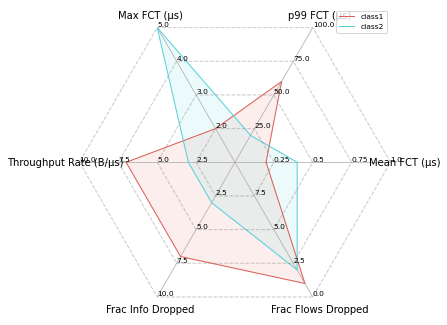

In [35]:
# CUSTOM RADAR PLOT(S)
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

time_units = '\u03BCs'
info_units = 'B'

plot_dict = {'Mean FCT ({})'.format(time_units): {'range': [0, 1], 'classes': {'class1': 0.2,
                                                         'class2': 0.4}},
             'p99 FCT ({})'.format(time_units): {'range': [0, 100], 'classes': {'class1': 60,
                                                           'class2': 20}},
             'Max FCT ({})'.format(time_units): {'range': [1, 5], 'classes': {'class1': 2,
                                                         'class2': 5}},
             'Throughput Rate ({}/{})'.format(info_units, time_units): {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Info Dropped': {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Flows Dropped': {'range': [10, 0], 'classes': {'class1': 1,
                                                          'class2': 2}}
            }

_ = tpg.plot_radar(plot_dict)

# Custom Plots

In [36]:
# PLOT SCHEDULER SENSITIVITY TO LOAD
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

from collections import defaultdict
import sigfig


def get_summary_dict(analysers, headers, time_units='', info_units=''):
    summary_dict = {header: [] for header in headers}
    for analyser in analysers:
        # self._check_analyser_valid(analyser)
        summary_dict['Load'].append(round(analyser.load_frac, 2))
        summary_dict['Subject'].append(analyser.subject_class_name)
        summary_dict['T-Score'].append(analyser.t_score)
        summary_dict['Mean FCT ({})'.format(time_units)].append(round(analyser.mean_fct, 1))
        summary_dict['p99 FCT ({})'.format(time_units)].append(round(analyser.nn_fct, 1))
        summary_dict['Max FCT ({})'.format(time_units)].append(round(analyser.max_fct, 1))
        summary_dict['Throughput Frac'].append(round(analyser.throughput_frac, 1))
        summary_dict['Frac Flows Dropped'].append(sigfig.round(analyser.dropped_flow_frac, sigfigs=3))
        summary_dict['Frac Info Dropped'].append(sigfig.round(analyser.dropped_info_frac, sigfigs=3))
    return summary_dict



time_units = '\u03BCs'
info_units = 'B'
headers = ['Load',
           'T-Score',
           'Subject',
           'Mean FCT ({})'.format(time_units),
           'p99 FCT ({})'.format(time_units),
           'Max FCT ({})'.format(time_units),
           'Throughput Frac',
           'Frac Info Dropped',
           'Frac Flows Dropped']
dont_plot_headers = ['Load', 'T-Score', 'Subject']
plot_headers = [header for header in headers if header not in dont_plot_headers]
# determine if higher is better for each header
is_higher_better = {}
for header in headers:
    if header == 'T-Score' or header == 'Throughput Frac':
        is_higher_better[header] = True
    else:
        is_higher_better[header] = False

scheduler_to_analysers = {}
for analyser in analysers:
    if analyser.env.scheduler.scheduler_name not in scheduler_to_analysers:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name] = [analyser]
    else:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name].append(analyser)

for scheduler_name in scheduler_to_analysers.keys():
    nested_dict = lambda: defaultdict(nested_dict)
    plot_dict = nested_dict()
    
    anys = scheduler_to_analysers[scheduler_name]
    summary_dict = get_summary_dict(anys, headers, time_units=time_units, info_units=info_units)
    
    for header in plot_headers:
        min_val, max_val = min(summary_dict[header]), max(summary_dict[header])
        
#         if is_higher_better[header]:
#             # want higher (better) values on outer radar edge -> don't flip range
#             _range = [0.9*min(summary_dict[header]), 1.1*max(summary_dict[header])]
#         else:
#             # want lower (better) values on outer radar edge -> flip range
#             _range = [1.1*max(summary_dict[header]), 0.9*min(summary_dict[header])]
            
        diff = max(max_val - min_val, 1e-9)
        min_val -= (0.1*diff)
        max_val += (0.1*diff)
        _range = [min_val, max_val]
#         _range = [max(min_val, 1e-9), max(max_val, 1e-9)]
        if not is_higher_better[header]:
            # flip axis
            _range = _range[::-1]

        plot_dict[header]['range'] = _range
        for i, load in enumerate(summary_dict['Load']):
            plot_dict[header]['classes']['Load {}'.format(str(load))] = summary_dict[header][i]
        
    tpg.plot_radar(plot_dict, 
                   title=scheduler_name,
                   fill=True,
                   fill_alpha=0.05,
                   figsize=(12.8, 9.6))
        
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: Invalid input type of <class 'numpy.float64'>, expecting 1 of {<class 'sigfig.sigfig._Number'>, <class 'int'>, <class 'str'>, <class 'float'>, <class 'decimal.Decimal'>, <class 'NoneType'>}

In [ ]:
# %autoreload
# import trafpy
# import trafpy.generator as tpg
# from trafpy.manager import RandomAgent, RWA, Demand, DCN, EnvAnalyser
# import json

# DATA_BAME = 'artificial_light_chancap10'
# path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/benchmark_data/{}_benchmark_data.json'.format(DATA_NAME)
# benchmark_data = json.loads(tpg.load_data_from_json(path_to_benchmark_data))
# benchmarks = list(benchmark_data.keys())

# SLOT_SIZE = 1.0
# PACKET_SIZE = 1
# NUM_CHANNELS = 1
# NUM_K_PATHS = 1
# MAX_FLOWS = 10
# MAX_TIME = None

In [ ]:
# network = tpg.gen_fat_tree(k=3, N=2, num_channels=1, server_to_rack_channel_capacity=10)
# rwa = RWA(tpg.gen_channel_names(NUM_CHANNELS), NUM_K_PATHS)
# scheduler = RandomAgent(network, rwa, slot_size=SLOT_SIZE, packet_size=PACKET_SIZE)

# num_benchmark_tests = 0
# for benchmark in benchmarks:
#     for load in benchmark_data[benchmark]:
#         for repeat in benchmark_data[benchmark][load]:
#             num_benchmark_tests += 1

# for benchmark in benchmarks:
#     for load in list(benchmark_data[benchmark].keys()):
#         for repeat in benchmark_data[benchmark][load]:
#             if json.loads(load) == 0.1 and scheduler.scheduler_name == 'random':
#                 demand_data = benchmark_data[benchmark][load][repeat]
#                 demand = tpg.Demand(demand_data)
#                 env = DCN(network, demand, scheduler, num_k_paths=NUM_K_PATHS, slot_size=SLOT_SIZE, max_flows=MAX_FLOWS, max_time=MAX_TIME)
#                 print(env.slot_size)
                
#                 observation = env.reset()
#                 scheduler.register_env(env)
                
#                 while True:
#                     action = scheduler.get_action(observation)
#                     observation, reward, done, info = env.step(action)
                    
#                     if done:
#                         print('Completed')
#                         analyser = EnvAnalyser(env)
#                         analyser.compute_metrics(print_summary=True)

In [ ]:
# packet size = info
# slot size = sec
# min bandwidth in network = info per sec

# assume that 1 packet size of info can be transferred per sub slot
# info per sub slot = 1 packet = packet size
# sub slot size = (info per sub slot / min bandwidth in network) * slot size

In [ ]:
a = None
if a is not None:
    print('not none')
else:
    print('None')

In [ ]:
increment_time = 1.001
print(round(1-(increment_time-1),6))

In [ ]:
ep_link_capacity = 500
